In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline
from skimage import transform,io
import glob

In [2]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
# output_nodes = 10
# summer 12 + winter 12 + other 1
output_nodes = 25

# learning rate
learning_rate = 0.5

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
train_dataset = []
for image_file_name in glob.glob('./DATA/TRAIN/*/*'):
    # print(image_file_name)
    line = str(image_file_name[13:])
    line = line[:line.find('/')]
    # print(line)
    if line  == "FRONTNANAMEFIT": label = 0
    elif line  == "FRONTTATEFAR": label = 1
    elif line  == "FRONTTATEFITBOTTOM": label = 2
    elif line  == "FRONTTATEFITCENTER": label = 3
    elif line  == "FRONTTATEFITLEFT": label = 4
    elif line  == "FRONTTATEFITRIGHT": label = 5
    elif line  == "FRONTTATEFITTOP": label = 6
    elif line  == "FRONTTATEJUSTCENTER": label = 7
    elif line  == "FRONTTATENEAR": label = 8
    elif line  == "FRONTYOKOFAR": label = 9
    elif line  == "FRONTYOKOFIT": label = 10
    elif line  == "NANAMETATEFIT": label = 11
    elif line  == "WINTERFRONTNANAMEFIT": label = 12
    elif line  == "WINTERFRONTTATEFAR": label = 13
    elif line  == "WINTERFRONTTATEFITBOTTOM": label = 14
    elif line  == "WINTERFRONTTATEFITCENTER": label = 15
    elif line  == "WINTERFRONTTATEFITLEFT": label = 16
    elif line  == "WINTERFRONTTATEFITRIGHT": label = 17
    elif line  == "WINTERFRONTTATEFITTOP": label = 18
    elif line  == "WINTERFRONTTATEJUSTCENTER": label = 19
    elif line  == "WINTERFRONTTATENEAR": label = 20
    elif line  == "WINTERFRONTYOKOFAR": label = 21
    elif line  == "WINTERFRONTYOKOFIT": label = 22
    elif line  == "WINTERNANAMETATEFIT": label = 23
    else: label = 24
    #print(label)
    img = transform.resize(io.imread(image_file_name, as_gray=True), (28, 28), mode='symmetric', preserve_range=True)
    # matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')
    img_data = img.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    # print(numpy.min(img_data))
    # print(numpy.max(img_data))
    record = numpy.append(label,img_data)
    train_dataset.append(record)
    print(str(len(train_dataset) - 1) + ", " + str(label) + ", " + image_file_name)
    pass

0, 24, ./DATA/TRAIN/02838_Human_leg_resized/17064023044_57951e7e59_z.jpg.jpg
1, 24, ./DATA/TRAIN/02838_Human_leg_resized/14652853751_596e01e105_z.jpg.jpg
2, 24, ./DATA/TRAIN/02838_Human_leg_resized/15076410302_7b7040fe75_z.jpg.jpg
3, 24, ./DATA/TRAIN/02838_Human_leg_resized/19256341990_faeab156ec_z.jpg.jpg
4, 24, ./DATA/TRAIN/02838_Human_leg_resized/10478923783_fe2b80837d_z.jpg.jpg
5, 24, ./DATA/TRAIN/02838_Human_leg_resized/28957776_fb7a1c23dd_z.jpg?zz=1.jpg
6, 24, ./DATA/TRAIN/02838_Human_leg_resized/7022940545_fe219551ed_z.jpg.jpg
7, 24, ./DATA/TRAIN/02838_Human_leg_resized/9113174094_8b34d9864f_z.jpg.jpg
8, 24, ./DATA/TRAIN/02838_Human_leg_resized/15092831677_39dee2bde1_z.jpg.jpg
9, 24, ./DATA/TRAIN/02838_Human_leg_resized/2150816303_096f975ebb_z.jpg.jpg
10, 24, ./DATA/TRAIN/02838_Human_leg_resized/10335971416_810910c7ed_z.jpg.jpg
11, 24, ./DATA/TRAIN/02838_Human_leg_resized/4839122054_2eea48bd4e_z.jpg.jpg
12, 24, ./DATA/TRAIN/02838_Human_leg_resized/13411899373_e4f7bc00ef_z.jpg.jp

138, 24, ./DATA/TRAIN/02838_Human_leg_resized/3648514675_9ac4d5bb6d_z.jpg.jpg
139, 24, ./DATA/TRAIN/02838_Human_leg_resized/19972173552_7c212c77d2_z.jpg.jpg
140, 24, ./DATA/TRAIN/02838_Human_leg_resized/8463889249_d47c0b3386_z.jpg.jpg
141, 24, ./DATA/TRAIN/02838_Human_leg_resized/4926773020_24d25a27d0_z.jpg.jpg
142, 24, ./DATA/TRAIN/02838_Human_leg_resized/3648642968_75be6e7378_z.jpg?zz=1.jpg
143, 24, ./DATA/TRAIN/02838_Human_leg_resized/8101920864_687b20c3dd_z.jpg.jpg
144, 24, ./DATA/TRAIN/02838_Human_leg_resized/8532940998_f7807926a5_z.jpg.jpg
145, 24, ./DATA/TRAIN/02838_Human_leg_resized/14873680123_ef835a11de_z.jpg.jpg
146, 24, ./DATA/TRAIN/02838_Human_leg_resized/164448889_4a475c2fe1_z.jpg?zz=1.jpg
147, 24, ./DATA/TRAIN/02838_Human_leg_resized/5106327336_e9cfa05e41_z.jpg.jpg
148, 24, ./DATA/TRAIN/02838_Human_leg_resized/5605369527_098e4a7936_z.jpg.jpg
149, 24, ./DATA/TRAIN/02838_Human_leg_resized/3230768006_e3112407a1_z.jpg.jpg
150, 24, ./DATA/TRAIN/02838_Human_leg_resized/4575484

271, 24, ./DATA/TRAIN/02838_Human_leg_resized/5368914280_2c6e3622c6_z.jpg.jpg
272, 24, ./DATA/TRAIN/02838_Human_leg_resized/58238806_3f0a89198c_z.jpg?zz=1.jpg
273, 24, ./DATA/TRAIN/02838_Human_leg_resized/18997480525_fb8b225e96_z.jpg.jpg
274, 24, ./DATA/TRAIN/02838_Human_leg_resized/2451348769_1ea1693782_z.jpg.jpg
275, 24, ./DATA/TRAIN/02838_Human_leg_resized/15870508570_bfe4aab460_z.jpg.jpg
276, 24, ./DATA/TRAIN/02838_Human_leg_resized/5277979450_dce7937fd6_z.jpg.jpg
277, 24, ./DATA/TRAIN/02838_Human_leg_resized/8290232984_165d0cc8f0_z.jpg.jpg
278, 24, ./DATA/TRAIN/02838_Human_leg_resized/5826059330_7fd044ba35_z.jpg.jpg
279, 24, ./DATA/TRAIN/02838_Human_leg_resized/6979972992_f095f04dc9_z.jpg.jpg
280, 24, ./DATA/TRAIN/02838_Human_leg_resized/5828191755_c870d77a38_z.jpg.jpg
281, 24, ./DATA/TRAIN/02838_Human_leg_resized/4428465837_4d87e3b759_z.jpg.jpg
282, 24, ./DATA/TRAIN/02838_Human_leg_resized/7462517138_c9bf6e8696_z.jpg.jpg
283, 24, ./DATA/TRAIN/02838_Human_leg_resized/11193727755_a

400, 24, ./DATA/TRAIN/02838_Human_leg_resized/81257909_3f86d5686d_z.jpg.jpg
401, 24, ./DATA/TRAIN/02838_Human_leg_resized/5405426810_b0c547dfbb_z.jpg.jpg
402, 24, ./DATA/TRAIN/02838_Human_leg_resized/20717722151_2706c30588_z.jpg.jpg
403, 24, ./DATA/TRAIN/02838_Human_leg_resized/2479244269_7bb700ec3f_z.jpg.jpg
404, 24, ./DATA/TRAIN/02838_Human_leg_resized/339228796_e54a94052b_z.jpg.jpg
405, 24, ./DATA/TRAIN/02838_Human_leg_resized/60242159_3553fb7181_z.jpg.jpg
406, 24, ./DATA/TRAIN/02838_Human_leg_resized/2684092050_935d075ab4_z.jpg?zz=1.jpg
407, 24, ./DATA/TRAIN/02838_Human_leg_resized/2456416805_26a04a7ca2_z.jpg?zz=1.jpg
408, 24, ./DATA/TRAIN/02838_Human_leg_resized/5958038240_031ab94ae1_z.jpg.jpg
409, 24, ./DATA/TRAIN/02838_Human_leg_resized/162626352_c7253344fe_z.jpg.jpg
410, 24, ./DATA/TRAIN/02838_Human_leg_resized/622671519_da8562c7b1_z.jpg.jpg
411, 24, ./DATA/TRAIN/02838_Human_leg_resized/5975114173_fd1266ff6e_z.jpg.jpg
412, 24, ./DATA/TRAIN/02838_Human_leg_resized/8386146220_54f

521, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/1727471292_4a50ff65dd_z.jpg.jpg
522, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/9619526994_79b0ebf04b_z.jpg.jpg
523, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/4139240671_f0586e24b1_z.jpg.jpg
524, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/2503040906_bb3d8359f4_z.jpg.jpg
525, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/5043642858_2559974d79_z.jpg.jpg
526, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/17080047825_65f1b1e37c_z.jpg.jpg
527, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/15288222962_0d48e761d9_z.jpg.jpg
528, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/7875998750_91a3ac9b0c_z.jpg.jpg
529, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/3924331129_dd2def8801_z.jpg.jpg
530, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/15204496751_6d44096c07_z.jpg.jpg
531, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/241105542_a834fe3080_z.jpg.jpg
532, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/15725755932_ae62ec0c5f_z.jpg.jpg
533, 24, ./DA

640, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/45995978_153c778e12_z.jpg.jpg
641, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/8294411927_bd871c3116_z.jpg.jpg
642, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/9056517756_b9a350c40e_z.jpg.jpg
643, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/14218035967_5ec34ae5d5_o.jpg.jpg
644, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/2238509585_b210cf2d12_z.jpg?zz=1.jpg
645, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/5711887894_b8e9fd1067_z.jpg.jpg
646, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/6172885724_733b0c0c49_z.jpg.jpg
647, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/15535008222_d237698b44_z.jpg.jpg
648, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/224423477_f0d6b95535_z.jpg?zz=1.jpg
649, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/8280068212_5905265b10_z.jpg.jpg
650, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/11465982106_bd34d82b35_z.jpg.jpg
651, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/571482431_bc93d849a9_z.jpg?zz=1.jpg
65

771, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/8637003551_0ba8739083_z.jpg.jpg
772, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/10296257723_d16c98774d_z.jpg.jpg
773, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/8641890038_0c9221948f_z.jpg.jpg
774, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/7656619414_e4c3b4607a_z.jpg.jpg
775, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/19951069596_b97b05e76e_z.jpg.jpg
776, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/8609323997_4992b960e3_z.jpg.jpg
777, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/6270779869_d1f4383bd0_z.jpg.jpg
778, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/3484392439_8b12167fc1_z.jpg?zz=1.jpg
779, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/4200613946_9b7a10f0e2_z.jpg.jpg
780, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/17687548824_c4cd6849e8_z.jpg.jpg
781, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/5717090086_21fa12e214_z.jpg.jpg
782, 24, ./DATA/TRAIN/00486_Bicycle_wheel_resized/9454980279_44b65289fa_z.jpg.jpg
783, 24,

879, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/f95a91d54d79e55938b0865842f249911bf7f0bc_224_70.jpg
880, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/e070dd822250d65686842e8aa39978b300b145d8_224_70.jpg
881, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/864465d90cb9f53ffc41e01960a68fb332e2c9c8_224_70.jpg
882, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/3848a3696fddccfbdd758d77fa56b5477b2af61f_TCC60_RESIZED.jpg
883, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/381e03973c7d8eeb2f5e87b245c84c893be36a97_224_70.jpg
884, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/539622a25be8316f49a5b64fa04710053249728d_224_70.jpg
885, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/9e64018eacece539e6c1b94f4d4e2b5f1cde7e27_224_70.jpg
886, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/0fbe781d5b3cd2ad3139ce9e5403060d7f58b782_R90_TCC60_RESIZED.jpg
887, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/ce9efb7734c400101d96448caf19d296cd1d0ca0_TCC60_RESIZED.jpg
888, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/ddd3e495de92f406e4f112c757ef36f0ae8e803d_224_70.jpg
889, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/ec84d244d92f9e7

984, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/9dc77ba8f271650d335e07fccaa86dce1a1c71d2_224_70.jpg
985, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/de29928e5c5a4f248a1a96bdf8b95548dcbb2f42_224_70.jpg
986, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/333aab856ebb693a8ca47ad04e2fe4e8e452c44d_TCC60_RESIZED.jpg
987, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/3f1926f9c2b07455136bc3e1787424dc9c01b637_224_70.jpg
988, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/6ff43667f9354e00cb7c0daa7e2fceb04ea00ca0_224_70.jpg
989, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/14060ba6f535e562dd64442d5fba89437a468291_224_70.jpg
990, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/ab55f2770ac3b0235736bfbfe0615832d8d88c88_224_70.jpg
991, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/d430689afdf6ff99e3b4061cd57d50f1a65c67bd_224_70.jpg
992, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/36c33c9aa3e111987600d652e77b54b93653870a_224_70.jpg
993, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/778f8fdb78a2da77c95a508455caf1a9abfecfe5_224_70.jpg
994, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/8c7b01a666baf9b2413f48100a6402917

1089, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/be752636dfe15442fd7edfb62c0b4ba81126f617_224_70.jpg
1090, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/857a70695270e6cf80cf67064136c8a69beb5ea3_TCC80_RESIZED.jpg
1091, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/7a82683b283a84a338b378a2b2fd4794b57267d5_224_70.jpg
1092, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/10e943983eb656d3debcd006d252d11ce4c8013a_224_70.jpg
1093, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/c3f01aa762185e650868433eff97c5735ac3416e_224_70.jpg
1094, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/9b1303e6cef9f1da9a48351cfb4c53e8e56f8fbb_TCC60_RESIZED.jpg
1095, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/054c7b4d71d51f50831ad96cc73ff2306a2b99ea_TCC60_RESIZED.jpg
1096, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/6fc6eda451bcf3fc00264f74d213670496c38ac7_TCC60_RESIZED.jpg
1097, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/93bfa982e4203c403b01eee2dfc971ed4611ba23_224_70.jpg
1098, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/a321f7c3a4007860edbd8b640680c2552f6b7097_224_70.jpg
1099, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/c

1194, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/6d05e9d4a8734929ea1d064bcfc054b583161be8_224_70.jpg
1195, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/cb4b62901ccfc8c4d4246b725dd30ec107c69eaf_224_70.jpg
1196, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/50f7dd5ce9b7f087fc940a7d0e336faae1d1e390_TCC60_RESIZED.jpg
1197, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/8c0390e2f7596fa171d0f0993525ab74ea67066c_224_70.jpg
1198, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/7c9d4f78a728c5c8b67f6bef706df49a0b0cd7fb_224_70.jpg
1199, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/e02af0fd77f2fafebc77a4596598462632e8d2d0_TCC80_RESIZED.jpg
1200, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/dad311063618db6178d28eb5421f5b98f7c35190_224_70.jpg
1201, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/f554930a60a7215a82d2f8ef68dea7c4a9adea6d_224_70.jpg
1202, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/ab725da54505675b7b47dbf8c0a72c4dafbb213f_224_70.jpg
1203, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/a6637791c7e68b24ed86f749d3ec554244f5af4c_224_70.jpg
1204, 3, ./DATA/TRAIN/FRONTTATEFITCENTER/4a49e77194331ea

1300, 11, ./DATA/TRAIN/NANAMETATEFIT/76b5838cf6269d111d31b8f7d350875f36056f1d_224_70.jpg
1301, 11, ./DATA/TRAIN/NANAMETATEFIT/287112a8c9e0c5b8688f4a16751d8b0c35b70a37_224_70.jpg
1302, 11, ./DATA/TRAIN/NANAMETATEFIT/f97169a193e88adaf0334997a18fc19e4bb1d485_224_70.jpg
1303, 11, ./DATA/TRAIN/NANAMETATEFIT/19bbeaf04f887f11b7a4e4ffa66ac07cdb4e26a0_224_70.jpg
1304, 11, ./DATA/TRAIN/NANAMETATEFIT/c41d947aaf004879520ee7ac193267f19b1831d6_224_70.jpg
1305, 11, ./DATA/TRAIN/NANAMETATEFIT/81a42c32ec03c7c8f035da91b5adcad5dd95504b_224_70.jpg
1306, 11, ./DATA/TRAIN/NANAMETATEFIT/ca056007b9c43d8faed5c7ff6510ccd43f8aa246_224_70.jpg
1307, 11, ./DATA/TRAIN/NANAMETATEFIT/26e9c9ee74f99d6b8766f3c14fddb0c1c6408d8b_224_70.jpg
1308, 11, ./DATA/TRAIN/NANAMETATEFIT/60a507bcd830c1ef6a98b7e44b9820b0cf82d75d_224_70.jpg
1309, 11, ./DATA/TRAIN/NANAMETATEFIT/b994d8acd0ef324c77b65d63cdc359d7f7ebc2df_224_70.jpg
1310, 11, ./DATA/TRAIN/NANAMETATEFIT/2602e40536bbf636d216bfbc698d685e1b16c57b_224_70.jpg
1311, 11, ./DATA/TRAI

1412, 11, ./DATA/TRAIN/NANAMETATEFIT/4db932e8c7a8bd5e346d398942de5a3e056663c1_224_70.jpg
1413, 11, ./DATA/TRAIN/NANAMETATEFIT/41f4e23ffdf4035bb1eee1b91e1e22aa6a450186_224_70.jpg
1414, 11, ./DATA/TRAIN/NANAMETATEFIT/85b0e0b0eed148052f2da0cb617a5d08204ad431_224_70.jpg
1415, 11, ./DATA/TRAIN/NANAMETATEFIT/2452697d60d629fbfe2afba6d48bdb4167952ff7_224_70.jpg
1416, 11, ./DATA/TRAIN/NANAMETATEFIT/5fb271270c6e2c2090ce7b9a589669b9b6536390_224_70.jpg
1417, 11, ./DATA/TRAIN/NANAMETATEFIT/6074477cd488ba0b7330af6f7b045bd21a6d59f5_224_70.jpg
1418, 11, ./DATA/TRAIN/NANAMETATEFIT/d8b5fd426e27a9e350cf07c007e9f104c7e2b94b_224_70.jpg
1419, 11, ./DATA/TRAIN/NANAMETATEFIT/6e75f31d7d0c2490ccd119a1836f926b1ec90d9a_224_70.jpg
1420, 11, ./DATA/TRAIN/NANAMETATEFIT/031fb9390f754b84f39aafb5fdce0f04142196b9_224_70.jpg
1421, 11, ./DATA/TRAIN/NANAMETATEFIT/a171d1dbeb04c64fdf34645442fb2d822943ffc4_224_70.jpg
1422, 11, ./DATA/TRAIN/NANAMETATEFIT/a7012c6e6d91cb4e5f6baf519426729127908d55_224_70.jpg
1423, 11, ./DATA/TRAI

1521, 11, ./DATA/TRAIN/NANAMETATEFIT/7ac29273fce7e6126adfe31e7ab14dd134fd8b96_224_70.jpg
1522, 11, ./DATA/TRAIN/NANAMETATEFIT/47e862e1b30a18bce1c701c0683c1dd6cbc1d6c7_224_70.jpg
1523, 11, ./DATA/TRAIN/NANAMETATEFIT/7028676068d70df900e6591ba04cc4b665a94873_224_70.jpg
1524, 11, ./DATA/TRAIN/NANAMETATEFIT/441b8096e72064e66b0765c675421f022a629964_224_70.jpg
1525, 11, ./DATA/TRAIN/NANAMETATEFIT/f23bdaab288f1eca22f6ff64b62283002d93a649_224_70.jpg
1526, 11, ./DATA/TRAIN/NANAMETATEFIT/45d4abb360b4b5b35d4c93b141193ba80fb0aac4_224_70.jpg
1527, 11, ./DATA/TRAIN/NANAMETATEFIT/a2c8afd1ecdd1130875f39a3adadad25ddb42a3f_224_70.jpg
1528, 11, ./DATA/TRAIN/NANAMETATEFIT/fa48a19273d51c1661ceb3c56a90730a136ff36e_224_70.jpg
1529, 11, ./DATA/TRAIN/NANAMETATEFIT/5377a814bd5678137d56719633ee01515c7754d1_224_70.jpg
1530, 11, ./DATA/TRAIN/NANAMETATEFIT/1c78fec9d4a2c3289cf4507fc61a12b90db1c781_224_70.jpg
1531, 11, ./DATA/TRAIN/NANAMETATEFIT/49063d3bda60b9aff8dc20fb5b119936c63cf92e_224_70.jpg
1532, 11, ./DATA/TRAI

1634, 11, ./DATA/TRAIN/NANAMETATEFIT/712fc5dd832dfd501b7a147a046be0beaf539ce9_224_70.jpg
1635, 11, ./DATA/TRAIN/NANAMETATEFIT/6ef810408527244f4069a027b29bdb4fc2febbb8_224_70.jpg
1636, 11, ./DATA/TRAIN/NANAMETATEFIT/874a70f516892cececa0d0b944897131ef51d77e_224_70.jpg
1637, 11, ./DATA/TRAIN/NANAMETATEFIT/64f3697b4eea1f58b74ee81bafe5e9c892e9baca_224_70.jpg
1638, 11, ./DATA/TRAIN/NANAMETATEFIT/44b003cc05fa03aaa7989f1dc00c6c8ce05afd8d_224_70.jpg
1639, 11, ./DATA/TRAIN/NANAMETATEFIT/2c9f2ffd08d9807de3229c47ad4a8a67c863c21c_224_70.jpg
1640, 11, ./DATA/TRAIN/NANAMETATEFIT/e9d90404c3ef8d05b01e4556fbbf25caec448ad2_224_70.jpg
1641, 11, ./DATA/TRAIN/NANAMETATEFIT/12a7cf6abd71da047901e7801fa0e6ce5f9b04ef_224_70.jpg
1642, 11, ./DATA/TRAIN/NANAMETATEFIT/0a7ee0504c92caf99dd1020d8757d74fb6c1c543_224_70.jpg
1643, 11, ./DATA/TRAIN/NANAMETATEFIT/ee3d767ddf19879b0f990924aa078dc331fa6240_224_70.jpg
1644, 11, ./DATA/TRAIN/NANAMETATEFIT/2b9c1834cabf75c5ebac43b8a33f1ff1a62ee11b_224_70.jpg
1645, 11, ./DATA/TRAI

1728, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/1ff6b712f9974081d69152d84127c5fe076a7583.jpg
1729, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/57d5e396a8b50807bb0de4c87a4ac707df6d2826_R90_RESIZED.jpg
1730, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/078f10983865225c66c558777034d7e9221ada1b.jpg
1731, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/3cd8232149d00acb47c26a44fb49589a563b0af5_224_70.jpg
1732, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/6734f6b49c1bc82e807cac8f123757ec7dadb642_R90_RESIZED.jpg
1733, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/87df8a97583ff3475abf6b605c2095d59cb5e13c_R90_RESIZED.jpg
1734, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/9991cfcd264d006093bd22702b7386776bed8c31_224_70.jpg
1735, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/ae60c3be6174c1e3447848597b8861ff51e913cf_224_70.jpg
1736, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/8389c34346be8f8a73539bd965d9e115cb58e2b4_R90_RESIZED.jpg
1737, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/dbae2a82c375adc567c23425ec92f4d699d918e1.jpg
1738, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/918908da38ec5d00bef

1820, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/b3e4f78a83ac18c0e67fe0fdcb49d2102f9eb936.jpg
1821, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/cce72d23d284e05acd87364511da68579dc4d936.jpg
1822, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/14e34c825f473ac4305947f963a773e8ef16833d_R90_RESIZED.jpg
1823, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/f69284b985c9ae326b460637c347b3fc2643eb26.jpg
1824, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/78dc4a7b020c244533e2fe968d4d5bb16b42d882.jpg
1825, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/86329283f8d2554890c124c413724013aba1d874.jpg
1826, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/8c1fd9c68205944513d4acfa60af1d150a5fd49e.jpg
1827, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/1ee48611b8b3bf35a124d3d01c6e2c01dbb32313.jpg
1828, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/a9a07164f54e284e2a0a39aa0207b612a3123268_R90_RESIZED.jpg
1829, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/ade1508a77f8da48ee0517c24d1cba5f4c65cbb7_224_70.jpg
1830, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/1a78f305ca82c1a11982a192a84b899d5fcf5d01.jpg
1831, 13, ./

1916, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/6b3234df952ed912c8d38fc0f909053ce9435ac4.jpg
1917, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/d6ace60a0b34d6b4a844019cfadf49f7126696b3.jpg
1918, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/0dae95e7ba7442fba852eb20e395e966228e0ec3_R90_RESIZED.jpg
1919, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/33c977f1c1361764b00d8eb248ac00fc3609f81d.jpg
1920, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/d2fff5a51eb2560d240cc90899d69c6025a14c18_R90_RESIZED.jpg
1921, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/b5c2ca7a7032c9b2c4dfe1a78680c8c0ed34bcd7.jpg
1922, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/9e41a5ab6222eef656e258248f5966c8571a4010.jpg
1923, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/06a60aa9f3bcc7682a643bf323f5978c5f0a5516_R90_RESIZED.jpg
1924, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/67f5ce7c7cc2b3d473ceb7f8bcb38864f4f7dd97_R90_RESIZED.jpg
1925, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/cf8aa4b6ff80e52064c67bf30fd19429ae44303f_224_70.jpg
1926, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/2313fd20fdc8d2b71c85eb23ad5b7f7e7

2008, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/7c54b9e1aa1f70e14445d04e5337453c6f49e7b8.jpg
2009, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/a5f43ef900eae0d1995399434ae5b0bfc59a13d6.jpg
2010, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/0887bcc4d61de41986ee4ee81c83f2b45ba916a5_224_70.jpg
2011, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/87af7812c7b7585aea383710b21bac09f1edb74b_R90_RESIZED.jpg
2012, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/b2752ecde3426e2d31ace7c511e924952a71a3be_R90_RESIZED.jpg
2013, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/ce8e7d4e789bd363d2d0385cbe9e8d58969514fd_R90_RESIZED.jpg
2014, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/1bcd928f5a8690ae2633e971d37a27a25e978625_R90_RESIZED.jpg
2015, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/b26e6eba395b7daa337727d4843d54e2a1c22ffd_R90_RESIZED.jpg
2016, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/09eaab1e06f35dd5cd3f22de0aa747916e069693_R90_RESIZED.jpg
2017, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/c2c00ebc6b52589e0cf977dde97f83db3cf2264a_224_70.jpg
2018, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/f8

2100, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/0ba9b66c6020e813f542fcc784c0a99c2e674b89.jpg
2101, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/0c798681b3bd17384cbd9b7985c8949071565b19_224_70.jpg
2102, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/ac2b2f862d8dfa526eacebffa800eef79d099305_224_70.jpg
2103, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/25760f0c406bfbf0766e1736b1a3bd46d2c184bb_224_70.jpg
2104, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/d690ffcb791d60f0b599d20d88907f8dc7041dca_R90_RESIZED.jpg
2105, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/f46967244b09852c4a16e6ba06f60820816f6f5f_224_70.jpg
2106, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/648904836f844b3c7c8ab7e97d8906e8bad05868.jpg
2107, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/4a98d5082efee357b2635ada1aca73cd7a6af601_224_70.jpg
2108, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/d18195e19933e072df7702b1cb11e0edbbfeab86_224_70.jpg
2109, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/2fb5b4c8ba19f5f56598072161592bc7a16d742d_224_70.jpg
2110, 13, ./DATA/TRAIN/WINTERFRONTTATEFAR/e54500053c3c00364a6a3e513ee

2205, 24, ./DATA/TRAIN/00479_Boy_resized/6870828924_ab156579a1_z.jpg.jpg
2206, 24, ./DATA/TRAIN/00479_Boy_resized/8737303297_4d2e7baf35_z.jpg.jpg
2207, 24, ./DATA/TRAIN/00479_Boy_resized/12601312153_3508aa4bf7_z.jpg.jpg
2208, 24, ./DATA/TRAIN/00479_Boy_resized/15887227370_1fbf670c52_z.jpg.jpg
2209, 24, ./DATA/TRAIN/00479_Boy_resized/3370378272_790b5cacaf_z.jpg?zz=1.jpg
2210, 24, ./DATA/TRAIN/00479_Boy_resized/5586767528_9cc24ffb65_z.jpg.jpg
2211, 24, ./DATA/TRAIN/00479_Boy_resized/21445801376_d7b5e47251_z.jpg.jpg
2212, 24, ./DATA/TRAIN/00479_Boy_resized/6996724531_918ed77dd0_z.jpg.jpg
2213, 24, ./DATA/TRAIN/00479_Boy_resized/182314126_960287de6d_z.jpg?zz=1.jpg
2214, 24, ./DATA/TRAIN/00479_Boy_resized/16583358675_111725cf1a_z.jpg.jpg
2215, 24, ./DATA/TRAIN/00479_Boy_resized/2734203116_a506456ea5_z.jpg.jpg
2216, 24, ./DATA/TRAIN/00479_Boy_resized/5970062451_5f4695d2de_z.jpg.jpg
2217, 24, ./DATA/TRAIN/00479_Boy_resized/533193837_acb1dd98cd_z.jpg.jpg
2218, 24, ./DATA/TRAIN/00479_Boy_resize

2325, 24, ./DATA/TRAIN/00479_Boy_resized/5502753794_66f4099496_z.jpg.jpg
2326, 24, ./DATA/TRAIN/00479_Boy_resized/4413293913_73b1777bd9_z.jpg?zz=1.jpg
2327, 24, ./DATA/TRAIN/00479_Boy_resized/17236599006_6bf15c456c_z.jpg.jpg
2328, 24, ./DATA/TRAIN/00479_Boy_resized/4646445086_fdd0e3a69a_z.jpg.jpg
2329, 24, ./DATA/TRAIN/00479_Boy_resized/5031927942_83b6188a15_z.jpg.jpg
2330, 24, ./DATA/TRAIN/00479_Boy_resized/14140144639_285ebc54f1_z.jpg.jpg
2331, 24, ./DATA/TRAIN/00479_Boy_resized/6091938866_99c0885654_z.jpg.jpg
2332, 24, ./DATA/TRAIN/00479_Boy_resized/20703904278_51fe7e6127_z.jpg.jpg
2333, 24, ./DATA/TRAIN/00479_Boy_resized/4468990575_369b9f12a9_z.jpg.jpg
2334, 24, ./DATA/TRAIN/00479_Boy_resized/3490827997_88bfafbe98_z.jpg.jpg
2335, 24, ./DATA/TRAIN/00479_Boy_resized/15348648569_5f7f2fe004_z.jpg.jpg
2336, 24, ./DATA/TRAIN/00479_Boy_resized/3810843099_d9c10cc4ca_z.jpg.jpg
2337, 24, ./DATA/TRAIN/00479_Boy_resized/8728894548_2d1aba2f8e_z.jpg.jpg
2338, 24, ./DATA/TRAIN/00479_Boy_resized/1

2447, 24, ./DATA/TRAIN/00479_Boy_resized/8303649351_f72b8ba796_z.jpg.jpg
2448, 24, ./DATA/TRAIN/00479_Boy_resized/3530534737_00d0d3878b_z.jpg.jpg
2449, 24, ./DATA/TRAIN/00479_Boy_resized/5699074209_d3beeb3fff_z.jpg.jpg
2450, 24, ./DATA/TRAIN/00479_Boy_resized/773668305_492f9a968a_z.jpg.jpg
2451, 24, ./DATA/TRAIN/00479_Boy_resized/13357427234_51716a500f_z.jpg.jpg
2452, 24, ./DATA/TRAIN/00479_Boy_resized/17557529564_d17d580513_z.jpg.jpg
2453, 24, ./DATA/TRAIN/00479_Boy_resized/13382469833_d9360ba1db_z.jpg.jpg
2454, 24, ./DATA/TRAIN/00479_Boy_resized/5178520336_aa4cbbec85_z.jpg.jpg
2455, 24, ./DATA/TRAIN/00479_Boy_resized/5477720843_f5e17855cd_z.jpg.jpg
2456, 24, ./DATA/TRAIN/00479_Boy_resized/8265481879_2ea721764f_z.jpg.jpg
2457, 24, ./DATA/TRAIN/00479_Boy_resized/2218105918_98b27c0f3d_z.jpg?zz=1.jpg
2458, 24, ./DATA/TRAIN/00479_Boy_resized/5238560177_8aab5a5a1c_z.jpg.jpg
2459, 24, ./DATA/TRAIN/00479_Boy_resized/6222260761_1eac54906b_z.jpg.jpg
2460, 24, ./DATA/TRAIN/00479_Boy_resized/127

2561, 24, ./DATA/TRAIN/00479_Boy_resized/14811231893_6385746ced_z.jpg.jpg
2562, 24, ./DATA/TRAIN/00479_Boy_resized/3943232927_a957327e11_z.jpg.jpg
2563, 24, ./DATA/TRAIN/00479_Boy_resized/7883492450_c84e11e7b5_z.jpg.jpg
2564, 24, ./DATA/TRAIN/00479_Boy_resized/2967299381_80df51659d_z.jpg?zz=1.jpg
2565, 24, ./DATA/TRAIN/00479_Boy_resized/5972076187_c4794af715_z.jpg.jpg
2566, 24, ./DATA/TRAIN/00479_Boy_resized/3050309300_29e215196e_z.jpg.jpg
2567, 24, ./DATA/TRAIN/00479_Boy_resized/6052879008_0d7bf94319_z.jpg.jpg
2568, 24, ./DATA/TRAIN/00479_Boy_resized/4641299669_b2da03cd63_z.jpg.jpg
2569, 24, ./DATA/TRAIN/00479_Boy_resized/16016300676_e2c92de901_z.jpg.jpg
2570, 24, ./DATA/TRAIN/00479_Boy_resized/567188870_1dd158def8_z.jpg.jpg
2571, 24, ./DATA/TRAIN/00479_Boy_resized/6848542481_78af2a6601_z.jpg.jpg
2572, 24, ./DATA/TRAIN/00479_Boy_resized/10673949593_277baea9b0_z.jpg.jpg
2573, 24, ./DATA/TRAIN/00479_Boy_resized/8606176179_eaaa216bbd_z.jpg.jpg
2574, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/ef

2648, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/ea2636d1a12f336d1ec3d4114ce85e0400f544c9_224_70.jpg
2649, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/64ae4023cb8aaaf0ef1116abfad4ba58bf69b02d_TRIMMED_RESIZED_R90.jpg
2650, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/b4d9321e467fada8591d995d10f93c81b39f3d29_224_70.jpg
2651, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/f74975cfe906ddbcb4036ff0219f701fdd549e60_224_70.jpg
2652, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/287a1864d5a0696ce1b2888ed0d094f2ad8677fd_TLC_RESIZED_R90.jpg
2653, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/aa5504d89d971d0c4cc51cff14052d9cedb0e748_TRC_RESIZED_R90.jpg
2654, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/d6c034363f6d4465693babb8695aeea4e35346f7_KRD_TRIMMED_RESIZED_R90.jpg
2655, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/69876b4fdebb4efd4d86490d87ee446ece46d32f_TRIMMED_RESIZED_R90.jpg
2656, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/f1316bf3960ce87a19e3f532dbca71c6f99879ad_224_70.jpg
2657, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/2b8451c2a623aae5a844dd01c719430f69135eec_224_70.jpg

2749, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/3ca6b4beca574c6f0126578f38c9637a15e4aed5_224_70.jpg
2750, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/2bf55bf82695f54088a341e258a24d7f63484ede_KRD_TRIMMED_RESIZED_R90.jpg
2751, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/eeadbf37d8f360b933c9f959c56b709642bcb6a8_224_70.jpg
2752, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/ade1508a77f8da48ee0517c24d1cba5f4c65cbb7_TLC_RESIZED_R90.jpg
2753, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/5c11f82aa6793f1a1695bf4acfe8ead2a7c7573b_224_70.jpg
2754, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/8ba2e3417d3b5060c8a0a50226d7c25626db00da_R180_L2R_RESIZED_R90.jpg
2755, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/f93c174e72cacf8c692dfef3b8b4142bff799789_R90_TRC_RESIZED_R90.jpg
2756, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/5ee82886bd3f90c52664fcae7dd85ad6987514e7_224_70.jpg
2757, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/77c0cd725c89a27b188511b6a1e7d0554721b63a_R180_B2T_RESIZED_R90.jpg
2758, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/8ecd814b5a8b8b2e7de95e2e5c711574e1abf1f3_TRIM

2834, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/c377e59be12ebe2bb653c88f2734c20782a85923_224_70.jpg
2835, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/01b8c4f0ef75e29c7ff3af9394625a282c61869b_224_70.jpg
2836, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/dff51a83ef9433b18afbcd4ae820405ed4cfb9a0_224_70.jpg
2837, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/9b30bb35c2fd8143d8905c1fcb44d4d9a7e365d8_KRD_TRIMMED_RESIZED_R90.jpg
2838, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/a68a7575bdc9900f450097c57ff3f4b72dda5219_224_70.jpg
2839, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/b1e8dc3b97067588ac08cee6f2878b843d954ddb_R180_B2T_RESIZED_R90.jpg
2840, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/751fffdfdc0a0fcf5bb17bca4cb84a193ce61993_R90_TLC_RESIZED_R90.jpg
2841, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/be37342d860c9e11ed75be8bacb799c296cae98c_TRIMMED_RESIZED_R90.jpg
2842, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/e426def70482c46b0032c063b9f3438c8ac57485_224_70.jpg
2843, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/b73733a2755208e653257ab085d2bb4d6928dae3_KRD_TRIMMED_RE

2921, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/e10f8146237b54a2d6580cab54ffb2030e5c104f_224_70.jpg
2922, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/9c5058eb359df6292b12d66385a1f2c193f5c169_TLC_RESIZED_R90.jpg
2923, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/331026c2712f19caf0290c1e455a9cb46787bb26_KRD_TRIMMED_RESIZED_R90.jpg
2924, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/d478d1fc44cc8a093bb9c4a633a0a52ef1c012ba_TLC_RESIZED_R90.jpg
2925, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/0459450b2ec5658fe7f5fe6885e2f8495712d0a7_R180_B2T_RESIZED_R90.jpg
2926, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/42950fb9beee730a9b377438bfc531000157f812_TRIMMED_RESIZED_R90.jpg
2927, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/b16def865684cf872a8f5a5444ed6ef63d4173c3_TLC_RESIZED_R90.jpg
2928, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/6cca3ee09b0ae7cbd2d76c7d15bd1dee5a46e48d_224_70.jpg
2929, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/3f52f3a13d9c4b29939c4135ab54ebd857309761_224_70.jpg
2930, 22, ./DATA/TRAIN/WINTERFRONTYOKOFIT/e28bd73cd19ae31de8755457441c7b24af6f6b72_

3007, 24, ./DATA/TRAIN/01318_Desk_resized/7321972906_b05d11515c_z.jpg.jpg
3008, 24, ./DATA/TRAIN/01318_Desk_resized/3635885385_18999a1015_o.jpg.jpg
3009, 24, ./DATA/TRAIN/01318_Desk_resized/14646640916_7823b52b00_z.jpg.jpg
3010, 24, ./DATA/TRAIN/01318_Desk_resized/11050914066_7bd33c04a9_z.jpg.jpg
3011, 24, ./DATA/TRAIN/01318_Desk_resized/6811601383_6c2cc9724c_z.jpg.jpg
3012, 24, ./DATA/TRAIN/01318_Desk_resized/10591879136_21a0934ef0_z.jpg.jpg
3013, 24, ./DATA/TRAIN/01318_Desk_resized/8575508617_715ed0b125_z.jpg.jpg
3014, 24, ./DATA/TRAIN/01318_Desk_resized/14704836154_44a98db57b_z.jpg.jpg
3015, 24, ./DATA/TRAIN/01318_Desk_resized/15758909928_2d21069e08_z.jpg.jpg
3016, 24, ./DATA/TRAIN/01318_Desk_resized/17124112831_8cb19ec3a9_z.jpg.jpg
3017, 24, ./DATA/TRAIN/01318_Desk_resized/2964241047_c519f3c67a_z.jpg.jpg
3018, 24, ./DATA/TRAIN/01318_Desk_resized/8390191760_edc99fc42f_z.jpg.jpg
3019, 24, ./DATA/TRAIN/01318_Desk_resized/19943130278_1e1e93ace4_z.jpg.jpg
3020, 24, ./DATA/TRAIN/01318_De

3132, 24, ./DATA/TRAIN/01318_Desk_resized/8590184100_e5ae200e45_z.jpg.jpg
3133, 24, ./DATA/TRAIN/01318_Desk_resized/10928690605_c3e5a333af_z.jpg.jpg
3134, 24, ./DATA/TRAIN/01318_Desk_resized/4595187301_ea92fba5e3_z.jpg.jpg
3135, 24, ./DATA/TRAIN/01318_Desk_resized/5621756264_4494c550d7_z.jpg.jpg
3136, 24, ./DATA/TRAIN/01318_Desk_resized/5866979272_d411098c5f_z.jpg.jpg
3137, 24, ./DATA/TRAIN/01318_Desk_resized/3562046171_15c29ea635_z.jpg.jpg
3138, 24, ./DATA/TRAIN/01318_Desk_resized/17197103466_c08b8ac4c4_z.jpg.jpg
3139, 24, ./DATA/TRAIN/01318_Desk_resized/7181231799_1964eabb55_z.jpg.jpg
3140, 24, ./DATA/TRAIN/01318_Desk_resized/15311521246_73ca0822b3_z.jpg.jpg
3141, 24, ./DATA/TRAIN/01318_Desk_resized/2750074167_4581cdd940_z.jpg?zz=1.jpg
3142, 24, ./DATA/TRAIN/01318_Desk_resized/14496026635_cb9b7037c6_z.jpg.jpg
3143, 24, ./DATA/TRAIN/01318_Desk_resized/6183131676_f0b611de22_z.jpg.jpg
3144, 24, ./DATA/TRAIN/01318_Desk_resized/7833087424_e82b744c77_z.jpg.jpg
3145, 24, ./DATA/TRAIN/01318_

3255, 24, ./DATA/TRAIN/01318_Desk_resized/14615673639_0e2685a4bd_z.jpg.jpg
3256, 24, ./DATA/TRAIN/01318_Desk_resized/4497840786_c9ac059ae1_z.jpg.jpg
3257, 24, ./DATA/TRAIN/01318_Desk_resized/19060658813_095a55851e_z.jpg.jpg
3258, 24, ./DATA/TRAIN/01318_Desk_resized/2356323895_7e7b277194_z.jpg.jpg
3259, 24, ./DATA/TRAIN/01318_Desk_resized/8006138342_4b026c6d54_z.jpg.jpg
3260, 24, ./DATA/TRAIN/01318_Desk_resized/5038961070_9e9b506569_z.jpg.jpg
3261, 24, ./DATA/TRAIN/01318_Desk_resized/3439546310_c3f96fdf26_z.jpg?zz=1.jpg
3262, 24, ./DATA/TRAIN/01318_Desk_resized/2865346623_f55966f393_o.jpg.jpg
3263, 24, ./DATA/TRAIN/01318_Desk_resized/5173484965_02fb4513bd_z.jpg.jpg
3264, 24, ./DATA/TRAIN/01318_Desk_resized/3470366967_9683e9d68a_z.jpg.jpg
3265, 24, ./DATA/TRAIN/01318_Desk_resized/10187933295_1cbaefa7d1_z.jpg.jpg
3266, 24, ./DATA/TRAIN/01318_Desk_resized/4932321733_e1b2645f10_z.jpg.jpg
3267, 24, ./DATA/TRAIN/01318_Desk_resized/14357366743_06fd4d733d_z.jpg.jpg
3268, 24, ./DATA/TRAIN/01318_

3380, 24, ./DATA/TRAIN/01318_Desk_resized/251504898_d2e0102e68_z.jpg.jpg
3381, 24, ./DATA/TRAIN/01318_Desk_resized/53460895_03562e219a_z.jpg?zz=1.jpg
3382, 24, ./DATA/TRAIN/01318_Desk_resized/3604495151_fd1be91811_z.jpg.jpg
3383, 24, ./DATA/TRAIN/01318_Desk_resized/17092266345_5ee012157d_z.jpg.jpg
3384, 24, ./DATA/TRAIN/01318_Desk_resized/317340714_d70696e475_z.jpg?zz=1.jpg
3385, 24, ./DATA/TRAIN/01318_Desk_resized/4971326324_2b8d5f2731_z.jpg.jpg
3386, 24, ./DATA/TRAIN/01318_Desk_resized/3892723050_232092229c_z.jpg.jpg
3387, 24, ./DATA/TRAIN/01318_Desk_resized/15173835460_e6768b546b_z.jpg.jpg
3388, 24, ./DATA/TRAIN/01318_Desk_resized/8688160581_d27435fe12_z.jpg.jpg
3389, 24, ./DATA/TRAIN/01318_Desk_resized/7658818056_4095b35d4c_z.jpg.jpg
3390, 24, ./DATA/TRAIN/01318_Desk_resized/16151019637_4b78a13be8_z.jpg.jpg
3391, 24, ./DATA/TRAIN/01318_Desk_resized/4731147540_45fbe6caa0_z.jpg.jpg
3392, 24, ./DATA/TRAIN/01318_Desk_resized/6549523091_436efe8886_z.jpg.jpg
3393, 24, ./DATA/TRAIN/01318_

3483, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/31996a4c4c47d0029b997fb92bfc61678e7b2bb4_TRIMMED_WINTER_JCC60_RESIZED.jpg
3484, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/b226fa42ed0b073b0e8c32b5b5856697d9b05e81_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3485, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/2ba0645e6f5f6724358b8a645c0b1b4b8345f290_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3486, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/d690ffcb791d60f0b599d20d88907f8dc7041dca_TRIMMED_WINTER_JCC60_RESIZED.jpg
3487, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/480a720b124ee39cd3fd149099aab32c9556e2a8_WINTER_JCC60_RESIZED.jpg
3488, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/9d303fa1d6f86878d8f533608d98a71c0f1a03c7_TRIMMED_WINTER_JCC60_RESIZED.jpg
3489, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/3e911b4ae42db688209de167ef205c44651ccd31_TRIMMED_WINTER_JCC60_RESIZED.jpg
3490, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/c75582bdd452b910c85e76262ad113464e373173_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3491, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/e78c82c04949e1d8a

3568, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/f785f560611fcf07c842d5a41268914269e0d8b7_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3569, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/8e1e836086a06ce06de2609b98976d7329564652_TRIMMED_WINTER_JCC60_RESIZED.jpg
3570, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/f94a5bf67c9e795c2979537863c9460bb9c3639e_TRIMMED_WINTER_JCC60_RESIZED.jpg
3571, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/6b79eb67b0b82e1d7b81498d15b5ed4aea1c683a_TRIMMED_WINTER_JCC60_RESIZED.jpg
3572, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/c6d4cc361c8be338af9f1fecb9534297af9ab18a_TRIMMED_WINTER_JCC60_RESIZED.jpg
3573, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/ff6af69841bec4230af7b60fd6b65dd7e555e067_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3574, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/3116817bcb197964fb13cd1e851e5ab325b35f1c_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3575, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/0d032ffef98ec94ee4f7e9f8e510823915b9a168_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3576, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/f12da

3650, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/46f67a3a1d3ba0e82ec9a8c21d661c88ac8912c5_TRIMMED_WINTER_JCC60_RESIZED.jpg
3651, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/b7a9a085e079613be975bd63619fa5b105954808_TRIMMED_WINTER_JCC60_RESIZED.jpg
3652, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/39ab9974e948ff3a124070e4c382006721b4c0c1_TRIMMED_WINTER_JCC60_RESIZED.jpg
3653, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/a08d3c68b546497eae32ceaa31c9d04e004775f7_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3654, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/04d15c5c6d01f3267f2700cf80f0889a9480c0bb_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3655, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/6345ea7d7c2667df8fa6f77d588be46b8830edf9_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3656, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/a9a0de565d5600e715450855bb3c7bf85a48d2f3_TRIMMED_WINTER_JCC60_RESIZED.jpg
3657, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/9f3118e489f3526cbbc4dd2f3a0b7b042cc12e5b_WINTER_JCC60_RESIZED.jpg
3658, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/de34f0e9eebe5e12b

3735, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/756a5203995a7e001dd4a1907d5eba30140029eb_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3736, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/0d0888fab2e0c8d7d9fb57356fdbd9de0ee445b1_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3737, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/ab3f82db26f8d47921962278bd84bca899ea92eb_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3738, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/5acd53c6e841e3e71b8c286232d01f9efa251a2d_TRIMMED_WINTER_JCC60_RESIZED.jpg
3739, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/0c798681b3bd17384cbd9b7985c8949071565b19_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3740, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/ab7c5fe939a4a278e93a1b3f1f707d28183887e0_TRIMMED_WINTER_JCC60_RESIZED.jpg
3741, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/3a2f81af6dded108f96bbad0c4d087b628bc20c0_TRIMMED_WINTER_JCC60_RESIZED.jpg
3742, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/e28bd73cd19ae31de8755457441c7b24af6f6b72_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3743, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/7

3818, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/5fc1d364eab13ec5698184a70a74badca26b9d20_TRIMMED_WINTER_JCC60_RESIZED.jpg
3819, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/c2ea0ca3844887a82a7a6d707f99b448cde63485_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3820, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/e84e1ae91c791378059c3ca4e3164abdd245540e_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3821, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/3f6928160b29a284479139a546d5cd649b899f44_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3822, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/0f04959643a49cd577c060173f8806f219b66b1a_TRIMMED_WINTER_JCC60_RESIZED.jpg
3823, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/5c554371d52245ff3245a97291f28bc7b827034d_TRIMMED_WINTER_JCC60_RESIZED.jpg
3824, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/b5842580df799965af70a4915f2dd2d343b82a63_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
3825, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/93fcac4386a7b6de5f1daea3cafae39d4c93daa3_TRIMMED_WINTER_JCC60_RESIZED.jpg
3826, 20, ./DATA/TRAIN/WINTERFRONTTATENEAR/40d67

3916, 24, ./DATA/TRAIN/02648_Fruit_resized/12102992886_df05a566d4_z.jpg.jpg
3917, 24, ./DATA/TRAIN/02648_Fruit_resized/3900024375_f39b9d7d3d_z.jpg.jpg
3918, 24, ./DATA/TRAIN/02648_Fruit_resized/4808458_bc9f2ec65f_z.jpg?zz=1.jpg
3919, 24, ./DATA/TRAIN/02648_Fruit_resized/4165101850_fceab5c6e6_z.jpg.jpg
3920, 24, ./DATA/TRAIN/02648_Fruit_resized/5996638020_e6bd9121e5_z.jpg.jpg
3921, 24, ./DATA/TRAIN/02648_Fruit_resized/4438048385_4d6b616844_z.jpg.jpg
3922, 24, ./DATA/TRAIN/02648_Fruit_resized/8806269330_451f299a29_z.jpg.jpg
3923, 24, ./DATA/TRAIN/02648_Fruit_resized/11005569244_75dd8dfb31_z.jpg.jpg
3924, 24, ./DATA/TRAIN/02648_Fruit_resized/94943908_923cf0acc6_z.jpg.jpg
3925, 24, ./DATA/TRAIN/02648_Fruit_resized/663318223_87d339cac6_z.jpg.jpg
3926, 24, ./DATA/TRAIN/02648_Fruit_resized/14099418543_b48b042912_z.jpg.jpg
3927, 24, ./DATA/TRAIN/02648_Fruit_resized/9624951683_966639087c_z.jpg.jpg
3928, 24, ./DATA/TRAIN/02648_Fruit_resized/15036508281_0fbf1a8884_z.jpg.jpg
3929, 24, ./DATA/TRAIN

4033, 24, ./DATA/TRAIN/02648_Fruit_resized/5883829379_9181768348_z.jpg.jpg
4034, 24, ./DATA/TRAIN/02648_Fruit_resized/2866644799_35f5e4e750_z.jpg.jpg
4035, 24, ./DATA/TRAIN/02648_Fruit_resized/4474826359_72bc9a9089_z.jpg.jpg
4036, 24, ./DATA/TRAIN/02648_Fruit_resized/5644366566_342c114971_z.jpg.jpg
4037, 24, ./DATA/TRAIN/02648_Fruit_resized/16018041203_7a9167787f_z.jpg.jpg
4038, 24, ./DATA/TRAIN/02648_Fruit_resized/17825601125_f5522991ea_z.jpg.jpg
4039, 24, ./DATA/TRAIN/02648_Fruit_resized/3785828672_78051ff269_z.jpg.jpg
4040, 24, ./DATA/TRAIN/02648_Fruit_resized/2072037744_69ecac6899_z.jpg.jpg
4041, 24, ./DATA/TRAIN/02648_Fruit_resized/6428148503_b64b0b7c24_z.jpg.jpg
4042, 24, ./DATA/TRAIN/02648_Fruit_resized/5013956579_f3801ff433_z.jpg.jpg
4043, 24, ./DATA/TRAIN/02648_Fruit_resized/4125499571_b3698874ac_z.jpg.jpg
4044, 24, ./DATA/TRAIN/02648_Fruit_resized/5908304120_6025c8c5e8_z.jpg.jpg
4045, 24, ./DATA/TRAIN/02648_Fruit_resized/9126653341_b3bbbc716a_z.jpg.jpg
4046, 24, ./DATA/TRAIN/

4146, 24, ./DATA/TRAIN/02648_Fruit_resized/7772686302_89790bb271_z.jpg.jpg
4147, 24, ./DATA/TRAIN/02648_Fruit_resized/3337409864_0f6c0e267c_z.jpg.jpg
4148, 24, ./DATA/TRAIN/02648_Fruit_resized/6318780269_e61c5c363a_z.jpg.jpg
4149, 24, ./DATA/TRAIN/02648_Fruit_resized/4811372199_5578ea8da3_z.jpg.jpg
4150, 24, ./DATA/TRAIN/02648_Fruit_resized/2806587962_da5a635bdb_z.jpg.jpg
4151, 24, ./DATA/TRAIN/02648_Fruit_resized/4986424804_d54af267f2_z.jpg.jpg
4152, 24, ./DATA/TRAIN/02648_Fruit_resized/5499456759_844842cd33_z.jpg.jpg
4153, 24, ./DATA/TRAIN/02648_Fruit_resized/5147214531_654e973969_z.jpg.jpg
4154, 24, ./DATA/TRAIN/02648_Fruit_resized/2271614021_dac9a15a76_z.jpg.jpg
4155, 24, ./DATA/TRAIN/02648_Fruit_resized/13312063483_e4902c6a8d_z.jpg.jpg
4156, 24, ./DATA/TRAIN/02648_Fruit_resized/8054822737_1932245d51_z.jpg.jpg
4157, 24, ./DATA/TRAIN/02648_Fruit_resized/14310292936_81d56e36e1_z.jpg.jpg
4158, 24, ./DATA/TRAIN/02648_Fruit_resized/7978728297_639488b45e_z.jpg.jpg
4159, 24, ./DATA/TRAIN/

4260, 24, ./DATA/TRAIN/02648_Fruit_resized/3079018339_c118d05cae_o.jpg.jpg
4261, 24, ./DATA/TRAIN/02648_Fruit_resized/4593842272_b375f1b3ba_z.jpg.jpg
4262, 24, ./DATA/TRAIN/02648_Fruit_resized/374177778_6ec3c4f434_z.jpg.jpg
4263, 24, ./DATA/TRAIN/02648_Fruit_resized/8496606669_b14d7e0701_z.jpg.jpg
4264, 24, ./DATA/TRAIN/02648_Fruit_resized/1452652445_94c96e5c2d_z.jpg?zz=1.jpg
4265, 24, ./DATA/TRAIN/02648_Fruit_resized/9533096042_55ae642cdb_z.jpg.jpg
4266, 24, ./DATA/TRAIN/02648_Fruit_resized/4297550851_5b2eb7fab5_z.jpg?zz=1.jpg
4267, 24, ./DATA/TRAIN/02648_Fruit_resized/4180883369_95f0b5ecd5_z.jpg.jpg
4268, 24, ./DATA/TRAIN/02648_Fruit_resized/4854018682_809244637c_z.jpg.jpg
4269, 24, ./DATA/TRAIN/02648_Fruit_resized/16179758232_3817f7fd58_z.jpg.jpg
4270, 24, ./DATA/TRAIN/02648_Fruit_resized/3934624961_5a48384a54_z.jpg.jpg
4271, 24, ./DATA/TRAIN/02648_Fruit_resized/4023073864_ed47d22379_z.jpg.jpg
4272, 24, ./DATA/TRAIN/02648_Fruit_resized/2982237200_6fe716a698_z.jpg.jpg
4273, 24, ./DAT

4376, 24, ./DATA/TRAIN/06052_Human_arm_resized/15457549719_6d8be88ea1_z.jpg.jpg
4377, 24, ./DATA/TRAIN/06052_Human_arm_resized/13017339295_5e8597a5f2_z.jpg.jpg
4378, 24, ./DATA/TRAIN/06052_Human_arm_resized/15570461565_0287d63b8f_z.jpg.jpg
4379, 24, ./DATA/TRAIN/06052_Human_arm_resized/6655012181_86f32e69b9_z.jpg.jpg
4380, 24, ./DATA/TRAIN/06052_Human_arm_resized/9357539903_af8bd7c9ca_z.jpg.jpg
4381, 24, ./DATA/TRAIN/06052_Human_arm_resized/4401828284_d9587a0096_z.jpg.jpg
4382, 24, ./DATA/TRAIN/06052_Human_arm_resized/12532989783_4f3cc2f577_z.jpg.jpg
4383, 24, ./DATA/TRAIN/06052_Human_arm_resized/3518625910_ed13d64037_z.jpg.jpg
4384, 24, ./DATA/TRAIN/06052_Human_arm_resized/13357090525_4db6f3ba3b_z.jpg.jpg
4385, 24, ./DATA/TRAIN/06052_Human_arm_resized/13771565454_144ab29512_z.jpg.jpg
4386, 24, ./DATA/TRAIN/06052_Human_arm_resized/14796415926_5946471783_z.jpg.jpg
4387, 24, ./DATA/TRAIN/06052_Human_arm_resized/2197961238_e308eba413_z.jpg.jpg
4388, 24, ./DATA/TRAIN/06052_Human_arm_resize

4480, 24, ./DATA/TRAIN/06052_Human_arm_resized/13309051253_6a0099bf40_z.jpg.jpg
4481, 24, ./DATA/TRAIN/06052_Human_arm_resized/15227418456_066989bf15_z.jpg.jpg
4482, 24, ./DATA/TRAIN/06052_Human_arm_resized/8496905785_7dc5029507_z.jpg.jpg
4483, 24, ./DATA/TRAIN/06052_Human_arm_resized/55837526_f54678622b_z.jpg?zz=1.jpg
4484, 24, ./DATA/TRAIN/06052_Human_arm_resized/4798716563_d78a0cb074_z.jpg.jpg
4485, 24, ./DATA/TRAIN/06052_Human_arm_resized/16723995070_b70e929777_z.jpg.jpg
4486, 24, ./DATA/TRAIN/06052_Human_arm_resized/8410013148_9cafe40eac_z.jpg.jpg
4487, 24, ./DATA/TRAIN/06052_Human_arm_resized/10859411254_7c98e2935d_z.jpg.jpg
4488, 24, ./DATA/TRAIN/06052_Human_arm_resized/15762716728_c86ca99957_z.jpg.jpg
4489, 24, ./DATA/TRAIN/06052_Human_arm_resized/17561910525_351fa44033_z.jpg.jpg
4490, 24, ./DATA/TRAIN/06052_Human_arm_resized/13393239053_ecf35a58ba_z.jpg.jpg
4491, 24, ./DATA/TRAIN/06052_Human_arm_resized/6489821153_52182f7baf_z.jpg.jpg
4492, 24, ./DATA/TRAIN/06052_Human_arm_res

4599, 24, ./DATA/TRAIN/06052_Human_arm_resized/5963003348_2de04ce72d_z.jpg.jpg
4600, 24, ./DATA/TRAIN/06052_Human_arm_resized/6843388831_aec96353ef_z.jpg.jpg
4601, 24, ./DATA/TRAIN/06052_Human_arm_resized/4524113558_8ef0831aa4_o.jpg.jpg
4602, 24, ./DATA/TRAIN/06052_Human_arm_resized/5820008845_7f06f044ce_z.jpg.jpg
4603, 24, ./DATA/TRAIN/06052_Human_arm_resized/7996494369_782b50d4e0_z.jpg.jpg
4604, 24, ./DATA/TRAIN/06052_Human_arm_resized/13808273325_2f70d144d0_z.jpg.jpg
4605, 24, ./DATA/TRAIN/06052_Human_arm_resized/6972825042_c8d5a71b41_z.jpg.jpg
4606, 24, ./DATA/TRAIN/06052_Human_arm_resized/6889926039_9274e0141e_z.jpg.jpg
4607, 24, ./DATA/TRAIN/06052_Human_arm_resized/6243028926_1e23fdacdd_z.jpg.jpg
4608, 24, ./DATA/TRAIN/06052_Human_arm_resized/8703688427_9c8a2e115b_z.jpg.jpg
4609, 24, ./DATA/TRAIN/06052_Human_arm_resized/1259405212_fd8594d6d2_z.jpg.jpg
4610, 24, ./DATA/TRAIN/06052_Human_arm_resized/15122632016_65306753d9_z.jpg.jpg
4611, 24, ./DATA/TRAIN/06052_Human_arm_resized/343

4715, 24, ./DATA/TRAIN/06052_Human_arm_resized/206632500_d8655b2282_z.jpg.jpg
4716, 24, ./DATA/TRAIN/06052_Human_arm_resized/7639411182_db68c7f61e_o.jpg.jpg
4717, 24, ./DATA/TRAIN/06052_Human_arm_resized/8688319104_36f76e77f4_z.jpg.jpg
4718, 24, ./DATA/TRAIN/06052_Human_arm_resized/8033989550_72562ab3e6_z.jpg.jpg
4719, 8, ./DATA/TRAIN/FRONTTATENEAR/3f4c4e724435f58bbff6a6e79653d99f56a3a7c3_224_70.jpg
4720, 8, ./DATA/TRAIN/FRONTTATENEAR/1acbba2b9f1d7f55e7937909172dd2460d3007fe_R90_TCC40_RESIZED.jpg
4721, 8, ./DATA/TRAIN/FRONTTATENEAR/8b4b91d709a9e12497187278c69c12924a3b8128_R90_TCC60_RESIZED.jpg
4722, 8, ./DATA/TRAIN/FRONTTATENEAR/f1e4a84e23c823dfa50a1c59f48ffa0047bb1552_R90_TCC60_RESIZED.jpg
4723, 8, ./DATA/TRAIN/FRONTTATENEAR/5afb829213f5c261b97cec50bf6d4d8d63898108_R90_TCC40_RESIZED.jpg
4724, 8, ./DATA/TRAIN/FRONTTATENEAR/6718c45c3d33d3f9907be464473562418c318b3c_R90_TCC60_RESIZED.jpg
4725, 8, ./DATA/TRAIN/FRONTTATENEAR/45074c8c789ac2bfafaa58bf705037a75fe96711_224_70.jpg
4726, 8, ./DAT

4818, 8, ./DATA/TRAIN/FRONTTATENEAR/339a41a3b666afb774d1034ef5da910f94906965_R90_TCC40_RESIZED.jpg
4819, 8, ./DATA/TRAIN/FRONTTATENEAR/f11452ed74174a1037177a6e8662402193ca8e80_R90_TCC40_RESIZED.jpg
4820, 8, ./DATA/TRAIN/FRONTTATENEAR/684d17d5a8e8ed12cd89df92b0ff9488ced1ce15_R90_TCC40_RESIZED.jpg
4821, 8, ./DATA/TRAIN/FRONTTATENEAR/b95edbd7af8da74063824a68327dae07b8f73245_224_70.jpg
4822, 8, ./DATA/TRAIN/FRONTTATENEAR/142b79b0ce6feaab41ecd2f13e1b316ed13042ed_R90_TCC40_RESIZED.jpg
4823, 8, ./DATA/TRAIN/FRONTTATENEAR/126f0e815218daae9d01dad59ad830344a7256ce_R90_TCC60_RESIZED.jpg
4824, 8, ./DATA/TRAIN/FRONTTATENEAR/ca5ae1fd55a67b521eea6c4e495025edf2c8d89f_R90_TCC60_RESIZED.jpg
4825, 8, ./DATA/TRAIN/FRONTTATENEAR/241a42c8a4f3b5a16e8f48baac3044ef8fc66595_R90_TCC40_RESIZED.jpg
4826, 8, ./DATA/TRAIN/FRONTTATENEAR/1fdcb3c4d4aaabf17788cdcbf6fc69a5127f0a26_224_70.jpg
4827, 8, ./DATA/TRAIN/FRONTTATENEAR/b3ace2397f2b49b0245c9e52d155bf3102efab4a_R90_TCC40_RESIZED.jpg
4828, 8, ./DATA/TRAIN/FRONTTATEN

4923, 8, ./DATA/TRAIN/FRONTTATENEAR/78cd89a2c236b3a3c46fb8cab459f13cbb521722_R90_TCC40_RESIZED.jpg
4924, 8, ./DATA/TRAIN/FRONTTATENEAR/1e9d3552759095278685741011355be2f26c3385_R90_TCC40_RESIZED.jpg
4925, 8, ./DATA/TRAIN/FRONTTATENEAR/a124510092030fa7d9d0a6fdca7b96ec06a79da5_R90_TCC60_RESIZED.jpg
4926, 8, ./DATA/TRAIN/FRONTTATENEAR/dc95cee5bd56abf97c7c2221bfdf27c0da055d10_R90_TCC40_RESIZED.jpg
4927, 8, ./DATA/TRAIN/FRONTTATENEAR/223b15d95f4340010afa31e8aeeb37156ddc6c18_224_70.jpg
4928, 8, ./DATA/TRAIN/FRONTTATENEAR/27a2d21d571bc289b5dcd7d08559ed3a377c2da3_R90_TCC60_RESIZED.jpg
4929, 8, ./DATA/TRAIN/FRONTTATENEAR/3f95b4c3aa161b4cf79b04981b4f1870df2dd47b_R90_TCC40_RESIZED.jpg
4930, 8, ./DATA/TRAIN/FRONTTATENEAR/5eea53344bfd03395f360b2cc12577516c418a49_224_70.jpg
4931, 8, ./DATA/TRAIN/FRONTTATENEAR/e9a76a920b31dbaaf2df3e6156cf64aa8f1fbf09_R90_TCC40_RESIZED.jpg
4932, 8, ./DATA/TRAIN/FRONTTATENEAR/2a3fc5f71b00d3c26c01e59ea67922002e15135c_224_70.jpg
4933, 8, ./DATA/TRAIN/FRONTTATENEAR/fdce9b5

5011, 8, ./DATA/TRAIN/FRONTTATENEAR/da3423815d49d339a754a25f548f58df94f305c6_R90_TCC40_RESIZED.jpg
5012, 8, ./DATA/TRAIN/FRONTTATENEAR/ada1fb99db8cccec7c3730ac6bb05be4ea4d6642_R90_TCC40_RESIZED.jpg
5013, 8, ./DATA/TRAIN/FRONTTATENEAR/9ecb6f12428822520d5dde768bb330ab97241e0d_R90_TCC40_RESIZED.jpg
5014, 8, ./DATA/TRAIN/FRONTTATENEAR/ab1565e483b6c6a24b219317974365bcd35a542c_224_70.jpg
5015, 8, ./DATA/TRAIN/FRONTTATENEAR/df9c8f5b948cc11b62e6fef8839bea3b4be382b1_R90_TCC60_RESIZED.jpg
5016, 8, ./DATA/TRAIN/FRONTTATENEAR/1c918f93a85fde4af33cdb3ad49c8f49995e95f3_R90_TCC40_RESIZED.jpg
5017, 8, ./DATA/TRAIN/FRONTTATENEAR/4c55a8d39d3d723a9a534d3b1ca89503054bf706_R90_TCC40_RESIZED.jpg
5018, 8, ./DATA/TRAIN/FRONTTATENEAR/cf0cc560cd940c38531243815dcb3ed035c390ae_R90_TCC40_RESIZED.jpg
5019, 8, ./DATA/TRAIN/FRONTTATENEAR/17c8de039214c23db5b84928d2e54c45313ead1d_R90_TCC40_RESIZED.jpg
5020, 8, ./DATA/TRAIN/FRONTTATENEAR/4b4d3c566b1cdb0adb11276f6a3c26bb2bd56918_R90_TCC40_RESIZED.jpg
5021, 8, ./DATA/TRAIN

5111, 8, ./DATA/TRAIN/FRONTTATENEAR/a457a9ab4652b408c3a1b9a0dd06abf1d21fd92b_R90_TCC40_RESIZED.jpg
5112, 8, ./DATA/TRAIN/FRONTTATENEAR/6718c45c3d33d3f9907be464473562418c318b3c_R90_TCC40_RESIZED.jpg
5113, 8, ./DATA/TRAIN/FRONTTATENEAR/dd111d72824bfceb9985a0ca03181f63cbe4a84e_R90_TCC40_RESIZED.jpg
5114, 8, ./DATA/TRAIN/FRONTTATENEAR/a8118b0079ef21212f30884a3ac3b38e26c3d111_R90_TCC40_RESIZED.jpg
5115, 8, ./DATA/TRAIN/FRONTTATENEAR/59b2fefc8a2ba69fbcafa1cffecaf814d0d2bfab_R90_TCC40_RESIZED.jpg
5116, 8, ./DATA/TRAIN/FRONTTATENEAR/e3294ea6f593485fa546576e0833b4fe2dacae25_R90_TCC40_RESIZED.jpg
5117, 8, ./DATA/TRAIN/FRONTTATENEAR/2656d1bb0ab7bcb198ef38f6d6844b824521239e_R90_TCC60_RESIZED.jpg
5118, 8, ./DATA/TRAIN/FRONTTATENEAR/0ccd5db6a4c7f238235155f6b7692f363d8d769c_R90_TCC40_RESIZED.jpg
5119, 8, ./DATA/TRAIN/FRONTTATENEAR/357a855d250970828d377c6596bffa02f92b1ed8_R90_TCC40_RESIZED.jpg
5120, 8, ./DATA/TRAIN/FRONTTATENEAR/59ee78a34f3d4822b3706cf421af1b7312716fee_224_70.jpg
5121, 8, ./DATA/TRAIN

5210, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/3826f35c0f3559e5eaba08ddd71ac3e885442e5d_R180_B2T_RESIZED.jpg
5211, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/5b39055eb06312c33bdfe1c9763f5e035c38f393_224_70.jpg
5212, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/1cd1eece325ea7a9bfa5888c44af4ea2799b678a_R180_B2T_RESIZED.jpg
5213, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/7f38873649b1cba0a0f97a37181531f07163facf_224_70.jpg
5214, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/0750ea7db998dfcd978ca1fbb1a93a40b48f9b51_R180_B2T_RESIZED.jpg
5215, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/ac458f7429854a933503dfc29eefd7edd07c7d75_R180_B2T_RESIZED.jpg
5216, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/1fa381bf855229dc79a017a44ebfb01f463791f3_224_70.jpg
5217, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/a3d2113c3e2222d0bbd4b2dba8cb7c9022db1a89_R180_B2T_RESIZED.jpg
5218, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/e644f27f515a0c78a7cb2510b3b802d03f9b60b3_R180_B2T_RESIZED.jpg
5219, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/03c1feea8526022f4e3437

5294, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/733769bb5b6b40177b0250cc9e7177945a34c64d_R180_B2T_RESIZED.jpg
5295, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/fe2dd6980e30157484710a3b84352760fb760395_R180_B2T_RESIZED.jpg
5296, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/2eae33f2299cb01e91cfb7a85ab3b29d9123f96f_224_70.jpg
5297, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/dbe4e12efdadb99fe78f7e69e0521d0f67e375cf_R180_B2T_RESIZED.jpg
5298, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/a58f0fb08c3e17da83ef4b7062b96dd17c1a2c56_R180_B2T_RESIZED.jpg
5299, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/4b34931f0c5a52c0d490b10c4325d774fdc888ce_R180_B2T_RESIZED.jpg
5300, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/571e73d81c8ce4ae10cb77375f26ceaa4a0245fc_R180_B2T_RESIZED.jpg
5301, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/eb84c58b3775b56b2a702c964c929a4a291024b1_R180_B2T_RESIZED.jpg
5302, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/7304b53fe9272109b7b7f7744c34ede4b633b807_224_70.jpg
5303, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/02746cf81ae7

5377, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/130ce7887eed15828e1b4bc0a8d073aa95655f71_224_70.jpg
5378, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/d6c034363f6d4465693babb8695aeea4e35346f7_R180_B2T_RESIZED.jpg
5379, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/423d5f08f025e659c54ef7955d315389c97ace14_R180_B2T_RESIZED.jpg
5380, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/1a22b33268dc74ffb384fe18789b1d5918168fae_R180_B2T_RESIZED.jpg
5381, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/f328fe7c8ea3961b74c7eb536f7bd50ceb2e93df_R180_B2T_RESIZED.jpg
5382, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/01053de1da5937a15a50cfdfca1ef20dde4ad5c5_R180_B2T_RESIZED.jpg
5383, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/41d9e57cd0965e0521daba3367d67354daabff6e_224_70.jpg
5384, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/66c803003213368c7a2b083dcbc889c1cdf75e1e_R180_B2T_RESIZED.jpg
5385, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/ba59f1b0fa2e4b9be28fd0e5f8e683f7dec54232_224_70.jpg
5386, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/13dc25691e5265240c4dfb

5461, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/43ed83a16ef0d6aceb62b53f7c296d63b5866e40_R180_B2T_RESIZED.jpg
5462, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/ddc09d1cf65839a619ab60d7f0a7f6ce96d15c40_224_70.jpg
5463, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/2bd8bad51effb8d628fa354adf35eb4ab2e41a68_224_70.jpg
5464, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/22a95795e3f4dd722f6393657c2f619464e505c4_R180_B2T_RESIZED.jpg
5465, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/8cfdd3f2b4b4a28f8ff3e091cf11ba4547d1e132_R180_B2T_RESIZED.jpg
5466, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/91f4a42688465fbb6e4869ea88727213e23535c7_R180_B2T_RESIZED.jpg
5467, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/3c82cbba8acc5e8ef5ca85dbda85a880f4ed84b0_R180_B2T_RESIZED.jpg
5468, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/0c53ecb5a7f5517be54554870985e7562eb6ee76_R180_B2T_RESIZED.jpg
5469, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/70eb175ed75475f3a6f426fd06cd330a10d6cb24_R180_B2T_RESIZED.jpg
5470, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/bd353f2e6c15

5544, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/fdf023f65db91e54ffc677e501c2868b7c57b1cf_224_70.jpg
5545, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/aa672739e8ae0c97db9109a981a44215261085e8_R180_B2T_RESIZED.jpg
5546, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/c60f0f7c04174c59832f5816208e17d81c4f95ce_R180_B2T_RESIZED.jpg
5547, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/a579ad47424b0a7ce779b87515abc146177b0ff7_R180_B2T_RESIZED.jpg
5548, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/03ed351057fe1d184894385662ece349a76c6331_224_70.jpg
5549, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/11b0a9acb05c2d1e942364201ffa2a5acac01a43_224_70.jpg
5550, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/af8295ac93aebcff96ba649d8d1aa8b8c4927e33_R180_B2T_RESIZED.jpg
5551, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/6dad7e540edf6a6201fda6136a5575e2fbf2ae8e_224_70.jpg
5552, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/eb25add84a8db4967e7a903c219bdd4c273a50bf_R180_B2T_RESIZED.jpg
5553, 18, ./DATA/TRAIN/WINTERFRONTTATEFITTOP/c1fbcc2407934bc80bde994cb2a6b5b2

5657, 24, ./DATA/TRAIN/00109_Toy_resized/8354468675_208c9e52f8_z.jpg.jpg
5658, 24, ./DATA/TRAIN/00109_Toy_resized/15343361214_0a5bd8dfb8_z.jpg.jpg
5659, 24, ./DATA/TRAIN/00109_Toy_resized/698819423_fe916753d5_z.jpg.jpg
5660, 24, ./DATA/TRAIN/00109_Toy_resized/4275224658_c941c7a582_z.jpg.jpg
5661, 24, ./DATA/TRAIN/00109_Toy_resized/5486977664_1a1f218023_z.jpg.jpg
5662, 24, ./DATA/TRAIN/00109_Toy_resized/265899743_71ba71a503_z.jpg.jpg
5663, 24, ./DATA/TRAIN/00109_Toy_resized/6973185342_1f437a799e_z.jpg.jpg
5664, 24, ./DATA/TRAIN/00109_Toy_resized/9056337146_5f9eab3607_z.jpg.jpg
5665, 24, ./DATA/TRAIN/00109_Toy_resized/5483879489_a69638e058_z.jpg.jpg
5666, 24, ./DATA/TRAIN/00109_Toy_resized/2473052504_ec46798d1a_z.jpg.jpg
5667, 24, ./DATA/TRAIN/00109_Toy_resized/2918352818_132f248f4f_z.jpg.jpg
5668, 24, ./DATA/TRAIN/00109_Toy_resized/2905761797_38647b3cb1_z.jpg.jpg
5669, 24, ./DATA/TRAIN/00109_Toy_resized/8208464246_1de460997e_z.jpg.jpg
5670, 24, ./DATA/TRAIN/00109_Toy_resized/7050719829_

5785, 24, ./DATA/TRAIN/00109_Toy_resized/4182242304_1ba29e433e_z.jpg.jpg
5786, 24, ./DATA/TRAIN/00109_Toy_resized/8244663565_594a8d99c0_z.jpg.jpg
5787, 24, ./DATA/TRAIN/00109_Toy_resized/1259908462_e587c02159_z.jpg?zz=1.jpg
5788, 24, ./DATA/TRAIN/00109_Toy_resized/8536794003_3a25350963_z.jpg.jpg
5789, 24, ./DATA/TRAIN/00109_Toy_resized/4858993213_5042c18fbb_z.jpg.jpg
5790, 24, ./DATA/TRAIN/00109_Toy_resized/15478422441_35f1118107_z.jpg.jpg
5791, 24, ./DATA/TRAIN/00109_Toy_resized/12914674824_09415e1290_z.jpg.jpg
5792, 24, ./DATA/TRAIN/00109_Toy_resized/16048502252_e01a323f8d_z.jpg.jpg
5793, 24, ./DATA/TRAIN/00109_Toy_resized/15565238517_3151cbc50f_z.jpg.jpg
5794, 24, ./DATA/TRAIN/00109_Toy_resized/18180122151_451ae3c376_z.jpg.jpg
5795, 24, ./DATA/TRAIN/00109_Toy_resized/4934903245_b4bac10565_z.jpg.jpg
5796, 24, ./DATA/TRAIN/00109_Toy_resized/6342709252_3094a95191_z.jpg.jpg
5797, 24, ./DATA/TRAIN/00109_Toy_resized/2845434432_e149e27016_z.jpg.jpg
5798, 24, ./DATA/TRAIN/00109_Toy_resized/

5900, 24, ./DATA/TRAIN/00109_Toy_resized/41847496_e9efa33375_o.jpg.jpg
5901, 24, ./DATA/TRAIN/00109_Toy_resized/8542766837_e9f9a71e2c_z.jpg.jpg
5902, 24, ./DATA/TRAIN/00109_Toy_resized/5728627611_b39e1b6e04_z.jpg.jpg
5903, 24, ./DATA/TRAIN/00109_Toy_resized/11781267186_ccfca86bbd_z.jpg.jpg
5904, 24, ./DATA/TRAIN/00109_Toy_resized/4364890099_430e1df751_z.jpg?zz=1.jpg
5905, 24, ./DATA/TRAIN/00109_Toy_resized/4174762749_feb9bb134e_z.jpg.jpg
5906, 24, ./DATA/TRAIN/00109_Toy_resized/16618020548_b4711d4a1c_z.jpg.jpg
5907, 24, ./DATA/TRAIN/00109_Toy_resized/19421078648_03bc3b2fe2_z.jpg.jpg
5908, 24, ./DATA/TRAIN/00109_Toy_resized/3845008668_cfe7cd9511_z.jpg.jpg
5909, 24, ./DATA/TRAIN/00109_Toy_resized/14866664040_96f7e90664_z.jpg.jpg
5910, 24, ./DATA/TRAIN/00109_Toy_resized/21010922288_71454250f3_z.jpg.jpg
5911, 24, ./DATA/TRAIN/00109_Toy_resized/428510583_c41ce8e2b0_z.jpg?zz=1.jpg
5912, 24, ./DATA/TRAIN/00109_Toy_resized/16222945276_718906e4f0_z.jpg.jpg
5913, 24, ./DATA/TRAIN/00109_Toy_resiz

6028, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/61be0eff88bcd45a866103d5eee03672cd22c480_224_70.jpg
6029, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/1f48189c2f789ea45ac56997c8fb306db8a97278_224_70.jpg
6030, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/a9400eb8786fa7567ad9ef495d4c206231e072d6_224_70.jpg
6031, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/c73be46d807b2d5662445ea06d1626113b03f653_224_70.jpg
6032, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/2be23231ec3aafdddabb39dd8cce54982d1ac2f6_224_70.jpg
6033, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/c62cc717e0d2f45f42fd85f19c44d6eed6a63d20_224_70.jpg
6034, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/58f9497965d0528fd45d6f2b10ac632c4e64a9ad_224_70.jpg
6035, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/162f600c2eacd8e80afbf08ffc7dc2156c06d367_224_70.jpg
6036, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/79311d464ae3b93f1b3d5fdf27a3e980878e1535_224_70.jpg
6037, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/183d1ed43cb7793dec6081b76d609b0690809cef_224_70.jpg
6038, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/1865924

6123, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/e9a0320637c1266e396560c7404e35684d4260c0_224_70.jpg
6124, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/54b4d5cb4e11089785b66fdbcfc307c24030747d_224_70.jpg
6125, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/e9587eeb4f2a89f6042e3dc3fbfb9269ad68f675_224_70.jpg
6126, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/64336bcf1b760be3a65afb83aff0c123421eb7e0_224_70.jpg
6127, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/9fe7af524778a023e88771869e2c37e3ed1e1535_224_70.jpg
6128, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/29eca4f223ec9619670a59f06a3802fb114e835f_224_70.jpg
6129, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/34e057724a1066e09170f25f1e7ee186a0e11ca0_224_70.jpg
6130, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/6059f174aa1c1d907c025b823b31eda8cb56e1f0_224_70.jpg
6131, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/b49ffa4001f0b592ef3e23be6e354a7909de840c_224_70.jpg
6132, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/4a4fd889234725cea714313cb88f46ac22887eb4_224_70.jpg
6133, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/6a2f1d1

6225, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/680f6fa05c2ec6c5840fa0cb88dad5a2c0cd5d18_224_70.jpg
6226, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/0310b10a1d1bf9a31eedcbc91cc60e85b8db9155_224_70.jpg
6227, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/d61ecb0153d230b506baf9584a7882ee609f6c8d_224_70.jpg
6228, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/b7f7da1fe912efc5aef94035409d215ab1de022a_224_70.jpg
6229, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/0a74e2622ad08aae7bf3e5e18fa5f28eb889d7bc_224_70.jpg
6230, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/2a01d2f70e98790c539cf86f314c691b02db6335_224_70.jpg
6231, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/3e08b49915bbec74949352cd3a8a1ab5271194b3_224_70.jpg
6232, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/e94858f3bd16f22aa6abfa032cb001ce1924d25b_224_70.jpg
6233, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/dffac38eb88fa05cc6abad4caf2b06da0dc09b2c_224_70.jpg
6234, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/41bc3d387d8358480c1f5c247e001e895a69dc85_224_70.jpg
6235, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/59aef08

6321, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/96605e095bde38554164e4fdd5539a195bb920b1_224_70.jpg
6322, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/68b057f553f65cf26d781a5a6bfab786b0e5e837_224_70.jpg
6323, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/4b0a663c87b5dc546f57a205a40a97786689be3c_224_70.jpg
6324, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/8d1105c01095b6880fd863bdf68071921179a433_224_70.jpg
6325, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/605522e0fee49b45bd29dc771992a6bfd2f201b4_224_70.jpg
6326, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/657ace8fc309115926f08c33218546b94c093588_224_70.jpg
6327, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/2ef5ae3873ba6a94d08ec03409e5334f07691869_224_70.jpg
6328, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/ac18b64705bddb3529b572cce9fbbc4f9f8135f3_224_70.jpg
6329, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/582f38578ce4d19e5352fbb3ef6962698a3a927f_224_70.jpg
6330, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/fc75e5d8e7bf518e847570b8c95738d751e92b0a_224_70.jpg
6331, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/eb6b8e5

6418, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/34ec1105c00efcc1107f840295a7a17cdb138811_224_70.jpg
6419, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/54c6a6fcca51beabba0699ae20cc75baf75dab69_224_70.jpg
6420, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/7724a83aa5014a1c45ff7f150d82075d2dc53368_224_70.jpg
6421, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/c8408fc1f1abf8181335e7d9cd84c42ac7a4d526_224_70.jpg
6422, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/653804a523eeef33f99213096fe85bdda7f9fb7d_224_70.jpg
6423, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/d7d7aab86ce299b5c636ad2fdf7a2694257ba1a7_224_70.jpg
6424, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/2c5208dbe3df2a8503a9456a44aa8fed92790552_224_70.jpg
6425, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/a15989d9f845d9e43779309728d262cbf421d8cb_224_70.jpg
6426, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/4fdaf5c580c1dfe248818d16cd8138ac726cf189_224_70.jpg
6427, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/4e99015fae20a93d92d40e414ddc47905421fb18_224_70.jpg
6428, 23, ./DATA/TRAIN/WINTERNANAMETATEFIT/a73be7c

6531, 24, ./DATA/TRAIN/00160_Human_eye_resized/537678213_b063751c49_z.jpg?zz=1.jpg
6532, 24, ./DATA/TRAIN/00160_Human_eye_resized/16486464125_77fa4fbdf6_z.jpg.jpg
6533, 24, ./DATA/TRAIN/00160_Human_eye_resized/7342543780_a336315fb8_z.jpg.jpg
6534, 24, ./DATA/TRAIN/00160_Human_eye_resized/1577490671_765ed13d9d_z.jpg?zz=1.jpg
6535, 24, ./DATA/TRAIN/00160_Human_eye_resized/14683452205_0a73bbcac2_z.jpg.jpg
6536, 24, ./DATA/TRAIN/00160_Human_eye_resized/5659021333_36f2bb240e_z.jpg.jpg
6537, 24, ./DATA/TRAIN/00160_Human_eye_resized/3481399060_da1a1c5b42_z.jpg.jpg
6538, 24, ./DATA/TRAIN/00160_Human_eye_resized/515719311_bb4ec382ee_z.jpg.jpg
6539, 24, ./DATA/TRAIN/00160_Human_eye_resized/3661796623_c17dc18312_z.jpg.jpg
6540, 24, ./DATA/TRAIN/00160_Human_eye_resized/3772417402_0c8e8910d5_z.jpg?zz=1.jpg
6541, 24, ./DATA/TRAIN/00160_Human_eye_resized/20644073604_6b2d4dcddf_z.jpg.jpg
6542, 24, ./DATA/TRAIN/00160_Human_eye_resized/8660925927_de5dd19343_z.jpg.jpg
6543, 24, ./DATA/TRAIN/00160_Human_e

6648, 24, ./DATA/TRAIN/00160_Human_eye_resized/5880551685_945bfbc2da_z.jpg.jpg
6649, 24, ./DATA/TRAIN/00160_Human_eye_resized/4367764621_2def72ced5_z.jpg?zz=1.jpg
6650, 24, ./DATA/TRAIN/00160_Human_eye_resized/8044464055_b7154c1f93_z.jpg.jpg
6651, 24, ./DATA/TRAIN/00160_Human_eye_resized/3612745667_df77ae4749_z.jpg?zz=1.jpg
6652, 24, ./DATA/TRAIN/00160_Human_eye_resized/2901048_18f9d63ba9_z.jpg?zz=1.jpg
6653, 24, ./DATA/TRAIN/00160_Human_eye_resized/10169778754_b0089ab4af_z.jpg.jpg
6654, 24, ./DATA/TRAIN/00160_Human_eye_resized/8947455213_c2ef444dd1_z.jpg.jpg
6655, 24, ./DATA/TRAIN/00160_Human_eye_resized/162515194_acdb20c738_z.jpg?zz=1.jpg
6656, 24, ./DATA/TRAIN/00160_Human_eye_resized/10481996193_8a9f932604_z.jpg.jpg
6657, 24, ./DATA/TRAIN/00160_Human_eye_resized/8238308279_74a8856577_z.jpg.jpg
6658, 24, ./DATA/TRAIN/00160_Human_eye_resized/3385780703_061f2471f2_z.jpg.jpg
6659, 24, ./DATA/TRAIN/00160_Human_eye_resized/4576207101_d0f747725f_z.jpg.jpg
6660, 24, ./DATA/TRAIN/00160_Human

6763, 24, ./DATA/TRAIN/00160_Human_eye_resized/12791600874_4b8956375c_z.jpg.jpg
6764, 24, ./DATA/TRAIN/00160_Human_eye_resized/6102633376_6d77ded758_z.jpg.jpg
6765, 24, ./DATA/TRAIN/00160_Human_eye_resized/15854117671_6a5a07c769_z.jpg.jpg
6766, 24, ./DATA/TRAIN/00160_Human_eye_resized/4850833397_c402c3f9ef_z.jpg.jpg
6767, 24, ./DATA/TRAIN/00160_Human_eye_resized/3893391257_6bf7ef945c_z.jpg?zz=1.jpg
6768, 24, ./DATA/TRAIN/00160_Human_eye_resized/11055568066_d792188f27_z.jpg.jpg
6769, 24, ./DATA/TRAIN/00160_Human_eye_resized/6038685991_8ae9053fe2_z.jpg.jpg
6770, 24, ./DATA/TRAIN/00160_Human_eye_resized/18741793983_c09f812268_z.jpg.jpg
6771, 24, ./DATA/TRAIN/00160_Human_eye_resized/358642122_e97969a194_z.jpg.jpg
6772, 24, ./DATA/TRAIN/00160_Human_eye_resized/9660781818_16757494e7_z.jpg.jpg
6773, 24, ./DATA/TRAIN/00160_Human_eye_resized/5128288580_a2af1bcdfe_z.jpg.jpg
6774, 24, ./DATA/TRAIN/00160_Human_eye_resized/7888498602_5f0cbcf3a2_z.jpg.jpg
6775, 24, ./DATA/TRAIN/00160_Human_eye_resiz

6869, 24, ./DATA/TRAIN/03890_Motorcycle_resized/3478976154_1be9f14c98_z.jpg.jpg
6870, 24, ./DATA/TRAIN/03890_Motorcycle_resized/912232_f804e1c082_z.jpg?zz=1.jpg
6871, 24, ./DATA/TRAIN/03890_Motorcycle_resized/14314090159_1015a1757c_z.jpg.jpg
6872, 24, ./DATA/TRAIN/03890_Motorcycle_resized/1501531953_dbb7bedc16_z.jpg.jpg
6873, 24, ./DATA/TRAIN/03890_Motorcycle_resized/942091829_f8249f5c1a_z.jpg.jpg
6874, 24, ./DATA/TRAIN/03890_Motorcycle_resized/14459248541_83a405df2c_z.jpg.jpg
6875, 24, ./DATA/TRAIN/03890_Motorcycle_resized/369770677_e5e2f2f534_z.jpg?zz=1.jpg
6876, 24, ./DATA/TRAIN/03890_Motorcycle_resized/8724591143_3d348011b2_z.jpg.jpg
6877, 24, ./DATA/TRAIN/03890_Motorcycle_resized/4045597002_9c6cded14e_z.jpg.jpg
6878, 24, ./DATA/TRAIN/03890_Motorcycle_resized/55106606_83d5ca61d2_z.jpg?zz=1.jpg
6879, 24, ./DATA/TRAIN/03890_Motorcycle_resized/5077364740_c5e799ffb5_z.jpg.jpg
6880, 24, ./DATA/TRAIN/03890_Motorcycle_resized/5588916255_f5a48d050d_z.jpg.jpg
6881, 24, ./DATA/TRAIN/03890_Mo

6980, 24, ./DATA/TRAIN/03890_Motorcycle_resized/5366371545_570de0ef8c_z.jpg.jpg
6981, 24, ./DATA/TRAIN/03890_Motorcycle_resized/7361198318_0f411ccbd1_z.jpg.jpg
6982, 24, ./DATA/TRAIN/03890_Motorcycle_resized/473985592_6ddc692238_o.jpg.jpg
6983, 24, ./DATA/TRAIN/03890_Motorcycle_resized/10341381926_e26d7197f9_z.jpg.jpg
6984, 24, ./DATA/TRAIN/03890_Motorcycle_resized/3934338250_321d340459_z.jpg?zz=1.jpg
6985, 24, ./DATA/TRAIN/03890_Motorcycle_resized/4653910569_2d676abe6b_z.jpg.jpg
6986, 24, ./DATA/TRAIN/03890_Motorcycle_resized/3371442106_6ee97c493b_z.jpg.jpg
6987, 24, ./DATA/TRAIN/03890_Motorcycle_resized/7184887647_f5ba1aa3db_z.jpg.jpg
6988, 24, ./DATA/TRAIN/03890_Motorcycle_resized/14968466986_fe66cea832_z.jpg.jpg
6989, 24, ./DATA/TRAIN/03890_Motorcycle_resized/13219210015_0175fab652_z.jpg.jpg
6990, 24, ./DATA/TRAIN/03890_Motorcycle_resized/14314246987_132049c2ac_z.jpg.jpg
6991, 24, ./DATA/TRAIN/03890_Motorcycle_resized/7760107866_58947b08a9_z.jpg.jpg
6992, 24, ./DATA/TRAIN/03890_Mot

7083, 24, ./DATA/TRAIN/03890_Motorcycle_resized/15464441521_86734c9ddf_z.jpg.jpg
7084, 24, ./DATA/TRAIN/03890_Motorcycle_resized/1407941215_551506a7cc_z.jpg?zz=1.jpg
7085, 24, ./DATA/TRAIN/03890_Motorcycle_resized/1432491625_c69e34b17d_z.jpg.jpg
7086, 24, ./DATA/TRAIN/03890_Motorcycle_resized/3215750509_2da7a009a1_z.jpg?zz=1.jpg
7087, 24, ./DATA/TRAIN/03890_Motorcycle_resized/3325631996_45223e546a_z.jpg.jpg
7088, 24, ./DATA/TRAIN/03890_Motorcycle_resized/6391114755_04f93e860f_z.jpg.jpg
7089, 24, ./DATA/TRAIN/03890_Motorcycle_resized/8067047377_000ffb44a8_z.jpg.jpg
7090, 24, ./DATA/TRAIN/03890_Motorcycle_resized/3556157372_0c25e1bf3f_z.jpg.jpg
7091, 24, ./DATA/TRAIN/03890_Motorcycle_resized/279506955_452b3b12c6_z.jpg.jpg
7092, 24, ./DATA/TRAIN/03890_Motorcycle_resized/4419422227_6d3b3c8e99_z.jpg?zz=1.jpg
7093, 24, ./DATA/TRAIN/03890_Motorcycle_resized/3505973183_6fe3861555_z.jpg.jpg
7094, 24, ./DATA/TRAIN/03890_Motorcycle_resized/2239451657_fa2b2f8c1a_z.jpg.jpg
7095, 24, ./DATA/TRAIN/03

7189, 24, ./DATA/TRAIN/03890_Motorcycle_resized/3480272621_0af00ca984_z.jpg?zz=1.jpg
7190, 24, ./DATA/TRAIN/03890_Motorcycle_resized/15153320739_33acbeb64b_z.jpg.jpg
7191, 24, ./DATA/TRAIN/03890_Motorcycle_resized/7273792938_df82b432d7_z.jpg.jpg
7192, 24, ./DATA/TRAIN/03890_Motorcycle_resized/4486966694_66906975a1_z.jpg.jpg
7193, 24, ./DATA/TRAIN/03890_Motorcycle_resized/2499590346_605a8242ee_z.jpg?zz=1.jpg
7194, 24, ./DATA/TRAIN/03890_Motorcycle_resized/9783385073_2e654e1133_z.jpg.jpg
7195, 24, ./DATA/TRAIN/03890_Motorcycle_resized/276689580_81703b0636_z.jpg.jpg
7196, 24, ./DATA/TRAIN/03890_Motorcycle_resized/4369672143_7ec4338cb4_z.jpg.jpg
7197, 24, ./DATA/TRAIN/03890_Motorcycle_resized/2932093265_2b5e464d5f_z.jpg.jpg
7198, 24, ./DATA/TRAIN/03890_Motorcycle_resized/7254569882_247a651e21_z.jpg.jpg
7199, 24, ./DATA/TRAIN/03890_Motorcycle_resized/15479794017_00fc330c55_z.jpg.jpg
7200, 24, ./DATA/TRAIN/03890_Motorcycle_resized/15059277268_c76f2b4d34_z.jpg.jpg
7201, 24, ./DATA/TRAIN/03890

7299, 24, ./DATA/TRAIN/02227_Human_body_resized/5111362_4d29eda5b0_z.jpg.jpg
7300, 24, ./DATA/TRAIN/02227_Human_body_resized/8253667423_4dc960bdf8_z.jpg.jpg
7301, 24, ./DATA/TRAIN/02227_Human_body_resized/8503289763_ebd6debe56_z.jpg.jpg
7302, 24, ./DATA/TRAIN/02227_Human_body_resized/16851971847_b1e956f7af_z.jpg.jpg
7303, 24, ./DATA/TRAIN/02227_Human_body_resized/2334621247_b7cba87450_z.jpg?zz=1.jpg
7304, 24, ./DATA/TRAIN/02227_Human_body_resized/5607373015_f51e94f662_z.jpg.jpg
7305, 24, ./DATA/TRAIN/02227_Human_body_resized/14825465923_3905409448_z.jpg.jpg
7306, 24, ./DATA/TRAIN/02227_Human_body_resized/14020177320_8cfd527fda_z.jpg.jpg
7307, 24, ./DATA/TRAIN/02227_Human_body_resized/376802717_a5b0c37364_z.jpg?zz=1.jpg
7308, 24, ./DATA/TRAIN/02227_Human_body_resized/6434546625_21723f636b_z.jpg.jpg
7309, 24, ./DATA/TRAIN/02227_Human_body_resized/15500954769_352f36b500_z.jpg.jpg
7310, 24, ./DATA/TRAIN/02227_Human_body_resized/16317122477_0ec7bf4e80_z.jpg.jpg
7311, 24, ./DATA/TRAIN/02227_

7406, 24, ./DATA/TRAIN/02227_Human_body_resized/14524608286_703ab84424_z.jpg.jpg
7407, 24, ./DATA/TRAIN/02227_Human_body_resized/4034759005_1ab37db480_z.jpg?zz=1.jpg
7408, 24, ./DATA/TRAIN/02227_Human_body_resized/3571850561_cf3fb2e62f_z.jpg?zz=1.jpg
7409, 24, ./DATA/TRAIN/02227_Human_body_resized/2506981034_834f642d08_z.jpg.jpg
7410, 24, ./DATA/TRAIN/02227_Human_body_resized/2424037074_288935014d_z.jpg.jpg
7411, 24, ./DATA/TRAIN/02227_Human_body_resized/8040934547_4ff0a4bc29_z.jpg.jpg
7412, 24, ./DATA/TRAIN/02227_Human_body_resized/19250039486_de0fb0f0a6_z.jpg.jpg
7413, 24, ./DATA/TRAIN/02227_Human_body_resized/13614466894_99180eed9c_z.jpg.jpg
7414, 24, ./DATA/TRAIN/02227_Human_body_resized/14049770609_5a71759928_z.jpg.jpg
7415, 24, ./DATA/TRAIN/02227_Human_body_resized/21042749308_fc85e27cf7_z.jpg.jpg
7416, 24, ./DATA/TRAIN/02227_Human_body_resized/15304740413_010760730e_z.jpg.jpg
7417, 24, ./DATA/TRAIN/02227_Human_body_resized/7742550820_0dff4fe91e_z.jpg.jpg
7418, 24, ./DATA/TRAIN/0

7519, 24, ./DATA/TRAIN/02227_Human_body_resized/6045442348_652581d278_z.jpg.jpg
7520, 24, ./DATA/TRAIN/02227_Human_body_resized/9052323677_54d9d19a8d_z.jpg.jpg
7521, 24, ./DATA/TRAIN/02227_Human_body_resized/6792948582_dc3c4cdb55_z.jpg.jpg
7522, 24, ./DATA/TRAIN/02227_Human_body_resized/8576766794_701f5e675c_z.jpg.jpg
7523, 24, ./DATA/TRAIN/02227_Human_body_resized/2985109143_8616cd8d00_z.jpg.jpg
7524, 24, ./DATA/TRAIN/02227_Human_body_resized/14954323089_38636332ba_z.jpg.jpg
7525, 24, ./DATA/TRAIN/02227_Human_body_resized/9049437323_79704f1b24_z.jpg.jpg
7526, 24, ./DATA/TRAIN/02227_Human_body_resized/780327858_2da72197ca_z.jpg.jpg
7527, 24, ./DATA/TRAIN/02227_Human_body_resized/5887005399_297a12b219_z.jpg.jpg
7528, 24, ./DATA/TRAIN/02227_Human_body_resized/19323315790_b17981235f_z.jpg.jpg
7529, 24, ./DATA/TRAIN/02227_Human_body_resized/15266029123_882643724f_z.jpg.jpg
7530, 24, ./DATA/TRAIN/02227_Human_body_resized/7755684786_8285b8f241_z.jpg.jpg
7531, 24, ./DATA/TRAIN/02227_Human_bod

7625, 24, ./DATA/TRAIN/02227_Human_body_resized/2859422076_a960dfe149_o.jpg.jpg
7626, 24, ./DATA/TRAIN/02227_Human_body_resized/14368084409_cc38481a32_z.jpg.jpg
7627, 24, ./DATA/TRAIN/02227_Human_body_resized/4124715759_97c727ea0c_z.jpg.jpg
7628, 24, ./DATA/TRAIN/02227_Human_body_resized/6680818655_8baff404d3_z.jpg.jpg
7629, 24, ./DATA/TRAIN/02227_Human_body_resized/2111763131_61b4bbc4eb_z.jpg.jpg
7630, 24, ./DATA/TRAIN/02227_Human_body_resized/8633768265_281ea276dc_z.jpg.jpg
7631, 24, ./DATA/TRAIN/02227_Human_body_resized/11082710173_9e9b1ef659_z.jpg.jpg
7632, 24, ./DATA/TRAIN/02227_Human_body_resized/5540902517_4c7651c1fb_z.jpg.jpg
7633, 24, ./DATA/TRAIN/02227_Human_body_resized/8477068361_fa5ce9f64c_z.jpg.jpg
7634, 24, ./DATA/TRAIN/02227_Human_body_resized/2640692783_7a48e60ba1_o.jpg.jpg
7635, 24, ./DATA/TRAIN/02227_Human_body_resized/9379335275_660d8047e2_z.jpg.jpg
7636, 24, ./DATA/TRAIN/02227_Human_body_resized/16586294873_28e1e84ed7_z.jpg.jpg
7637, 24, ./DATA/TRAIN/02227_Human_bo

7742, 10, ./DATA/TRAIN/FRONTYOKOFIT/5592a353057de0511c8a10cf1b045ad479320bb6_R180_B2T_RESIZED_R90.jpg
7743, 10, ./DATA/TRAIN/FRONTYOKOFIT/c1158cd1383a4cabfa8c2bb279f4b916526baf52_224_70.jpg
7744, 10, ./DATA/TRAIN/FRONTYOKOFIT/7cb640bd958ba04329386b16ee14c3c424534978_R180_B2T_RESIZED_R90.jpg
7745, 10, ./DATA/TRAIN/FRONTYOKOFIT/86fd06b8bbb2485bcb7b21e59d1ba92d456af35d_R180_L2R_RESIZED_R90.jpg
7746, 10, ./DATA/TRAIN/FRONTYOKOFIT/f5f062b79afaa4943e23b40cf155f1a0a7ca9bd8_R90_TLC_RESIZED_R90.jpg
7747, 10, ./DATA/TRAIN/FRONTYOKOFIT/192d530c75fab41355af6a87d279799d021d761f_224_70.jpg
7748, 10, ./DATA/TRAIN/FRONTYOKOFIT/f5eb269c3c9a562dc9b3ca0cd7afe9a0127d7946_R90_TRC_RESIZED_R90.jpg
7749, 10, ./DATA/TRAIN/FRONTYOKOFIT/3833d3313c4258b70d1d51b78f2a23158e8e19a7_R90_TRC_RESIZED_R90.jpg
7750, 10, ./DATA/TRAIN/FRONTYOKOFIT/c212c5b93173b3900b5735c3a526e7d6e9cf5ebf_224_70.jpg
7751, 10, ./DATA/TRAIN/FRONTYOKOFIT/754022e58836afe05a62e730e7b5aedf4cf437f5_TRC_RESIZED_R90.jpg
7752, 10, ./DATA/TRAIN/FRONTYO

7841, 10, ./DATA/TRAIN/FRONTYOKOFIT/b2c1543b3748ad1ea137ab46eed6b1c9c7925ebf_TRC_RESIZED_R90.jpg
7842, 10, ./DATA/TRAIN/FRONTYOKOFIT/9e8cd27c1a627a1ae095d6ba12af12297fed4cb2_R90_TCC60_RESIZED_R90.jpg
7843, 10, ./DATA/TRAIN/FRONTYOKOFIT/ba82e28467316e05ac7c88a332998207403f48d8_R180_B2T_RESIZED_R90.jpg
7844, 10, ./DATA/TRAIN/FRONTYOKOFIT/f530e85db3a7c892760af2b938c1b1be65515b7b_R180_B2T_RESIZED_R90.jpg
7845, 10, ./DATA/TRAIN/FRONTYOKOFIT/0e222de1d2bc2c3cc61b7bb017daecfaea681e6d_R90_TCC80_RESIZED_R90.jpg
7846, 10, ./DATA/TRAIN/FRONTYOKOFIT/a9fc42cb31704fe0e36456d918a4ec16a58c297f_224_70.jpg
7847, 10, ./DATA/TRAIN/FRONTYOKOFIT/3f7e0f4a8f7a0db2e1c052e8d434d177ed7486e7_R180_B2T_RESIZED_R90.jpg
7848, 10, ./DATA/TRAIN/FRONTYOKOFIT/4a6a4a6f44f0b4ecb792eb23a52a46cf76cc311c_R180_B2T_RESIZED_R90.jpg
7849, 10, ./DATA/TRAIN/FRONTYOKOFIT/f0065648c742073bc09be173698e4ce5263394b6_TCC80_RESIZED_R90.jpg
7850, 10, ./DATA/TRAIN/FRONTYOKOFIT/6bdaab157b3a1564bc185c3f24b86d2b155099d5_R180_B2T_RESIZED_R90.jpg


7944, 10, ./DATA/TRAIN/FRONTYOKOFIT/f7dab23cad20d933223c25fe0b44a4ac70b8eece_R90_TLC_RESIZED_R90.jpg
7945, 10, ./DATA/TRAIN/FRONTYOKOFIT/8f4a5692b9e8ec76686fddeb86658225e764b13b_R90_TCC60_RESIZED_R90.jpg
7946, 10, ./DATA/TRAIN/FRONTYOKOFIT/a8d1c67c1d8dfd0e4d52a9767eb2d5f655be5788_R180_B2T_RESIZED_R90.jpg
7947, 10, ./DATA/TRAIN/FRONTYOKOFIT/a079f9c394060ec62760a466f4e2cae61092e797_TLC_RESIZED_R90.jpg
7948, 10, ./DATA/TRAIN/FRONTYOKOFIT/eb6b926610596a1ed09a93ede938e1a5d45221c5_R90_TRC_RESIZED_R90.jpg
7949, 10, ./DATA/TRAIN/FRONTYOKOFIT/1eb21639623863ccadbb0b35dad294d2cd2b0c9f_R180_B2T_RESIZED_R90.jpg
7950, 10, ./DATA/TRAIN/FRONTYOKOFIT/a904aebf717db8ab6fa8995aa10f06cf172afcc8_TRC_RESIZED_R90.jpg
7951, 10, ./DATA/TRAIN/FRONTYOKOFIT/3379d9663ce8fe4c61f342aaff3ec8f564dd4e69_224_70.jpg
7952, 10, ./DATA/TRAIN/FRONTYOKOFIT/d770752ee8aa9d27ab5e55ff83c9520026149669_TLC_RESIZED_R90.jpg
7953, 10, ./DATA/TRAIN/FRONTYOKOFIT/eb75c6b6218d2c81ae009612d732444e8d73f90f_224_70.jpg
7954, 10, ./DATA/TRAIN/F

8039, 10, ./DATA/TRAIN/FRONTYOKOFIT/1af4f6fd290afbd1877da95232561470a68b872e_R90_TCC80_RESIZED_R90.jpg
8040, 10, ./DATA/TRAIN/FRONTYOKOFIT/e99021e5ff1528be4c05858e06b8793ef668c52d_224_70.jpg
8041, 10, ./DATA/TRAIN/FRONTYOKOFIT/d9bb10c8ff70960d33fc5c399aceaa6e39991241_224_70.jpg
8042, 10, ./DATA/TRAIN/FRONTYOKOFIT/e90e9ccf11a0f84c5d5a6556ca669244e7f4875b_224_70.jpg
8043, 10, ./DATA/TRAIN/FRONTYOKOFIT/b57fe9a8b3124aa9544764a8a1e6e837f6d25000_R90_TCC60_RESIZED_R90.jpg
8044, 10, ./DATA/TRAIN/FRONTYOKOFIT/d190c7aeabb1a0e1e67229bb2d4271d8ce252312_R90_TRC_RESIZED_R90.jpg
8045, 10, ./DATA/TRAIN/FRONTYOKOFIT/d6207e0e22d0607cfc0009334993261dfaaea0ad_224_70.jpg
8046, 10, ./DATA/TRAIN/FRONTYOKOFIT/6e57d4d06dde1fd8ca18d852a3cb308414fca01e_R180_B2T_RESIZED_R90.jpg
8047, 10, ./DATA/TRAIN/FRONTYOKOFIT/672f552cbabbeb910912e59d5948fa711b43d87c_R180_B2T_RESIZED_R90.jpg
8048, 10, ./DATA/TRAIN/FRONTYOKOFIT/4531d63bc30590b5322ebfa4cf5284cc053a3889_R90_TCC60_RESIZED_R90.jpg
8049, 10, ./DATA/TRAIN/FRONTYOKOFI

8141, 10, ./DATA/TRAIN/FRONTYOKOFIT/7615cd294e87cf107b87184b0fb825c366b21e5f_R90_TRC_RESIZED_R90.jpg
8142, 10, ./DATA/TRAIN/FRONTYOKOFIT/b9a3e5e8225806df9808597f32c887ab0e9d1f62_R90_TCC60_RESIZED_R90.jpg
8143, 10, ./DATA/TRAIN/FRONTYOKOFIT/37061c9d97a318cbbcb335594add4222b5dad885_R90_TCC80_RESIZED_R90.jpg
8144, 10, ./DATA/TRAIN/FRONTYOKOFIT/bf78aba25a68b8d4932536f9e456a45c45060a68_R90_TRC_RESIZED_R90.jpg
8145, 10, ./DATA/TRAIN/FRONTYOKOFIT/eeedba8872158b04579446d4d3367dc7c9d05c3d_TCC40_RESIZED_R90.jpg
8146, 10, ./DATA/TRAIN/FRONTYOKOFIT/14e7f14bd21f0b3fa88a2b1ef9d2a2689f593e24_R90_TRC_RESIZED_R90.jpg
8147, 10, ./DATA/TRAIN/FRONTYOKOFIT/c341b23b3b8659a176d78679ee397df67fd52c40_R90_TLC_RESIZED_R90.jpg
8148, 10, ./DATA/TRAIN/FRONTYOKOFIT/a5cbd0804e0beb2a564304a5a944e1dab5fb4c5c_R90_TCC60_RESIZED_R90.jpg
8149, 10, ./DATA/TRAIN/FRONTYOKOFIT/a3dda00b5528f326ee373f176a67acf79e68a5d6_224_70.jpg
8150, 10, ./DATA/TRAIN/FRONTYOKOFIT/18b5f785e83bbf4577d3e63a92d7a3f816136763_R90_TCC80_RESIZED_R90.j

8244, 1, ./DATA/TRAIN/FRONTTATEFAR/f8ed80c3a77210e2e2b1440dc2fc5019b634cdba_224_70.jpg
8245, 1, ./DATA/TRAIN/FRONTTATEFAR/0f94e670da10876a705b8b3a471fb6b2d345defe_224_70.jpg
8246, 1, ./DATA/TRAIN/FRONTTATEFAR/857a70695270e6cf80cf67064136c8a69beb5ea3_224_70.jpg
8247, 1, ./DATA/TRAIN/FRONTTATEFAR/cbebf6d5e4e2a6de1ad3870de8b5cb3783674f1a_R90_RESIZED.jpg
8248, 1, ./DATA/TRAIN/FRONTTATEFAR/74aa59fcf8abdaca656863652182bc9a6ccad246_R90_RESIZED.jpg
8249, 1, ./DATA/TRAIN/FRONTTATEFAR/209b44a1ad6512dab21fbdb80ab27e80c6025bbe_224_70.jpg
8250, 1, ./DATA/TRAIN/FRONTTATEFAR/29eae784d0a827a327d2e9c5c3345cfbbd6b66f7_R90_RESIZED.jpg
8251, 1, ./DATA/TRAIN/FRONTTATEFAR/f9afa0b177b699f4be51fbcae7504fb985e13da6_R90_RESIZED.jpg
8252, 1, ./DATA/TRAIN/FRONTTATEFAR/91b3854976f8e13af1c76b5c2e5311fe85d48997_R90_RESIZED.jpg
8253, 1, ./DATA/TRAIN/FRONTTATEFAR/77b46fcf7c50abceaf20a9875baff9f529ed7134_R90_RESIZED.jpg
8254, 1, ./DATA/TRAIN/FRONTTATEFAR/b38adcbd82bf63ab5eb041d3d341dfef48c59cde_R90_RESIZED.jpg
8255, 1,

8340, 1, ./DATA/TRAIN/FRONTTATEFAR/5ce160ecce5558a2fcba2c9846a736bb6f47a6d9_224_70.jpg
8341, 1, ./DATA/TRAIN/FRONTTATEFAR/f4ea0bbb92aceffc5490c377d450ac2dd87af9e4_224_70.jpg
8342, 1, ./DATA/TRAIN/FRONTTATEFAR/cee9e9d51a17ccdc8cd9c9104847a4ae86f58fcd_224_70.jpg
8343, 1, ./DATA/TRAIN/FRONTTATEFAR/3e55bdcb7d737ff4b2527568b65b82860ffd3233_R90_TCC80_RESIZED.jpg
8344, 1, ./DATA/TRAIN/FRONTTATEFAR/fea681047e5bc9ad41a9752ad0042900368f1735_224_70.jpg
8345, 1, ./DATA/TRAIN/FRONTTATEFAR/3b47c444ea87c869f83b6041d8d310f9f6b1930e_224_70.jpg
8346, 1, ./DATA/TRAIN/FRONTTATEFAR/2002008ffd8ca133670e4ba76e0c0e0968a0d392_224_70.jpg
8347, 1, ./DATA/TRAIN/FRONTTATEFAR/2aa823aab74699beabfb938b47709167df62cb5c_R90_RESIZED.jpg
8348, 1, ./DATA/TRAIN/FRONTTATEFAR/26b38dfaef060e984167f70bd3341483d9b97a9a_224_70.jpg
8349, 1, ./DATA/TRAIN/FRONTTATEFAR/a3ab9196ccd43267d16632d8a055a485c9f03cbd_R90_RESIZED.jpg
8350, 1, ./DATA/TRAIN/FRONTTATEFAR/66b96eac0ec3869f2d2e037f49ef6b44047c0e4b_224_70.jpg
8351, 1, ./DATA/TRAIN/

8439, 1, ./DATA/TRAIN/FRONTTATEFAR/fc66254c15c2732cf30978147910e67d1d45a74d_R90_RESIZED.jpg
8440, 1, ./DATA/TRAIN/FRONTTATEFAR/eae1e94e0a06a7df05971a1792ef0b54004ea707_224_70.jpg
8441, 1, ./DATA/TRAIN/FRONTTATEFAR/98619d72b8aea20856d3f2e287c2b1bbeed5a04f_224_70.jpg
8442, 1, ./DATA/TRAIN/FRONTTATEFAR/8184d379fa386ad0501bc07b7fbfbe5bc2ceb423_224_70.jpg
8443, 1, ./DATA/TRAIN/FRONTTATEFAR/26cf6fac69415e760982cb778a58904e7dfc76db_R90_RESIZED.jpg
8444, 1, ./DATA/TRAIN/FRONTTATEFAR/2142c578d3a2f9e83d54533d9266702eeb7218aa_R90_RESIZED.jpg
8445, 1, ./DATA/TRAIN/FRONTTATEFAR/80ca7674e393e2d2e7711f7e739557d36b17dbf4_R90_RESIZED.jpg
8446, 1, ./DATA/TRAIN/FRONTTATEFAR/a25b03cb5fab8f763b3c20c4d600653538108c4c_R90_RESIZED.jpg
8447, 1, ./DATA/TRAIN/FRONTTATEFAR/bf76c477d6c7efe82049faf5bdd2ca4f2eb8a134_224_70.jpg
8448, 1, ./DATA/TRAIN/FRONTTATEFAR/f76d6b9419c142537c25cc944d575aacd89b7b2c_R90_TCC80_RESIZED.jpg
8449, 1, ./DATA/TRAIN/FRONTTATEFAR/6526c1a060cd7783f9c7205d2830b6032511f69d_224_70.jpg
8450, 1

8538, 1, ./DATA/TRAIN/FRONTTATEFAR/25e94c40420ffe35b76b23e252c65a887c99b98a_224_70.jpg
8539, 1, ./DATA/TRAIN/FRONTTATEFAR/fb0f7d8740c8abaa2b412ba98d79f96b376703ee_224_70.jpg
8540, 1, ./DATA/TRAIN/FRONTTATEFAR/3a626bc67cb352a23ebc7aa2d2dbd5a6d5439fcc_R90_RESIZED.jpg
8541, 1, ./DATA/TRAIN/FRONTTATEFAR/41bce9790d20aed60ea85cab9399d9350f7cd9b0_R90_RESIZED.jpg
8542, 1, ./DATA/TRAIN/FRONTTATEFAR/cf93a6eee0db5ebd89a63975755c5416011bf957_224_70.jpg
8543, 1, ./DATA/TRAIN/FRONTTATEFAR/dfdfbeaf00d5f5234eb0b2a8bcdabc503d2edf94_R90_RESIZED.jpg
8544, 1, ./DATA/TRAIN/FRONTTATEFAR/4607563ff5c2cda54cb275ae4478fe21732d2c81_TCC80_RESIZED.jpg
8545, 1, ./DATA/TRAIN/FRONTTATEFAR/2ec18ede57b648edfaf63a15afbb47f3f0a328f4_224_70.jpg
8546, 1, ./DATA/TRAIN/FRONTTATEFAR/4516fb9cb3eb0feaf26771251c1b543b7770bbb0_224_70.jpg
8547, 1, ./DATA/TRAIN/FRONTTATEFAR/72c7c960c7234a216fd8bc6cdc3b79f3a998e6d3_R90_RESIZED.jpg
8548, 1, ./DATA/TRAIN/FRONTTATEFAR/40b4921dd4967c88dc7c597b0eadfcc17c778c04_224_70.jpg
8549, 1, ./DATA/

8637, 6, ./DATA/TRAIN/FRONTTATEFITTOP/40119de5c63e78d165938ed557cf21f16b889fe9_224_70.jpg
8638, 6, ./DATA/TRAIN/FRONTTATEFITTOP/93ff96d12ca00f13f3f8f6854d2377e440d3dbdf_R180_B2T_RESIZED.jpg
8639, 6, ./DATA/TRAIN/FRONTTATEFITTOP/6df35a3826b11e1ca141427b216f9258bf913566_224_70.jpg
8640, 6, ./DATA/TRAIN/FRONTTATEFITTOP/930712df4130098f64ffa87443e03a21ae83568e_R180_B2T_RESIZED.jpg
8641, 6, ./DATA/TRAIN/FRONTTATEFITTOP/960a8768ac853a9b9269b47a81c2df03cc3e63fc_224_70.jpg
8642, 6, ./DATA/TRAIN/FRONTTATEFITTOP/85e7fe64b91b347f53fdaad6d3c4349d10dcc018_224_70.jpg
8643, 6, ./DATA/TRAIN/FRONTTATEFITTOP/d67b7f74139ecd7830c69c5de2f3270447ae7cdd_224_70.jpg
8644, 6, ./DATA/TRAIN/FRONTTATEFITTOP/e1eb5a9ff59a707f4d084fa45ea49690c9a92cff_224_70.jpg
8645, 6, ./DATA/TRAIN/FRONTTATEFITTOP/3bdebd5cc41be1a3a038ade1eb2b02f39571e661_224_70.jpg
8646, 6, ./DATA/TRAIN/FRONTTATEFITTOP/5b81b02fe33cbd54bc26112ec2c647cc55ccf286_R180_B2T_RESIZED.jpg
8647, 6, ./DATA/TRAIN/FRONTTATEFITTOP/1d3a36987a25bbd7740885831fc171c4

8736, 6, ./DATA/TRAIN/FRONTTATEFITTOP/4a30ade4a88e6cf401759cf33040de4011ffeec9_R180_B2T_RESIZED.jpg
8737, 6, ./DATA/TRAIN/FRONTTATEFITTOP/1a2eeb1d2a34daa6daafa9441a7c3a61de843b2a_R180_B2T_RESIZED.jpg
8738, 6, ./DATA/TRAIN/FRONTTATEFITTOP/7963a459596b16771e712276d778e887f8932914_224_70.jpg
8739, 6, ./DATA/TRAIN/FRONTTATEFITTOP/6c3c04246c17b2cbc993e917aaee11438c040b61_R180_B2T_RESIZED.jpg
8740, 6, ./DATA/TRAIN/FRONTTATEFITTOP/91402fe97c2ace874bea6fcc541ce0be3776021c_224_70.jpg
8741, 6, ./DATA/TRAIN/FRONTTATEFITTOP/ddb098a64322dda11ea96f7d139432595e6c70e1_R180_B2T_RESIZED.jpg
8742, 6, ./DATA/TRAIN/FRONTTATEFITTOP/4186805a43f2a6762b378681c40464552a4db85c_R180_B2T_RESIZED.jpg
8743, 6, ./DATA/TRAIN/FRONTTATEFITTOP/6f4d6c8f12fce2ef4ea1319f0ee7e24a38ec9738_R180_B2T_RESIZED.jpg
8744, 6, ./DATA/TRAIN/FRONTTATEFITTOP/f1a644f09ec7251eb6981e247dab36ed5d52cae8_R180_B2T_RESIZED.jpg
8745, 6, ./DATA/TRAIN/FRONTTATEFITTOP/3fe6401a81ec7d235f3da20f5e8eb694aabb99b2_R180_B2T_RESIZED.jpg
8746, 6, ./DATA/TRAI

8834, 6, ./DATA/TRAIN/FRONTTATEFITTOP/d6c0478f1b04d249c9cf06118cd17873bee2c5a7_224_70.jpg
8835, 6, ./DATA/TRAIN/FRONTTATEFITTOP/17932b2f892185dbe9a972eae2ee828c3aae81af_R180_B2T_RESIZED.jpg
8836, 6, ./DATA/TRAIN/FRONTTATEFITTOP/ad5803ee5d87be237c6653ceb7668f1999c776ae_R180_B2T_RESIZED.jpg
8837, 6, ./DATA/TRAIN/FRONTTATEFITTOP/eed90de6977a60e57173e280a7b2567981430435_R180_B2T_RESIZED.jpg
8838, 6, ./DATA/TRAIN/FRONTTATEFITTOP/e5645ff80f587fe62459913555d4a2b946b6efca_R180_B2T_RESIZED.jpg
8839, 6, ./DATA/TRAIN/FRONTTATEFITTOP/e79a252da9e9b9125b7714ae6956960d8241e8f8_R180_B2T_RESIZED.jpg
8840, 6, ./DATA/TRAIN/FRONTTATEFITTOP/812303611cd877e0c5a9c5cca85a8960e05c0c54_R180_B2T_RESIZED.jpg
8841, 6, ./DATA/TRAIN/FRONTTATEFITTOP/fa51f7d8b3281bcef777ac86b3fc95fe4180cbb8_R180_B2T_RESIZED.jpg
8842, 6, ./DATA/TRAIN/FRONTTATEFITTOP/bf8e539616b56a9e2ed5c4a489689fa5a57fb371_224_70.jpg
8843, 6, ./DATA/TRAIN/FRONTTATEFITTOP/b5ff4c37b20d30ea171c16e6270864c93e3fba83_R180_B2T_RESIZED.jpg
8844, 6, ./DATA/TRAI

8936, 6, ./DATA/TRAIN/FRONTTATEFITTOP/40e4a77ca9d6bffca262a57cfceb237a355066af_224_70.jpg
8937, 6, ./DATA/TRAIN/FRONTTATEFITTOP/9051850b36e6f83a08385c8423292e6e7774e6d5_R180_B2T_RESIZED.jpg
8938, 6, ./DATA/TRAIN/FRONTTATEFITTOP/e8bf8c06e1d7fdd83ca727fddf11e69b9a9ec8a6_R180_B2T_RESIZED.jpg
8939, 6, ./DATA/TRAIN/FRONTTATEFITTOP/48033170c387816ffe3c552f6851f6d82cdcff31_R180_B2T_RESIZED.jpg
8940, 6, ./DATA/TRAIN/FRONTTATEFITTOP/ab33c13c6441804487555c175c8f7f47a23e85ed_224_70.jpg
8941, 6, ./DATA/TRAIN/FRONTTATEFITTOP/8cd0a1bd7ca1ccf770ccf7968f5f1dfa4339bf22_R180_B2T_RESIZED.jpg
8942, 6, ./DATA/TRAIN/FRONTTATEFITTOP/f3c7eb68fc1a3dc95086a718ac2eb91242a2e4dd_224_70.jpg
8943, 6, ./DATA/TRAIN/FRONTTATEFITTOP/f2943ad61353bd0effa4a2390d8ae02f7f305a8f_R180_B2T_RESIZED.jpg
8944, 6, ./DATA/TRAIN/FRONTTATEFITTOP/b124b0acff5e074c27704d1ea0db55c33c9da40d_R180_B2T_RESIZED.jpg
8945, 6, ./DATA/TRAIN/FRONTTATEFITTOP/351bf7e6ef0c46249610c78a903a36e659de1960_R180_B2T_RESIZED.jpg
8946, 6, ./DATA/TRAIN/FRONTTAT

9030, 24, ./DATA/TRAIN/00661_Person_resized/15126156281_bb0c9dc3f3_z.jpg.jpg
9031, 24, ./DATA/TRAIN/00661_Person_resized/4437362981_a1f3199b5b_z.jpg.jpg
9032, 24, ./DATA/TRAIN/00661_Person_resized/16953886837_c022c59598_z.jpg.jpg
9033, 24, ./DATA/TRAIN/00661_Person_resized/8182534454_e75a359018_z.jpg.jpg
9034, 24, ./DATA/TRAIN/00661_Person_resized/8591810748_7b0de7ce42_z.jpg.jpg
9035, 24, ./DATA/TRAIN/00661_Person_resized/5034522771_0b4ec31745_z.jpg.jpg
9036, 24, ./DATA/TRAIN/00661_Person_resized/16668505407_571dc54c30_z.jpg.jpg
9037, 24, ./DATA/TRAIN/00661_Person_resized/3005385872_5b44424d3a_z.jpg.jpg
9038, 24, ./DATA/TRAIN/00661_Person_resized/14385313578_657e2c1192_z.jpg.jpg
9039, 24, ./DATA/TRAIN/00661_Person_resized/8276392027_9aef21578d_z.jpg.jpg
9040, 24, ./DATA/TRAIN/00661_Person_resized/4946042478_f9d650f87a_z.jpg.jpg
9041, 24, ./DATA/TRAIN/00661_Person_resized/16396832680_91e0e5745d_z.jpg.jpg
9042, 24, ./DATA/TRAIN/00661_Person_resized/19488307244_71dc077162_z.jpg.jpg
9043, 

9139, 24, ./DATA/TRAIN/00661_Person_resized/3100896778_2c2433a1f4_z.jpg?zz=1.jpg
9140, 24, ./DATA/TRAIN/00661_Person_resized/11897128486_edbb4b6572_z.jpg.jpg
9141, 24, ./DATA/TRAIN/00661_Person_resized/2900201846_34342bcbdb_z.jpg?zz=1.jpg
9142, 24, ./DATA/TRAIN/00661_Person_resized/4390047695_8ef19f6e77_z.jpg.jpg
9143, 24, ./DATA/TRAIN/00661_Person_resized/7209212134_61fabe09f9_z.jpg.jpg
9144, 24, ./DATA/TRAIN/00661_Person_resized/4272732799_1897020894_z.jpg.jpg
9145, 24, ./DATA/TRAIN/00661_Person_resized/3115165287_14893b9d00_z.jpg?zz=1.jpg
9146, 24, ./DATA/TRAIN/00661_Person_resized/10723864643_8cddafeaaa_z.jpg.jpg
9147, 24, ./DATA/TRAIN/00661_Person_resized/14851872710_80813a352b_z.jpg.jpg
9148, 24, ./DATA/TRAIN/00661_Person_resized/5600390588_c9bbb813b9_z.jpg.jpg
9149, 24, ./DATA/TRAIN/00661_Person_resized/4397398223_e742a03f57_z.jpg.jpg
9150, 24, ./DATA/TRAIN/00661_Person_resized/14496751645_02738a9228_z.jpg.jpg
9151, 24, ./DATA/TRAIN/00661_Person_resized/15940623691_4e1203fdf9_z.

9248, 24, ./DATA/TRAIN/00661_Person_resized/8696578618_8dc843d2c4_z.jpg.jpg
9249, 24, ./DATA/TRAIN/00661_Person_resized/385065140_98ac55d1e9_z.jpg.jpg
9250, 24, ./DATA/TRAIN/00661_Person_resized/15201590453_8843068900_z.jpg.jpg
9251, 24, ./DATA/TRAIN/00661_Person_resized/3586344972_4d347d9765_z.jpg.jpg
9252, 24, ./DATA/TRAIN/00661_Person_resized/277665386_a630f4b0f3_z.jpg.jpg
9253, 24, ./DATA/TRAIN/00661_Person_resized/1796529588_a6d435e3dc_z.jpg?zz=1.jpg
9254, 24, ./DATA/TRAIN/00661_Person_resized/17197906447_e478e35ca6_z.jpg.jpg
9255, 24, ./DATA/TRAIN/00661_Person_resized/14856806309_e372699212_z.jpg.jpg
9256, 24, ./DATA/TRAIN/00661_Person_resized/8561787169_1ea590ca61_z.jpg.jpg
9257, 24, ./DATA/TRAIN/00661_Person_resized/15122026749_32b55d2185_z.jpg.jpg
9258, 24, ./DATA/TRAIN/00661_Person_resized/7363676086_cfef380b5c_z.jpg.jpg
9259, 24, ./DATA/TRAIN/00661_Person_resized/5607251996_65a5b9449f_z.jpg.jpg
9260, 24, ./DATA/TRAIN/00661_Person_resized/7500750350_e9f81ced9a_z.jpg.jpg
9261,

9373, 24, ./DATA/TRAIN/00661_Person_resized/17013913871_079763456a_z.jpg.jpg
9374, 24, ./DATA/TRAIN/00661_Person_resized/9729431506_74b99fef9b_z.jpg.jpg
9375, 24, ./DATA/TRAIN/00661_Person_resized/3794638332_87b2412b22_z.jpg.jpg
9376, 24, ./DATA/TRAIN/00661_Person_resized/18769658289_3557a55c36_z.jpg.jpg
9377, 24, ./DATA/TRAIN/00661_Person_resized/4159313263_e57db76e28_z.jpg.jpg
9378, 24, ./DATA/TRAIN/00661_Person_resized/5255866150_a51160e92e_z.jpg.jpg
9379, 24, ./DATA/TRAIN/00661_Person_resized/752337610_c9445b8712_z.jpg.jpg
9380, 24, ./DATA/TRAIN/00661_Person_resized/4938880876_87aff17be8_z.jpg.jpg
9381, 24, ./DATA/TRAIN/00661_Person_resized/16409026401_0c455451b2_z.jpg.jpg
9382, 24, ./DATA/TRAIN/00661_Person_resized/9211391111_e135ec14d6_z.jpg.jpg
9383, 24, ./DATA/TRAIN/00661_Person_resized/16203744307_bbb02984b8_z.jpg.jpg
9384, 24, ./DATA/TRAIN/00661_Person_resized/9096969608_3b38556d1e_z.jpg.jpg
9385, 24, ./DATA/TRAIN/00661_Person_resized/4394088946_9c9c437e1d_z.jpg.jpg
9386, 24,

9493, 24, ./DATA/TRAIN/01248_Snack_resized/13949058358_742a919e7f_z.jpg.jpg
9494, 24, ./DATA/TRAIN/01248_Snack_resized/7507382906_070728d1d3_z.jpg.jpg
9495, 24, ./DATA/TRAIN/01248_Snack_resized/15699522018_8696c522b6_z.jpg.jpg
9496, 24, ./DATA/TRAIN/01248_Snack_resized/5046012151_4713bd7216_z.jpg.jpg
9497, 24, ./DATA/TRAIN/01248_Snack_resized/7730976452_09d5ae1dc0_z.jpg.jpg
9498, 24, ./DATA/TRAIN/01248_Snack_resized/14832289246_557cc2ff8f_z.jpg.jpg
9499, 24, ./DATA/TRAIN/01248_Snack_resized/4649230592_e33baf36e9_z.jpg.jpg
9500, 24, ./DATA/TRAIN/01248_Snack_resized/6810746578_1a522cb4d1_z.jpg.jpg
9501, 24, ./DATA/TRAIN/01248_Snack_resized/3185820965_196772a72e_z.jpg.jpg
9502, 24, ./DATA/TRAIN/01248_Snack_resized/6185449423_0bdd147375_z.jpg.jpg
9503, 24, ./DATA/TRAIN/01248_Snack_resized/14076450370_a3a18063b4_z.jpg.jpg
9504, 24, ./DATA/TRAIN/01248_Snack_resized/8535859763_66baa43600_z.jpg.jpg
9505, 24, ./DATA/TRAIN/01248_Snack_resized/4248574704_a31c2d03a1_z.jpg.jpg
9506, 24, ./DATA/TRAI

9612, 24, ./DATA/TRAIN/01248_Snack_resized/8738752033_a966659d54_z.jpg.jpg
9613, 24, ./DATA/TRAIN/01248_Snack_resized/5455917341_5731281a22_z.jpg.jpg
9614, 24, ./DATA/TRAIN/01248_Snack_resized/14576777106_ffa5d3b59a_z.jpg.jpg
9615, 24, ./DATA/TRAIN/01248_Snack_resized/3150700536_95981a06b0_z.jpg.jpg
9616, 24, ./DATA/TRAIN/01248_Snack_resized/9410158751_6a7c5e6b14_z.jpg.jpg
9617, 24, ./DATA/TRAIN/01248_Snack_resized/7610058790_b7b95c2789_z.jpg.jpg
9618, 24, ./DATA/TRAIN/01248_Snack_resized/4513482326_eebaf84919_z.jpg.jpg
9619, 24, ./DATA/TRAIN/01248_Snack_resized/16078031910_be016ed22b_z.jpg.jpg
9620, 24, ./DATA/TRAIN/01248_Snack_resized/6417863225_acfa24e619_z.jpg.jpg
9621, 24, ./DATA/TRAIN/01248_Snack_resized/20364352931_a6ea56b7ee_z.jpg.jpg
9622, 24, ./DATA/TRAIN/01248_Snack_resized/4902900585_6c36eeccfa_z.jpg.jpg
9623, 24, ./DATA/TRAIN/01248_Snack_resized/10908186545_55db3e0b80_z.jpg.jpg
9624, 24, ./DATA/TRAIN/01248_Snack_resized/4465538030_a5722ca038_z.jpg.jpg
9625, 24, ./DATA/TRAI

9736, 24, ./DATA/TRAIN/01248_Snack_resized/8223026828_2a60a6969b_z.jpg.jpg
9737, 24, ./DATA/TRAIN/01248_Snack_resized/8502876170_0957aea648_z.jpg.jpg
9738, 24, ./DATA/TRAIN/01248_Snack_resized/8396909986_9fbdecb08e_z.jpg.jpg
9739, 24, ./DATA/TRAIN/01248_Snack_resized/8442301563_811f9a01b7_z.jpg.jpg
9740, 24, ./DATA/TRAIN/01248_Snack_resized/6247980593_eb9f47b69a_z.jpg.jpg
9741, 24, ./DATA/TRAIN/01248_Snack_resized/3073881120_1d0957892e_z.jpg.jpg
9742, 24, ./DATA/TRAIN/01248_Snack_resized/5399190070_b88ee2efe1_z.jpg.jpg
9743, 24, ./DATA/TRAIN/01248_Snack_resized/2066558158_15357cbd74_z.jpg.jpg
9744, 24, ./DATA/TRAIN/01248_Snack_resized/15012979410_1df686e197_z.jpg.jpg
9745, 24, ./DATA/TRAIN/01248_Snack_resized/14373838787_bc30d6d4f5_z.jpg.jpg
9746, 24, ./DATA/TRAIN/01248_Snack_resized/4589819108_0428f799a0_z.jpg.jpg
9747, 24, ./DATA/TRAIN/01248_Snack_resized/9522344353_36b0668d75_z.jpg.jpg
9748, 24, ./DATA/TRAIN/01248_Snack_resized/8399019963_83a751b582_z.jpg.jpg
9749, 24, ./DATA/TRAIN/

9853, 24, ./DATA/TRAIN/01248_Snack_resized/7160401677_d5c0659ca9_z.jpg.jpg
9854, 24, ./DATA/TRAIN/01248_Snack_resized/1670317969_18f2beedf7_z.jpg.jpg
9855, 24, ./DATA/TRAIN/01248_Snack_resized/2475380003_e02d0b78a6_z.jpg?zz=1.jpg
9856, 24, ./DATA/TRAIN/01248_Snack_resized/8431590036_acdb356138_z.jpg.jpg
9857, 24, ./DATA/TRAIN/01248_Snack_resized/9714072870_86e10ede80_z.jpg.jpg
9858, 24, ./DATA/TRAIN/01248_Snack_resized/14061795758_7bf74a94d2_z.jpg.jpg
9859, 24, ./DATA/TRAIN/01248_Snack_resized/6084897991_ed809e9c70_z.jpg.jpg
9860, 24, ./DATA/TRAIN/01248_Snack_resized/8013563127_64ceee04f8_z.jpg.jpg
9861, 24, ./DATA/TRAIN/01248_Snack_resized/12033677773_86713b5248_z.jpg.jpg
9862, 24, ./DATA/TRAIN/01248_Snack_resized/14494672748_3c29d9c717_z.jpg.jpg
9863, 24, ./DATA/TRAIN/01248_Snack_resized/16466896897_00aa80b3e8_z.jpg.jpg
9864, 24, ./DATA/TRAIN/01248_Snack_resized/15249929044_a7ef7c3ccb_z.jpg.jpg
9865, 24, ./DATA/TRAIN/01248_Snack_resized/2068565778_86b673a298_z.jpg.jpg
9866, 24, ./DAT

9944, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/bf78aba25a68b8d4932536f9e456a45c45060a68_R90_TLC_RESIZED.jpg
9945, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/a5ef98794b10e7a65a56375aa4d9a0de985e6dae_224_70.jpg
9946, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/59e38d61bc871867324780e3ae5996e49e2b26cc_224_70.jpg
9947, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/0e078d6c2d2b9ad2ada6abcdefae841df93871c8_R90_TLC_RESIZED.jpg
9948, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/9ac2d4ddc5f415317f41fda741620eb5710a0ee6_TLC_RESIZED.jpg
9949, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/fdd93c13ef7aff307a53a3a518854996203e6f44_TLC_RESIZED.jpg
9950, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/ba1f23d9807b01160012766c80ffc61b0020129c_R90_TLC_RESIZED.jpg
9951, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/479459b3365d5123d30727654f39358296704138_R90_TLC_RESIZED.jpg
9952, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/f50121362786a48f7ca7b8fe8f47dffe968f71ac_R90_TLC_RESIZED.jpg
9953, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/5ad2b4c7865c3cf1e731d46d12ebb04c6a2e2f1a_R180_R2L_RESIZED.jpg
9954, 4, ./DATA/TRAIN/FRO

10047, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/e8bd889369b908c4c92bc8e73a27c3452e8d2aef_TLC_RESIZED.jpg
10048, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/84ef63cd58b87b7e884bea9b41411e4f24745721_224_70.jpg
10049, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/72c7c960c7234a216fd8bc6cdc3b79f3a998e6d3_R90_TLC_RESIZED.jpg
10050, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/5e4be8dc82501cef3a72f6c84ccc3f7e2f6f2c1a_R90_TCC60_RESIZED.jpg
10051, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/b0c9ef5ba73c07884613f7bd78364361bbf43b0a_TLC_RESIZED.jpg
10052, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/c30eacf4f19f8fa60a17a77f21583585185aa562_TLC_RESIZED.jpg
10053, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/1765ab856f8238b9b2f8ad2eafd9ad15bf183690_R90_TLC_RESIZED.jpg
10054, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/31f70adff477e89f7ab3a6753c7b80d4e2a2be93_224_70.jpg
10055, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/30f9a8db1ca6a250d708394bd8545047f7c97841_TLC_RESIZED.jpg
10056, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/3a7738874349ab15a7d692c278ef33943488226d_TLC_RESIZED.jpg
10057, 4, ./DATA/TRAIN/FRO

10145, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/7c68ee9eac7e5ec2a9f8cdd0a4f73abfa449c241_224_70.jpg
10146, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/8baf1ef6ac349fdca899904d21d7cc903df1555a_TLC_RESIZED.jpg
10147, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/0e19cf018c4b645f07dd9630e00d1906c458a3d6_R90_TLC_RESIZED.jpg
10148, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/ed8fdb4f4629f7ff73eabbd100c708fe532bb4d1_R90_TLC_RESIZED.jpg
10149, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/f113c2cd94cabc7794baf25b9bdafb795af7df69_R90_TLC_RESIZED.jpg
10150, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/364c8a2b86eefa222c3e7dcddc6c84c51a5f8c6c_R90_TLC_RESIZED.jpg
10151, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/1573a702f21771b218401b9dbaf1becfb666b1c4_TLC_RESIZED.jpg
10152, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/a3b243c9653af0b65d4f0df60041e6b6c9ae5ca7_R180_R2L_RESIZED.jpg
10153, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/5a7dec7439d5793ea323164e38b58561bc2fb94d_TLC_RESIZED.jpg
10154, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/4f5e092e9dcfaa05b9f43eaec12ac8329bc58e27_R90_TLC_RESIZED.jpg
10155, 4, 

10229, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/30acb660c81d05fff60773bd0de3849febb156e9_TLC_RESIZED.jpg
10230, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/df94f888f9e8f9213ad4c95f4b79e3c87f1efcd0_TCC40_RESIZED.jpg
10231, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/8253169ec5e15922d3bce4aaabdb544a7fb0ff8b_R180_R2L_RESIZED.jpg
10232, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/787d83b86a406bda3eff88f9d9001615ff44bc1e_R180_R2L_RESIZED.jpg
10233, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/686381c5b6838b30f0db3074c233d89d161e7158_TLC_RESIZED.jpg
10234, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/7701524ffc14b7890db5aa7e9184acc1cb2f661f_R180_R2L_RESIZED.jpg
10235, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/6a187cf23f19c265921efc7637a2d022a7a2684c_R180_R2L_RESIZED.jpg
10236, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/0925fca525c5f329f4a86721b7b447cf1d87fb32_TLC_RESIZED.jpg
10237, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/1d87bcb01ef2d192cd36ab826342dd592b045569_224_70.jpg
10238, 4, ./DATA/TRAIN/FRONTTATEFITLEFT/305f61ad0862e088f202fb50e0d7f3d900d6a82f_224_70.jpg
10239, 4, ./DATA/T

10313, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b0a3bbc761ad6854f7817e30e741cf6a737306ca_224_70.jpg
10314, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/d80b28e77cdfa321ddfdc690ee16eec2a3a9451a_224_70.jpg
10315, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/fca3eb99dcf8784a5be9cd7d9156f3454cd4066a_224_70.jpg
10316, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/8e2b96e0a54109d87ff7771df845c69434422c17_224_70.jpg
10317, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/27ea1ced744e9c02cf12c4796e5311344ca39a6f_224_70.jpg
10318, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/eecbdbf79d7e5ae7973f1e71500d9af49438bf2b_224_70.jpg
10319, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/6064f1296e4953ca5866b8737c535ebff8bb6f59_224_70.jpg
10320, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/e0e36fbac43972cd08de3e6a6bbe8659172c3634_224_70.jpg
10321, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/3d96487f0ca24238e961739bebaddbf8173e5c3b_224_70.jpg
10322, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/1e4c2013578bd26bff76d2da60914df14cc035c1_2

10410, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/623660ecb31eaa8bb414d3f263730788e5b08853_224_70.jpg
10411, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/9819496ca8bc4544aaaf33cfc11e398cfe0626be_224_70.jpg
10412, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/8ed8fb4a0b1de9ed771ad13f72d72a4c65fae49b_224_70.jpg
10413, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/19f9d3cd5addbb6cd4f76e83bce79bf5b364f599_224_70.jpg
10414, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/4222c2cf0fe90731f829ca24ec31990096d2adb8_224_70.jpg
10415, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/d5e02e04d3bc406f9d21eeb246fbb5684daa6cb2_224_70.jpg
10416, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/aeb70a9538695bc3fdd0f138bfe11b6c0eec51c6_224_70.jpg
10417, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/2bf7acb5cf4700e7d0013e67fd857dd3ceeca6de_224_70.jpg
10418, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/0307eec4bb17c7010078cb0e7650b31042efd69b_224_70.jpg
10419, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/4b34931f0c5a52c0d490b10c4325d774fdc888ce_2

10502, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/79cf2a78152f87bf8a9672ae10f9ef798af861b0_224_70.jpg
10503, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b8a13b717c46a11b61770bbe2746e27ccd5aaaa4_224_70.jpg
10504, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/5acc5bff7800a11f4df72b4b9a0555b18649ebb4_224_70.jpg
10505, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b8d3202f481e883c692f23bc5dfcb494a22b4436_224_70.jpg
10506, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/48133da012d0cac7ed3d541e174eca45d89c4482_224_70.jpg
10507, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/99fa723c17344125a3d1cf650d1861946dc4b9eb_224_70.jpg
10508, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/2798c4078fccf8c8c18069ef7e05edaada124c8e_224_70.jpg
10509, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b1721b71c7924a4f5e9d3b1c14c5a8e5a720d506_224_70.jpg
10510, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b820ac39dd5c8a1e6a1c0bc0973937214d9db6ab_224_70.jpg
10511, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/8d384b9b5164d267a00ed0585d75f95d57396ad6_2

10587, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/0750ea7db998dfcd978ca1fbb1a93a40b48f9b51_224_70.jpg
10588, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/75b6a47d348743ff0c23cc58f8e0084ec2be4b5e_224_70.jpg
10589, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/f8bd999a909f5a89c4d7642144b7e34975f2a4cd_224_70.jpg
10590, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/d4808a0683bc0907ad6d35cb201d2c79dc8b7a89_224_70.jpg
10591, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/19ff77d0b820d0eb5b2d414e852623252e6fe78d_224_70.jpg
10592, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/059d444e52d2b2fafd4bd2b070233f9528a1ecf1_224_70.jpg
10593, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b77d98cec73b095d46929eac7b873500c21647d2_224_70.jpg
10594, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/963b77aaa57359cdc8d794dd1c797267931006d4_224_70.jpg
10595, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/04c4420008880e5e0d4d364e4882614b61f1636b_224_70.jpg
10596, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/0d0888fab2e0c8d7d9fb57356fdbd9de0ee445b1_2

10680, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/5d97504fd669d6d758b59f8a99b01364599e4d82_224_70.jpg
10681, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/b7e9c2bc3c5034a9b0b940c93417cb8f73789c30_224_70.jpg
10682, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/c41b1fd2afd9228199b362a31955016a4ddf3042_224_70.jpg
10683, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/abb34d05c726ec3640a6d8ca4c42f38887aaddd4_224_70.jpg
10684, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/e49fc110996644f0f1847c0094b375da7f514e92_224_70.jpg
10685, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/587066eaaba8e46e0b2759f09ba83f3c1f479b13_224_70.jpg
10686, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/41274ddcb6570adfc2798eb6af12adc059d0c14a_224_70.jpg
10687, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/98edc23c0973f57f23bf9a6effe54987cd73d52d_224_70.jpg
10688, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/2f19e655e002b5cdcac84293a990a43641ead61a_224_70.jpg
10689, 14, ./DATA/TRAIN/WINTERFRONTTATEFITBOTTOM/3f6928160b29a284479139a546d5cd649b899f44_2

10788, 24, ./DATA/TRAIN/00195_Human_beard_resized/16633818464_c47a344c99_z.jpg.jpg
10789, 24, ./DATA/TRAIN/00195_Human_beard_resized/2366501657_8d085ac44a_z.jpg.jpg
10790, 24, ./DATA/TRAIN/00195_Human_beard_resized/5056498381_da3b02ac28_z.jpg.jpg
10791, 24, ./DATA/TRAIN/00195_Human_beard_resized/7309665826_474167885e_z.jpg.jpg
10792, 24, ./DATA/TRAIN/00195_Human_beard_resized/16727005935_502a2c6e4a_z.jpg.jpg
10793, 24, ./DATA/TRAIN/00195_Human_beard_resized/14975634858_81ca6e0891_z.jpg.jpg
10794, 24, ./DATA/TRAIN/00195_Human_beard_resized/4688983646_20a84fcc39_z.jpg.jpg
10795, 24, ./DATA/TRAIN/00195_Human_beard_resized/16913242220_8c75ed04b2_o.jpg.jpg
10796, 24, ./DATA/TRAIN/00195_Human_beard_resized/280490390_cb729056eb_z.jpg.jpg
10797, 24, ./DATA/TRAIN/00195_Human_beard_resized/5402536328_eb34933c84_z.jpg.jpg
10798, 24, ./DATA/TRAIN/00195_Human_beard_resized/5654814281_036786b0e9_z.jpg.jpg
10799, 24, ./DATA/TRAIN/00195_Human_beard_resized/9546307646_5951a7b483_z.jpg.jpg
10800, 24, ./

10899, 24, ./DATA/TRAIN/00195_Human_beard_resized/7053327331_567ba26ee6_z.jpg.jpg
10900, 24, ./DATA/TRAIN/00195_Human_beard_resized/16414220912_a0b8f9115a_z.jpg.jpg
10901, 24, ./DATA/TRAIN/00195_Human_beard_resized/9100048435_1bce92de14_z.jpg.jpg
10902, 24, ./DATA/TRAIN/00195_Human_beard_resized/16322210053_70d6ec5e88_z.jpg.jpg
10903, 24, ./DATA/TRAIN/00195_Human_beard_resized/2411280322_3af63fc52a_o.jpg.jpg
10904, 24, ./DATA/TRAIN/00195_Human_beard_resized/9319755989_d4408e0823_z.jpg.jpg
10905, 24, ./DATA/TRAIN/00195_Human_beard_resized/16201658920_5d53b9df19_z.jpg.jpg
10906, 24, ./DATA/TRAIN/00195_Human_beard_resized/5814776199_e3ca86c244_z.jpg.jpg
10907, 24, ./DATA/TRAIN/00195_Human_beard_resized/321046501_14e20eba22_z.jpg.jpg
10908, 24, ./DATA/TRAIN/00195_Human_beard_resized/9684229953_1a7932b5c1_z.jpg.jpg
10909, 24, ./DATA/TRAIN/00195_Human_beard_resized/6020901049_35fa1f1775_z.jpg.jpg
10910, 24, ./DATA/TRAIN/00195_Human_beard_resized/10713770703_77f045bc31_z.jpg.jpg
10911, 24, ./

11014, 24, ./DATA/TRAIN/00195_Human_beard_resized/9444380279_3c86edecdb_z.jpg.jpg
11015, 24, ./DATA/TRAIN/00195_Human_beard_resized/5872054497_cf90c28b9f_z.jpg.jpg
11016, 24, ./DATA/TRAIN/00195_Human_beard_resized/2613900331_fbcd6720f8_z.jpg.jpg
11017, 24, ./DATA/TRAIN/00195_Human_beard_resized/12634517534_44a9a64b55_z.jpg.jpg
11018, 24, ./DATA/TRAIN/00195_Human_beard_resized/17591678212_30257b3a49_z.jpg.jpg
11019, 24, ./DATA/TRAIN/00195_Human_beard_resized/16624144314_49cde2b17f_z.jpg.jpg
11020, 24, ./DATA/TRAIN/00195_Human_beard_resized/2972383701_e06307ccbc_z.jpg.jpg
11021, 24, ./DATA/TRAIN/00195_Human_beard_resized/4252806511_b5fa637965_z.jpg.jpg
11022, 24, ./DATA/TRAIN/00195_Human_beard_resized/6920536650_928386cb33_z.jpg.jpg
11023, 24, ./DATA/TRAIN/00195_Human_beard_resized/2595337206_7ff464a1b2_z.jpg.jpg
11024, 24, ./DATA/TRAIN/00195_Human_beard_resized/1868946646_eb4ad557c6_z.jpg.jpg
11025, 24, ./DATA/TRAIN/00195_Human_beard_resized/3437826131_51c25446c7_z.jpg.jpg
11026, 24, ./

11125, 24, ./DATA/TRAIN/00195_Human_beard_resized/5329789246_3bc4b8d58f_z.jpg.jpg
11126, 24, ./DATA/TRAIN/00195_Human_beard_resized/159461869_b0e205d054_z.jpg?zz=1.jpg
11127, 24, ./DATA/TRAIN/00195_Human_beard_resized/16920395597_e56f21fa20_z.jpg.jpg
11128, 24, ./DATA/TRAIN/00195_Human_beard_resized/2198977848_37a81d6417_z.jpg?zz=1.jpg
11129, 24, ./DATA/TRAIN/00195_Human_beard_resized/9423115829_f5bc0cb678_z.jpg.jpg
11130, 24, ./DATA/TRAIN/00195_Human_beard_resized/5882841706_f82663a392_z.jpg.jpg
11131, 24, ./DATA/TRAIN/00195_Human_beard_resized/3495995512_eac848727a_z.jpg.jpg
11132, 24, ./DATA/TRAIN/00195_Human_beard_resized/4077679521_6831c21991_z.jpg.jpg
11133, 24, ./DATA/TRAIN/00195_Human_beard_resized/3992885264_9c18ce5305_z.jpg.jpg
11134, 24, ./DATA/TRAIN/00195_Human_beard_resized/5566172715_ff21fc7ce8_z.jpg.jpg
11135, 24, ./DATA/TRAIN/00195_Human_beard_resized/17831864806_c034acd79e_z.jpg.jpg
11136, 24, ./DATA/TRAIN/00195_Human_beard_resized/6273963800_d8eae815bb_z.jpg.jpg
11137

11236, 24, ./DATA/TRAIN/00318_Sunglasses_resized/14768624188_9c69cf661e_z.jpg.jpg
11237, 24, ./DATA/TRAIN/00318_Sunglasses_resized/175189899_0b95b127f8_z.jpg.jpg
11238, 24, ./DATA/TRAIN/00318_Sunglasses_resized/2266527338_6683d994c3_z.jpg?zz=1.jpg
11239, 24, ./DATA/TRAIN/00318_Sunglasses_resized/14690882064_bfb605b4e5_z.jpg.jpg
11240, 24, ./DATA/TRAIN/00318_Sunglasses_resized/2311124023_3c320e4d8a_z.jpg?zz=1.jpg
11241, 24, ./DATA/TRAIN/00318_Sunglasses_resized/3307542155_e43ec316fc_z.jpg.jpg
11242, 24, ./DATA/TRAIN/00318_Sunglasses_resized/22658526_43c529bd39_z.jpg?zz=1.jpg
11243, 24, ./DATA/TRAIN/00318_Sunglasses_resized/9057203891_4cf826cf5d_z.jpg.jpg
11244, 24, ./DATA/TRAIN/00318_Sunglasses_resized/15573078262_60972988a5_z.jpg.jpg
11245, 24, ./DATA/TRAIN/00318_Sunglasses_resized/5028291920_dfe53631f4_z.jpg.jpg
11246, 24, ./DATA/TRAIN/00318_Sunglasses_resized/5610886426_ed2fd2f109_z.jpg.jpg
11247, 24, ./DATA/TRAIN/00318_Sunglasses_resized/4054267147_248f2ba783_z.jpg.jpg
11248, 24, ./

11345, 24, ./DATA/TRAIN/00318_Sunglasses_resized/3870995368_deeea46936_z.jpg.jpg
11346, 24, ./DATA/TRAIN/00318_Sunglasses_resized/7836915788_eee2b734a0_z.jpg.jpg
11347, 24, ./DATA/TRAIN/00318_Sunglasses_resized/2459187734_77c47a9ffa_z.jpg.jpg
11348, 24, ./DATA/TRAIN/00318_Sunglasses_resized/15712666535_e6e3614457_z.jpg.jpg
11349, 24, ./DATA/TRAIN/00318_Sunglasses_resized/2694190353_bb3402d436_z.jpg.jpg
11350, 24, ./DATA/TRAIN/00318_Sunglasses_resized/2365675208_92da9180b0_o.jpg.jpg
11351, 24, ./DATA/TRAIN/00318_Sunglasses_resized/3347876212_fd204716f0_z.jpg?zz=1.jpg
11352, 24, ./DATA/TRAIN/00318_Sunglasses_resized/11363975443_e3cb3a7d38_z.jpg.jpg
11353, 24, ./DATA/TRAIN/00318_Sunglasses_resized/5964353981_d7c4049de3_z.jpg.jpg
11354, 24, ./DATA/TRAIN/00318_Sunglasses_resized/3751191741_54c4e81b4e_z.jpg.jpg
11355, 24, ./DATA/TRAIN/00318_Sunglasses_resized/6139208366_3909feaa4a_z.jpg.jpg
11356, 24, ./DATA/TRAIN/00318_Sunglasses_resized/8161863669_1ae90a5f98_z.jpg.jpg
11357, 24, ./DATA/TRA

11451, 24, ./DATA/TRAIN/00318_Sunglasses_resized/5674467117_cb98633ef0_z.jpg.jpg
11452, 24, ./DATA/TRAIN/00318_Sunglasses_resized/1468820721_4e32c4e918_z.jpg.jpg
11453, 24, ./DATA/TRAIN/00318_Sunglasses_resized/10785950436_9d2dd4f737_z.jpg.jpg
11454, 24, ./DATA/TRAIN/00318_Sunglasses_resized/20468863835_9602eda1d8_z.jpg.jpg
11455, 24, ./DATA/TRAIN/00318_Sunglasses_resized/15484766558_f051fe3f93_z.jpg.jpg
11456, 24, ./DATA/TRAIN/00318_Sunglasses_resized/2744393704_0acc7b611b_z.jpg.jpg
11457, 24, ./DATA/TRAIN/00318_Sunglasses_resized/10150242594_6e4a7e8039_z.jpg.jpg
11458, 24, ./DATA/TRAIN/00318_Sunglasses_resized/9043276822_712821aae6_z.jpg.jpg
11459, 24, ./DATA/TRAIN/00318_Sunglasses_resized/3357964829_daf4111efb_z.jpg?zz=1.jpg
11460, 24, ./DATA/TRAIN/00318_Sunglasses_resized/3048782042_a0861b2097_z.jpg?zz=1.jpg
11461, 24, ./DATA/TRAIN/00318_Sunglasses_resized/5371118168_d3d9e65056_z.jpg.jpg
11462, 24, ./DATA/TRAIN/00318_Sunglasses_resized/407832279_2c5e060b71_z.jpg.jpg
11463, 24, ./DA

11552, 24, ./DATA/TRAIN/00318_Sunglasses_resized/20719147578_86c52db57d_z.jpg.jpg
11553, 24, ./DATA/TRAIN/00318_Sunglasses_resized/1876458898_8d331d30b0_z.jpg.jpg
11554, 24, ./DATA/TRAIN/00318_Sunglasses_resized/14408799000_763198e369_z.jpg.jpg
11555, 24, ./DATA/TRAIN/00318_Sunglasses_resized/9450496100_5ac8735d89_z.jpg.jpg
11556, 24, ./DATA/TRAIN/00318_Sunglasses_resized/4935563636_7f4d978a87_z.jpg.jpg
11557, 24, ./DATA/TRAIN/00318_Sunglasses_resized/162825738_26943dcd1e_z.jpg.jpg
11558, 24, ./DATA/TRAIN/00318_Sunglasses_resized/229943571_804325083e_z.jpg.jpg
11559, 24, ./DATA/TRAIN/00318_Sunglasses_resized/6787541221_03e1667385_z.jpg.jpg
11560, 24, ./DATA/TRAIN/00318_Sunglasses_resized/5245073958_3a0888b5a5_z.jpg.jpg
11561, 24, ./DATA/TRAIN/00318_Sunglasses_resized/167111247_468c8e7675_z.jpg.jpg
11562, 24, ./DATA/TRAIN/00318_Sunglasses_resized/5083245919_23b0c2a9b1_z.jpg.jpg
11563, 24, ./DATA/TRAIN/00318_Sunglasses_resized/8164451346_35c588d4c7_z.jpg.jpg
11564, 24, ./DATA/TRAIN/00318

11639, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/592e649e6a009c4794fd9e498e9eeb7a7c65ee0b_TLC_RESIZED.jpg
11640, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/df06a7521501a30db8a14119ccdd2c73d7241b94_R90_TLC_RESIZED.jpg
11641, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/dd74ceeffd3a4b52d5d837374a107cb89e226377_224_70.jpg
11642, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/8003d5a6b24e42eaf7afb6fc30d0ba0ada9e86dc_TLC_RESIZED.jpg
11643, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/0a4db85a7e4c1feab85729263cf946b6665d2284_R180_R2L_RESIZED.jpg
11644, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/4c83b9379b869415673080acf2875a5258beaadb_R90_TLC_RESIZED.jpg
11645, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/f789cf57de7c329a8c690e8c619d5d3b514a1b0d_R90_TLC_RESIZED.jpg
11646, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/0f373da71a7111b6b3e65a4bc599320852ccaaff_R90_TLC_RESIZED.jpg
11647, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/43e39b24189b9e0c6c6734c4a55d1250419c2eef_224_70.jpg
11648, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/79e9a0

11723, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/c6556ea07f668f77a6e89b068173f6ccb91c4d95_R180_R2L_RESIZED.jpg
11724, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/c977d174d7c8795f92b1765b08723e113255d96c_TLC_RESIZED.jpg
11725, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/5ebe02d182ba211542366b3f3f442de86e7dd282_224_70.jpg
11726, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/1c3c65cd327dc6b76190534cc9a82a5f79e49bbc_R90_TLC_RESIZED.jpg
11727, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/7c7d2ced47c87ffd5cb6722d6eb685bfe4d6b4c8_224_70.jpg
11728, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/494af658bd134d34f37b96368bf8c08048325d1f_R90_TLC_RESIZED.jpg
11729, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/ebd40827b415ec8290166b62d5a8b66046e2ce74_224_70.jpg
11730, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/322de2d94dce84b155392bf692cc44022b76d64d_224_70.jpg
11731, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/87af7812c7b7585aea383710b21bac09f1edb74b_R90_TLC_RESIZED.jpg
11732, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/c13ec1efeabf0a6904d2

11802, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/ad611c7a862dd7485af1280df66b746a376b4baf_R90_TLC_RESIZED.jpg
11803, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/572c8dab633ad67e4440c93e60cda3c533d3f24d_R90_TLC_RESIZED.jpg
11804, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/e5dced8f82749117b63f8210e41496e256cc5096_R90_TLC_RESIZED.jpg
11805, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/57d5e396a8b50807bb0de4c87a4ac707df6d2826_R90_TLC_RESIZED.jpg
11806, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/10eae24bc7a7ebe77472852c65b05256686d85ef_R90_TLC_RESIZED.jpg
11807, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/809278702c8b1d3b224096d0a0b4a159a741e4b4_TLC_RESIZED.jpg
11808, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/6f1b1d8df9e1f7f89369fe655d9bf04f1eb895d9_R90_TLC_RESIZED.jpg
11809, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/873c6fa2d36704d1896dd21a3d49cdf9928beee7_224_70.jpg
11810, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/a2bbcb7ff192e7456532af739b0b64a75daad4b9_R90_TLC_RESIZED.jpg
11811, 16, ./DATA/TRAIN/WINTERFRONTTATEFI

11887, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/6e65a8db1423555b0d8066e2115e08764dd998df_R90_TLC_RESIZED.jpg
11888, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/34cfe49014a94fceacc6746ed13f581f597b1cad_TLC_RESIZED.jpg
11889, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/69bc1640d7ecaa6fa087ab383d0fa06a9e9533ce_224_70.jpg
11890, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/7f87873bc03e6e22055304556b581ec3c23476ae_R90_TLC_RESIZED.jpg
11891, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/4beb39c86fdddb06ec29a81050a0773e6266d746_R90_TLC_RESIZED.jpg
11892, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/ceaab6b9171e5def90c642f76b1e33b631d7c2b8_TLC_RESIZED.jpg
11893, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/75548a8cb48c4313f46da57e54420974d5843af4_R90_TLC_RESIZED.jpg
11894, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/2ed0b3f9bf7faa9af2a8e74aafbba8df47b3fbed_224_70.jpg
11895, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/e325f4e5c0200f8a16e5d927e373857120f92e7f_R90_TLC_RESIZED.jpg
11896, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/4919af6

11966, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/ccc1cd741b2c06a18550ee879b22e9cd94de706c_224_70.jpg
11967, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/721ef848f678ab86473f014a31b6cb61deea48cc_R90_TLC_RESIZED.jpg
11968, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/720791ca37c43ec78a5012ffb446095e64e6700e_R90_TLC_RESIZED.jpg
11969, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/d8798a2d4f3152e11480b5cb5e41872bea029968_TLC_RESIZED.jpg
11970, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/9afd21ef759abd2b2a27506ef42fc8f3fbbe6928_R90_TLC_RESIZED.jpg
11971, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/46374c775d7a2865d61de9b85a640febb0f809a5_R90_TLC_RESIZED.jpg
11972, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/7805900537186bf159a403aa8a427014962b287c_R180_R2L_RESIZED.jpg
11973, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/d9779c405a7384faf0fa254b9d6325c7e2b058ec_224_70.jpg
11974, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/756a5203995a7e001dd4a1907d5eba30140029eb_TLC_RESIZED.jpg
11975, 16, ./DATA/TRAIN/WINTERFRONTTATEFITLEFT/c22290

12062, 24, ./DATA/TRAIN/02921_Human_ear_resized/3353829931_4b39cd6b9f_z.jpg?zz=1.jpg
12063, 24, ./DATA/TRAIN/02921_Human_ear_resized/466708476_69617cfab6_z.jpg?zz=1.jpg
12064, 24, ./DATA/TRAIN/02921_Human_ear_resized/333002167_48a574ab47_z.jpg.jpg
12065, 24, ./DATA/TRAIN/02921_Human_ear_resized/16009955312_7e125463fe_z.jpg.jpg
12066, 24, ./DATA/TRAIN/02921_Human_ear_resized/868924643_7cdd0c78ba_z.jpg.jpg
12067, 24, ./DATA/TRAIN/02921_Human_ear_resized/5064764528_55b064acd2_z.jpg.jpg
12068, 24, ./DATA/TRAIN/02921_Human_ear_resized/7153411483_824e83d6a9_z.jpg.jpg
12069, 24, ./DATA/TRAIN/02921_Human_ear_resized/8504389208_cc00f75e6e_z.jpg.jpg
12070, 24, ./DATA/TRAIN/02921_Human_ear_resized/10367302936_1be2c49b51_z.jpg.jpg
12071, 24, ./DATA/TRAIN/02921_Human_ear_resized/8576610583_67a117d15d_z.jpg.jpg
12072, 24, ./DATA/TRAIN/02921_Human_ear_resized/2129799450_a07edd78fb_z.jpg.jpg
12073, 24, ./DATA/TRAIN/02921_Human_ear_resized/4724561897_8c4268fc2e_z.jpg.jpg
12074, 24, ./DATA/TRAIN/02921_H

12177, 24, ./DATA/TRAIN/02921_Human_ear_resized/10445776835_ee06352283_z.jpg.jpg
12178, 24, ./DATA/TRAIN/02921_Human_ear_resized/8284349287_3d5a5fde8b_z.jpg.jpg
12179, 24, ./DATA/TRAIN/02921_Human_ear_resized/2066017251_c62f3a0677_z.jpg?zz=1.jpg
12180, 24, ./DATA/TRAIN/02921_Human_ear_resized/2377496593_9f79dc5961_z.jpg.jpg
12181, 24, ./DATA/TRAIN/02921_Human_ear_resized/399444747_20cf976c69_z.jpg.jpg
12182, 24, ./DATA/TRAIN/02921_Human_ear_resized/18864086_95d5c020ec_o.jpg.jpg
12183, 24, ./DATA/TRAIN/02921_Human_ear_resized/20021454515_8858df0d4f_z.jpg.jpg
12184, 24, ./DATA/TRAIN/02921_Human_ear_resized/14864839155_ced1098517_z.jpg.jpg
12185, 24, ./DATA/TRAIN/02921_Human_ear_resized/4838473376_d74ae9e862_z.jpg.jpg
12186, 24, ./DATA/TRAIN/02921_Human_ear_resized/8291739548_d49b7675bd_z.jpg.jpg
12187, 24, ./DATA/TRAIN/02921_Human_ear_resized/5093915868_e7ddb6830f_z.jpg.jpg
12188, 24, ./DATA/TRAIN/02921_Human_ear_resized/14910269618_70c847cbea_z.jpg.jpg
12189, 24, ./DATA/TRAIN/02921_Huma

12288, 24, ./DATA/TRAIN/02921_Human_ear_resized/8458359186_68583f2448_z.jpg.jpg
12289, 24, ./DATA/TRAIN/02921_Human_ear_resized/7096986263_72283603c2_z.jpg.jpg
12290, 24, ./DATA/TRAIN/02921_Human_ear_resized/457932347_2f65757b1b_z.jpg?zz=1.jpg
12291, 24, ./DATA/TRAIN/02921_Human_ear_resized/2353264155_bcb15e5320_z.jpg.jpg
12292, 24, ./DATA/TRAIN/02921_Human_ear_resized/3353526882_13a515c380_z.jpg.jpg
12293, 24, ./DATA/TRAIN/02921_Human_ear_resized/15201304839_e5f9105317_z.jpg.jpg
12294, 24, ./DATA/TRAIN/02921_Human_ear_resized/11153398836_2933191c6b_z.jpg.jpg
12295, 24, ./DATA/TRAIN/02921_Human_ear_resized/378504666_598f2b0853_z.jpg.jpg
12296, 24, ./DATA/TRAIN/02921_Human_ear_resized/3394483_826fb31e1c_z.jpg?zz=1.jpg
12297, 24, ./DATA/TRAIN/02921_Human_ear_resized/296009351_e739593682_z.jpg.jpg
12298, 24, ./DATA/TRAIN/02921_Human_ear_resized/8490423293_e73a89272b_z.jpg.jpg
12299, 24, ./DATA/TRAIN/02921_Human_ear_resized/14074393902_d90ed454e6_z.jpg.jpg
12300, 24, ./DATA/TRAIN/02921_Hum

12400, 24, ./DATA/TRAIN/02921_Human_ear_resized/266432406_65d0c152de_o.jpg.jpg
12401, 24, ./DATA/TRAIN/02921_Human_ear_resized/5978210260_fb7c86089a_z.jpg.jpg
12402, 24, ./DATA/TRAIN/02921_Human_ear_resized/5539196600_50cf1089cd_z.jpg.jpg
12403, 24, ./DATA/TRAIN/02921_Human_ear_resized/206771730_520f07bf78_z.jpg.jpg
12404, 24, ./DATA/TRAIN/02921_Human_ear_resized/2924608861_a6b6949496_z.jpg.jpg
12405, 24, ./DATA/TRAIN/02921_Human_ear_resized/5027258739_f3cf451d88_z.jpg.jpg
12406, 24, ./DATA/TRAIN/02921_Human_ear_resized/16165105306_111f8b2a10_z.jpg.jpg
12407, 24, ./DATA/TRAIN/02921_Human_ear_resized/8063264554_d159131123_z.jpg.jpg
12408, 24, ./DATA/TRAIN/02921_Human_ear_resized/4708928719_01150b8a37_z.jpg.jpg
12409, 24, ./DATA/TRAIN/02921_Human_ear_resized/16149910136_0fd5b9a5b0_z.jpg.jpg
12410, 24, ./DATA/TRAIN/02921_Human_ear_resized/5082176476_07c16b861a_z.jpg.jpg
12411, 24, ./DATA/TRAIN/02921_Human_ear_resized/449379901_c0bdd7b55f_z.jpg?zz=1.jpg
12412, 24, ./DATA/TRAIN/02921_Human_

12489, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/457aa4a7236db392a093910add951577486ab9da_R90_R315_NCC50_RESIZED.jpg
12490, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/f0978a53061acd1cbbdc59766944e26cb12d8305_R90_R290_NCC50_RESIZED.jpg
12491, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/d478d1fc44cc8a093bb9c4a633a0a52ef1c012ba_R315_NCC50_RESIZED.jpg
12492, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/0c798681b3bd17384cbd9b7985c8949071565b19_R20_NCC40_RESIZED.jpg
12493, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/c7fc14c0972d7a51ce6783776f438212ce7d4ad8_R90_R70_NCC50_RESIZED.jpg
12494, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/c2519f5b8e6c2c96c4e62b0d0086d662fe508351_R90_R45_NCC50_RESIZED.jpg
12495, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/60eb88788035790a737d97f4b6740369de401e2c_R70_NCC40_RESIZED.jpg
12496, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/11afff9c1f39a45a02a98de374a7e9ad28273ea5_R20_NCC40_RESIZED.jpg
12497, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/d765603f91131203a8588e0becec61402ea16333_R90_R70_NCC50_RESIZED.jpg
12498

12575, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/7c6e3fdae083bef63ef7c7599043cfd9a7e098d1_R90_R20_NCC50_RESIZED.jpg
12576, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/11afff9c1f39a45a02a98de374a7e9ad28273ea5_R70_NCC40_RESIZED.jpg
12577, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/37d0abe7168ae879f774506de0c62bc1dba6000b_R90_R20_NCC50_RESIZED.jpg
12578, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/3c6b2cd91a60f90aa76bd54ee755bb6fea42c589_224_70.jpg
12579, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/79fafe26a425a650769efaeb9afbaa2923370c52_R290_NCC50_RESIZED.jpg
12580, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/756a5203995a7e001dd4a1907d5eba30140029eb_R290_NCC50_RESIZED.jpg
12581, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/a2e6d753025ac5a8d1bc5674a84af52c637a6999_R90_R20_NCC40_RESIZED.jpg
12582, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/ce8e7d4e789bd363d2d0385cbe9e8d58969514fd_R90_R290_NCC40_RESIZED.jpg
12583, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/e9f5a7cd32225e23e450dcef0223eb86ef74209b_R90_R290_NCC50_RESIZED.jpg
12584, 12, ./DA

12650, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/c4716283ae702556b7ff09df0251ca6c61949d0e_R70_NCC50_RESIZED.jpg
12651, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/ea1f3e82e48ea19e15c3608eeb56e01f061e0110_R90_R45_NCC40_RESIZED.jpg
12652, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/d1c205e2646ca0a67a54f9f75aa7c4d91445ea0c_R290_NCC40_RESIZED.jpg
12653, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/81a2f581c49cc86fc2717819a704a95f9e5e84a9_R90_R340_NCC40_RESIZED.jpg
12654, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/4c4681a380f6e29227edfa6fe6a24b11ac714080_R90_R290_NCC40_RESIZED.jpg
12655, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/233ac3bf14309f2e4fd2218f33b66c3b4163ae21_R90_R290_NCC50_RESIZED.jpg
12656, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/9095233b79424fa94f14b03640606515fb7e10ce_R45_NCC40_RESIZED.jpg
12657, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/4a912d329ceaa4eb79b35276331ddae4ab667416_R90_R20_NCC50_RESIZED.jpg
12658, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/79fafe26a425a650769efaeb9afbaa2923370c52_R290_NCC40_RESIZED.jpg
126

12726, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/74fb43b72c5dd328ba04d80b9710abf5eac89da2_R90_R340_NCC50_RESIZED.jpg
12727, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/ac635e5cd40ddb610111b3eb6d5741444e1bcb42_R90_R20_NCC40_RESIZED.jpg
12728, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/f683fbbc3d105403a069ffd6b59391e7d025d3c5_R90_R45_NCC40_RESIZED.jpg
12729, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/5fa86212b80429c742de3b6b919b6cb207c98d7c_R90_R70_NCC40_RESIZED.jpg
12730, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/617958ab084f7a21020bc67a25019deacc74e606_R70_NCC40_RESIZED.jpg
12731, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/7b37d4e3d0d2b0b9b361eaf2cf2dac6464e88e0a_R340_NCC50_RESIZED.jpg
12732, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/a9a07164f54e284e2a0a39aa0207b612a3123268_R90_R45_NCC50_RESIZED.jpg
12733, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/2c8a7e149fac84d6a9b0530a8c07a3b28a355c62_R340_NCC40_RESIZED.jpg
12734, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/786fb29a3a4d409e887e0003eb9805b99d2a048d_R90_R45_NCC40_RESIZED.jpg
1

12807, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/04a1e4a73669c86d6eb8586ca354c83c3ae1525d_R90_R290_NCC50_RESIZED.jpg
12808, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/0887bcc4d61de41986ee4ee81c83f2b45ba916a5_R290_NCC50_RESIZED.jpg
12809, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/e9beccf0e21cb2d27a1058779e2d708669e26b4b_R315_NCC40_RESIZED.jpg
12810, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/d19b1c062b9391bd71efbeb8f0e90c744913324f_R90_R45_NCC40_RESIZED.jpg
12811, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/8b5f0d1d5a696d7f1ad9be2a9340ea05daace30c_R90_R70_NCC50_RESIZED.jpg
12812, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/04a2dce9af8563fc730a185f5e70b680eda8e036_R90_R315_NCC50_RESIZED.jpg
12813, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/56cb3652c0b9de7a7114edac4206db6d31a45b6a_R90_R315_NCC40_RESIZED.jpg
12814, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/a39554a301500f3549b81d4a02e566db7fd997ea_R290_NCC50_RESIZED.jpg
12815, 12, ./DATA/TRAIN/WINTERFRONTNANAMEFIT/8b5f0d1d5a696d7f1ad9be2a9340ea05daace30c_R90_R315_NCC50_RESIZED.j

12887, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b9de872a768a97641bce52a95ee7e1ff3698a395_224_70.jpg
12888, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b6a497161298a9efeff4802835aa61147d19b81b_224_70.jpg
12889, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/f9917b10b9c630175b6cf13cce75db2a41e52687_224_70.jpg
12890, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b57df30cb87fd0d8b86e40c3a04f42325273330f_224_70.jpg
12891, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/ba9942d436196c0018e3c650d70467f682ef0192_R90_TCC80_RESIZED.jpg
12892, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/df9c8f5b948cc11b62e6fef8839bea3b4be382b1_R90_TCC80_RESIZED.jpg
12893, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/9f3ca31ca772d025e87c452d7998286bba233579_TCC40_RESIZED.jpg
12894, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b24fbc0097f713fa20b4059f09a253464f82703e_R90_TCC80_RESIZED.jpg
12895, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/e3adcf238cf4c025769ced525fba9f249097076c_224_70.jpg
12896, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/13c5a92d45edc5aa2ad1bda4206bd533db5872c5_224_70.jpg
12897, 7, 

12977, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/782a71b1d0e6c1011f86899819073ed7e6523422_R90_TCC80_RESIZED.jpg
12978, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/9b4f0b099bff436001299e110949b066e1c8d0c2_TCC40_RESIZED.jpg
12979, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b5994580e9e6338528cedd9e4719240db9522915_224_70.jpg
12980, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b11465c927207dc83a707a0ba3c83300f8f5c6b0_R90_TCC80_RESIZED.jpg
12981, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/4a55f48c7690a66763b2a21b7ea7186556f73786_224_70.jpg
12982, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/ca3a9d9518cd489516f9f2d1e81e8ef1b58d3759_224_70.jpg
12983, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/0a88837fed622e90f3221e2239b3a91cc078f6e8_224_70.jpg
12984, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/16cf62cd543775b2d8fdde3332b385ec2f50fbed_R90_TCC80_RESIZED.jpg
12985, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/92e52cdaedfb3240acf05277418c051f7d9d1b16_224_70.jpg
12986, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/0a7cd178eed5cac2cdc9eef4ca658cfd13910810_224_70.jpg
12987, 7, 

13069, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/3bd150c0e45c61a4b222dba4b19ab6f7ddc12f39_TCC40_RESIZED.jpg
13070, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/6c5b09136813dfcfa6f44e947e0e1dcae649594d_224_70.jpg
13071, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/2a1f2d6f9953325836afcff8ece3910a051b8699_R90_TCC80_RESIZED.jpg
13072, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/8030cb39eb75e51cfd3a98e16b51c71beb8906bf_R90_TCC80_RESIZED.jpg
13073, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/e8592c9e00fc6c82c282f22670539ba6c9278a71_TCC40_RESIZED.jpg
13074, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/ab8cb7447d218c64c7e4bb30d31d50a1c62ac3d1_R90_TCC80_RESIZED.jpg
13075, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/7c954549aadb1b27c309fb95eb1ca5bb703491f3_R90_TCC80_RESIZED.jpg
13076, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/913b95d1373b6e911dad727fd2e6f9bb651d1c09_224_70.jpg
13077, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/a2881de06043b4c3ddd4204a8516d9ae07d679c1_224_70.jpg
13078, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/8d35352c1c79db0ea648f4e4acabce22ebf13fd4_TCC

13161, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/dd05350c5696e617d08a9f6c85c8bad3489cb169_224_70.jpg
13162, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/4b32ab2d55eaaf7fdffbfe28e840fdd648b9a395_224_70.jpg
13163, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/c500d1a789a6f5f487a523929a296ebeea4fc03b_224_70.jpg
13164, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/39b50210274ae16a967eb9fa4747db834b865b9c_R90_TCC60_RESIZED.jpg
13165, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/931eb99bc008c5a7a237e63009b23d57ef3d5ca9_224_70.jpg
13166, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/cad5a976379b0025ba27d0bb0617bd433c719a4c_R90_TCC80_RESIZED.jpg
13167, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/00651252fe5ba88b716c794373b9e7367f4b12c0_R90_TCC80_RESIZED.jpg
13168, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/bfe9cd645d0480ed400d18dc0535edd320331130_R90_TCC80_RESIZED.jpg
13169, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/a316c10de50008c7d68d6565a67789d83720895e_224_70.jpg
13170, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/c50afb4102207399d7871634d4f735ba4a740324_224_70.jpg
13171,

13252, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/1a8403e2d307a30e830897bec96dc03ab574f2fb_224_70.jpg
13253, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/4e65c650450f0b95209aadc3828ff0b0879a7aea_TCC40_RESIZED.jpg
13254, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/153b85a1409d94ae5d69c6eddbe9bd4eacb01888_R90_TCC60_RESIZED.jpg
13255, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/f8dc0fbe22734aa0564d8502792a3b2d3c4bdbc1_R90_TCC80_RESIZED.jpg
13256, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/1219f58744bbf6dd812105cb0345fe76c6f1734d_R90_TCC80_RESIZED.jpg
13257, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/5fed4191f7fb7870c9c49e415bfa437d37409834_224_70.jpg
13258, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/b2c25a0371e07e2eb9c4b4062726e5fffc55c61c_R90_TCC80_RESIZED.jpg
13259, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/4531d63bc30590b5322ebfa4cf5284cc053a3889_R90_TCC80_RESIZED.jpg
13260, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/ada1fb99db8cccec7c3730ac6bb05be4ea4d6642_R90_TCC80_RESIZED.jpg
13261, 7, ./DATA/TRAIN/FRONTTATEJUSTCENTER/9ecb6f12428822520d5dde768bb33

13336, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/2997268820_0dbf894117_z.jpg.jpg
13337, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/5796926077_3471ef8951_z.jpg.jpg
13338, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/3936016021_0157981c47_z.jpg.jpg
13339, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/3133340297_317cdc6894_z.jpg.jpg
13340, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/563018052_4fbcdb6995_z.jpg?zz=1.jpg
13341, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/8454607281_29a6dc5987_z.jpg.jpg
13342, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/8463306492_13cf1e655f_z.jpg.jpg
13343, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/8533614942_0faf5254ef_z.jpg.jpg
13344, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/7542109424_fef9c964a1_z.jpg.jpg
13345, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/21517797340_7761ea685a_z.jpg.jpg
13346, 24, ./DATA/TRAIN/0

13436, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/4661230629_1e4750bb15_z.jpg.jpg
13437, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/5909438144_1651b142bf_z.jpg.jpg
13438, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/5268438096_9d5f2497fa_z.jpg.jpg
13439, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/5181601647_04e8a7b26a_z.jpg.jpg
13440, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/1394992299_b8aad0adf9_z.jpg.jpg
13441, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/15246965571_eba843c469_z.jpg.jpg
13442, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/5466000816_9710dcb27b_z.jpg.jpg
13443, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/202896720_cfc9577ba1_z.jpg?zz=1.jpg
13444, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/17114651222_1e0434b9b4_z.jpg.jpg
13445, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/3407659388_d14d145dbe_z.jpg?zz=1.jpg
13446, 24, ./DATA/T

13532, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/14131890367_5fb19c238d_z.jpg.jpg
13533, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/5538993561_6fddb446e8_z.jpg.jpg
13534, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/4893951866_75c732e1a1_z.jpg.jpg
13535, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/5729236029_40524d6c91_z.jpg.jpg
13536, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/8659027330_d841dee680_z.jpg.jpg
13537, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/14470576652_d6c81d320a_z.jpg.jpg
13538, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/5940553595_0f7c7efc8f_z.jpg.jpg
13539, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/15446467635_34283080f3_z.jpg.jpg
13540, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/15118118208_67024586d0_z.jpg.jpg
13541, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/16946768340_7ca829a49b_z.jpg.jpg
13542, 24, ./DATA/TRAIN/0

13633, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/15523880061_c552df4199_z.jpg.jpg
13634, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/14239990365_a17c331a6e_z.jpg.jpg
13635, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/3782124190_3aa1ff8a32_z.jpg?zz=1.jpg
13636, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/15487419330_1bc3dbddd8_z.jpg.jpg
13637, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/6987650906_2aecb8be8d_z.jpg.jpg
13638, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/6192524202_a075bdb0e4_z.jpg.jpg
13639, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/3061694054_6b88016ebc_z.jpg.jpg
13640, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/16538811988_f52368619f_z.jpg.jpg
13641, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/5510466923_39b6219333_z.jpg.jpg
13642, 24, ./DATA/TRAIN/00784_Vehicle_registration_plate_resized/3804307601_1e97cd9ca6_z.jpg.jpg
13643, 24, ./DATA/TRA

13734, 24, ./DATA/TRAIN/06008_Camera_resized/13793349814_ae8d206c5e_z.jpg.jpg
13735, 24, ./DATA/TRAIN/06008_Camera_resized/3680876681_e2c3171c0a_z.jpg.jpg
13736, 24, ./DATA/TRAIN/06008_Camera_resized/15296249805_56d84cd19a_z.jpg.jpg
13737, 24, ./DATA/TRAIN/06008_Camera_resized/15386681562_8c90cf3153_z.jpg.jpg
13738, 24, ./DATA/TRAIN/06008_Camera_resized/20625510651_5e5ab8e130_z.jpg.jpg
13739, 24, ./DATA/TRAIN/06008_Camera_resized/5255484792_914b18ff69_z.jpg.jpg
13740, 24, ./DATA/TRAIN/06008_Camera_resized/7208407578_60192ab1a1_z.jpg.jpg
13741, 24, ./DATA/TRAIN/06008_Camera_resized/4370015636_2a3c9f7833_z.jpg.jpg
13742, 24, ./DATA/TRAIN/06008_Camera_resized/3691441519_dfb1fd5b16_z.jpg.jpg
13743, 24, ./DATA/TRAIN/06008_Camera_resized/5437317636_cc470105b5_z.jpg.jpg
13744, 24, ./DATA/TRAIN/06008_Camera_resized/8000013158_7d5c916a98_z.jpg.jpg
13745, 24, ./DATA/TRAIN/06008_Camera_resized/13917484205_8047e033bc_z.jpg.jpg
13746, 24, ./DATA/TRAIN/06008_Camera_resized/12132130964_bb4e721b5e_z.j

13845, 24, ./DATA/TRAIN/06008_Camera_resized/493756549_7a50ad244e_z.jpg.jpg
13846, 24, ./DATA/TRAIN/06008_Camera_resized/5050173091_04e5cb4630_z.jpg.jpg
13847, 24, ./DATA/TRAIN/06008_Camera_resized/16216529338_44058ac56a_z.jpg.jpg
13848, 24, ./DATA/TRAIN/06008_Camera_resized/7149098479_2903a038b6_z.jpg.jpg
13849, 24, ./DATA/TRAIN/06008_Camera_resized/7029976893_7d1a575901_z.jpg.jpg
13850, 24, ./DATA/TRAIN/06008_Camera_resized/3774899808_a533fc9fa4_z.jpg.jpg
13851, 24, ./DATA/TRAIN/06008_Camera_resized/2759483525_ba0c6875c7_z.jpg?zz=1.jpg
13852, 24, ./DATA/TRAIN/06008_Camera_resized/5036099454_92a1287d63_z.jpg.jpg
13853, 24, ./DATA/TRAIN/06008_Camera_resized/4790365547_8d598eab82_z.jpg.jpg
13854, 24, ./DATA/TRAIN/06008_Camera_resized/4963538307_8baaf8f49f_z.jpg.jpg
13855, 24, ./DATA/TRAIN/06008_Camera_resized/4415996795_eee60f3c6c_z.jpg.jpg
13856, 24, ./DATA/TRAIN/06008_Camera_resized/4794377895_81f7df1a4f_z.jpg.jpg
13857, 24, ./DATA/TRAIN/06008_Camera_resized/8729083595_0f375d08ae_z.jp

13958, 24, ./DATA/TRAIN/06008_Camera_resized/4497243134_e348002fb7_z.jpg.jpg
13959, 24, ./DATA/TRAIN/06008_Camera_resized/4748688452_78b47dc206_o.jpg.jpg
13960, 24, ./DATA/TRAIN/06008_Camera_resized/303651783_dabb4d1a98_z.jpg?zz=1.jpg
13961, 24, ./DATA/TRAIN/06008_Camera_resized/5758095920_376891782d_z.jpg.jpg
13962, 24, ./DATA/TRAIN/06008_Camera_resized/8027060675_33010ed210_z.jpg.jpg
13963, 24, ./DATA/TRAIN/06008_Camera_resized/1443702765_da6b190199_z.jpg?zz=1.jpg
13964, 24, ./DATA/TRAIN/06008_Camera_resized/6311784159_c2d74bf46a_z.jpg.jpg
13965, 24, ./DATA/TRAIN/06008_Camera_resized/8385605875_ce92226836_z.jpg.jpg
13966, 24, ./DATA/TRAIN/06008_Camera_resized/21528288353_5e4848e1c3_z.jpg.jpg
13967, 24, ./DATA/TRAIN/06008_Camera_resized/16270881212_13df90f124_z.jpg.jpg
13968, 24, ./DATA/TRAIN/06008_Camera_resized/6289223590_5e24e6e540_z.jpg.jpg
13969, 24, ./DATA/TRAIN/06008_Camera_resized/4097153258_ecd1cd13a1_z.jpg?zz=1.jpg
13970, 24, ./DATA/TRAIN/06008_Camera_resized/2920896808_7834

14065, 24, ./DATA/TRAIN/06008_Camera_resized/232730454_c6d84db58e_z.jpg.jpg
14066, 24, ./DATA/TRAIN/06008_Camera_resized/8375675929_5ae722fc99_z.jpg.jpg
14067, 24, ./DATA/TRAIN/06008_Camera_resized/16130683260_89434801fc_z.jpg.jpg
14068, 24, ./DATA/TRAIN/06008_Camera_resized/2253390392_23f88af348_z.jpg?zz=1.jpg
14069, 24, ./DATA/TRAIN/06008_Camera_resized/3958402611_cc0780e523_z.jpg.jpg
14070, 24, ./DATA/TRAIN/06008_Camera_resized/5510230581_b59929a1a7_z.jpg.jpg
14071, 24, ./DATA/TRAIN/06008_Camera_resized/15558720656_9aab1b2974_z.jpg.jpg
14072, 24, ./DATA/TRAIN/06008_Camera_resized/14088265180_68d4906b62_z.jpg.jpg
14073, 24, ./DATA/TRAIN/06008_Camera_resized/3050931241_f622ff4399_z.jpg?zz=1.jpg
14074, 24, ./DATA/TRAIN/06008_Camera_resized/2541222013_b812fb7b81_z.jpg.jpg
14075, 24, ./DATA/TRAIN/06008_Camera_resized/2451742931_9ba6ecaf4e_z.jpg.jpg
14076, 24, ./DATA/TRAIN/06008_Camera_resized/7023694781_9a001c1613_z.jpg.jpg
14077, 24, ./DATA/TRAIN/06008_Camera_resized/4682059055_ffc410ff

14171, 24, ./DATA/TRAIN/06805_Human_nose_resized/3198773204_3aa6a456e8_o.jpg.jpg
14172, 24, ./DATA/TRAIN/06805_Human_nose_resized/6322505270_81aee5e60d_z.jpg.jpg
14173, 24, ./DATA/TRAIN/06805_Human_nose_resized/10239730434_160e10304e_z.jpg.jpg
14174, 24, ./DATA/TRAIN/06805_Human_nose_resized/8939756544_9868de37cd_z.jpg.jpg
14175, 24, ./DATA/TRAIN/06805_Human_nose_resized/8994832582_8234f42dc4_z.jpg.jpg
14176, 24, ./DATA/TRAIN/06805_Human_nose_resized/15975101750_b3950119ba_z.jpg.jpg
14177, 24, ./DATA/TRAIN/06805_Human_nose_resized/13156562_5af7d64c34_z.jpg?zz=1.jpg
14178, 24, ./DATA/TRAIN/06805_Human_nose_resized/5696559726_723117e64e_z.jpg.jpg
14179, 24, ./DATA/TRAIN/06805_Human_nose_resized/4294596174_e7d2eff3dc_z.jpg.jpg
14180, 24, ./DATA/TRAIN/06805_Human_nose_resized/15642669195_141bbfa966_z.jpg.jpg
14181, 24, ./DATA/TRAIN/06805_Human_nose_resized/7984359461_9e3b05e293_z.jpg.jpg
14182, 24, ./DATA/TRAIN/06805_Human_nose_resized/3288031728_50a4a2b5fc_z.jpg.jpg
14183, 24, ./DATA/TRAI

14285, 24, ./DATA/TRAIN/06805_Human_nose_resized/13705086453_f5b2f70d18_z.jpg.jpg
14286, 24, ./DATA/TRAIN/06805_Human_nose_resized/6172348875_2f9dd506a2_z.jpg.jpg
14287, 24, ./DATA/TRAIN/06805_Human_nose_resized/7300834928_1d2732648a_z.jpg.jpg
14288, 24, ./DATA/TRAIN/06805_Human_nose_resized/9119914433_8aa0e7df84_z.jpg.jpg
14289, 24, ./DATA/TRAIN/06805_Human_nose_resized/15739481214_fc063e8a9a_z.jpg.jpg
14290, 24, ./DATA/TRAIN/06805_Human_nose_resized/6989460208_17754672b8_z.jpg.jpg
14291, 24, ./DATA/TRAIN/06805_Human_nose_resized/20816753828_d3ed041167_z.jpg.jpg
14292, 24, ./DATA/TRAIN/06805_Human_nose_resized/13455538355_39fc542ca3_z.jpg.jpg
14293, 24, ./DATA/TRAIN/06805_Human_nose_resized/8297424857_40b145fa1f_z.jpg.jpg
14294, 24, ./DATA/TRAIN/06805_Human_nose_resized/3126264516_35994a75bc_z.jpg.jpg
14295, 24, ./DATA/TRAIN/06805_Human_nose_resized/12128987093_71744d2794_z.jpg.jpg
14296, 24, ./DATA/TRAIN/06805_Human_nose_resized/8080839427_bf3386a08d_z.jpg.jpg
14297, 24, ./DATA/TRAIN

14401, 24, ./DATA/TRAIN/06805_Human_nose_resized/3826022492_6dc4ef7abf_z.jpg?zz=1.jpg
14402, 24, ./DATA/TRAIN/06805_Human_nose_resized/12613840524_04d5a9b526_z.jpg.jpg
14403, 24, ./DATA/TRAIN/06805_Human_nose_resized/6154233661_952311cfa8_z.jpg.jpg
14404, 24, ./DATA/TRAIN/06805_Human_nose_resized/830080163_b2baaf34b5_z.jpg.jpg
14405, 24, ./DATA/TRAIN/06805_Human_nose_resized/14571252464_0f4aeb4b8d_z.jpg.jpg
14406, 24, ./DATA/TRAIN/06805_Human_nose_resized/2525536276_0e4cf93edb_z.jpg.jpg
14407, 24, ./DATA/TRAIN/06805_Human_nose_resized/15357543532_98631b3026_z.jpg.jpg
14408, 24, ./DATA/TRAIN/06805_Human_nose_resized/4330269278_e6829f31c2_z.jpg.jpg
14409, 24, ./DATA/TRAIN/06805_Human_nose_resized/18451413831_e0cdf962ff_z.jpg.jpg
14410, 24, ./DATA/TRAIN/06805_Human_nose_resized/110214442_696a13f5f4_z.jpg.jpg
14411, 24, ./DATA/TRAIN/06805_Human_nose_resized/4528752973_0cb11ece6a_z.jpg.jpg
14412, 24, ./DATA/TRAIN/06805_Human_nose_resized/12285822704_23e0d5e268_z.jpg.jpg
14413, 24, ./DATA/TR

14514, 24, ./DATA/TRAIN/06805_Human_nose_resized/4059763357_33e06aee19_o.jpg.jpg
14515, 24, ./DATA/TRAIN/06805_Human_nose_resized/257535448_3f3e1ca171_z.jpg.jpg
14516, 24, ./DATA/TRAIN/06805_Human_nose_resized/15263087725_8d205ab675_z.jpg.jpg
14517, 24, ./DATA/TRAIN/06805_Human_nose_resized/13948611696_6a736d25be_z.jpg.jpg
14518, 24, ./DATA/TRAIN/06805_Human_nose_resized/15574716059_bd93d1041d_o.jpg.jpg
14519, 24, ./DATA/TRAIN/06805_Human_nose_resized/5168876036_8585dc7217_z.jpg.jpg
14520, 24, ./DATA/TRAIN/06805_Human_nose_resized/10266846803_ae39fc0161_z.jpg.jpg
14521, 24, ./DATA/TRAIN/06805_Human_nose_resized/12899408224_6da74e2f81_z.jpg.jpg
14522, 24, ./DATA/TRAIN/06805_Human_nose_resized/3620581637_18ee50dd82_z.jpg.jpg
14523, 24, ./DATA/TRAIN/06805_Human_nose_resized/4407631259_e882025af3_z.jpg?zz=1.jpg
14524, 24, ./DATA/TRAIN/06805_Human_nose_resized/120101453_7797b9dce6_z.jpg.jpg
14525, 24, ./DATA/TRAIN/06805_Human_nose_resized/3920069518_90543e93a1_z.jpg.jpg
14526, 24, ./DATA/TR

14607, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/6c16b303a8fa4d066e05b8e6d1a6bad290cc4107_KRD_TRIMMED_RESIZED.jpg
14608, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/8ddde0d4d04aa7ef0b6c22079644ae25f1dc2b3a_KRD_TRIMMED_RESIZED.jpg
14609, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/a0b41ebc83af00928a46b2027cdc28020bd23edb_KRD_TRIMMED_RESIZED.jpg
14610, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/2e4665a35b1e367bb2dc68b9c6c091609a65597e_KRD_TRIMMED_RESIZED.jpg
14611, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/2192db0bec64f9ad715319aa3f8b6acf8991efe0_KRD_TRIMMED_RESIZED.jpg
14612, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/e723e1b1d16fff1e6dc24d676d3e7d743bdb98be_TRIMMED_RESIZED.jpg
14613, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/07ad973ae0446a56d162ce5944938f18d0d3a24a_TRIMMED_RESIZED.jpg
14614, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/96d81d5d3cb49d1772e2406ede771b2f6ef51927_TRIMMED_RESIZED.jpg
14615, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/a6c1fcd3359ec429d7158879d2a9ab93536820a1_T

14696, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/6d09dc2cb89616840d8b64a9e4d3749dc64911db_TRIMMED_RESIZED.jpg
14697, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/6cbb5883dc65a8e5895c363fc86c7395864530ad_TRIMMED_RESIZED.jpg
14698, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/233ac3bf14309f2e4fd2218f33b66c3b4163ae21_TRIMMED_RESIZED.jpg
14699, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/4a6102c5cd338a399db313bbd9dc7d1f38345fc5_224_70.jpg
14700, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/c53ab81140f8726c272913bf0107aac057c88c4f_KRD_TRIMMED_RESIZED.jpg
14701, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/af829ff941026da9b18e3e251d52c946476f59d1_TRIMMED_RESIZED.jpg
14702, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/4afa4725d008465e7956dd05ad43cad6359d386a_TRIMMED_RESIZED.jpg
14703, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/185afd6a563db4965f948233e61e109f5b576bbf_TRIMMED_RESIZED.jpg
14704, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/458f5bf1ac00a31945b2b6ce0978e68162f98a09_TRIMMED_RESIZED.jpg
14705,

14782, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/56e3e75a4c3c6539e4a207553f3a4f136796a502_KRD_TRIMMED_RESIZED.jpg
14783, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/457aa4a7236db392a093910add951577486ab9da_KRD_TRIMMED_RESIZED.jpg
14784, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/7c337ff49f30f7f3972d062f97e6a86d37abc441_TRIMMED_RESIZED.jpg
14785, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/0f6dcca748b30f318a3e9c3b50ccf97b0fef3e2a_TRIMMED_RESIZED.jpg
14786, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/7eb987b8d13a9445c401b93a558a7a0fcdc789a7_TRIMMED_RESIZED.jpg
14787, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/eb47f0eb3b89a5dabdf128298f6bf489e8077420_KRD_TRIMMED_RESIZED.jpg
14788, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/94164756e395d0373362c4d5f01dce76564d3851_KRD_TRIMMED_RESIZED.jpg
14789, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/91f4a42688465fbb6e4869ea88727213e23535c7_KRD_TRIMMED_RESIZED.jpg
14790, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/3b5f252349001b2a7e6dafe8c531e18fb1c5f119_T

14871, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/816b35809633351587d8741e05b6e320aeb77bd8_KRD_TRIMMED_RESIZED.jpg
14872, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/db0fdb693c133dacfdbe42aa72ca1a27e6e42723_TRIMMED_RESIZED.jpg
14873, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/c4cf2d6dc6db4e8c77cc65f27cfd42db3fae051e_TRIMMED_RESIZED.jpg
14874, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/743b73b009fa63bb2e7df23911cd31a85ad896f7_TRIMMED_RESIZED.jpg
14875, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/0692305c4f50de5bc161179df13a252b7d1fbc05_TRIMMED_RESIZED.jpg
14876, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/b1ccb33ca791c713e862f8d51797a77618b7bd8d_KRD_TRIMMED_RESIZED.jpg
14877, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/6e65a8db1423555b0d8066e2115e08764dd998df_TRIMMED_RESIZED.jpg
14878, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/42079917bd0eb689d5de61905d11270340002195_TRIMMED_RESIZED.jpg
14879, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/c18136f650b087e09482f101469aa7f4c98c2168_KRD_TRIMMED_R

14964, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/2572516c05fc1a23777c0c10e64d05b500810fda_KRD_TRIMMED_RESIZED.jpg
14965, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/1f785429557ed73afeff7f870878b269860fd168_KRD_TRIMMED_RESIZED.jpg
14966, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/de34f0e9eebe5e12b415e9cd98c526ca3866464a_TRIMMED_RESIZED.jpg
14967, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/f02141c5a53b9011bdab26448bde4dc819e08a12_KRD_TRIMMED_RESIZED.jpg
14968, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/7a617540492f633c39ae56e20d136f3b3b8ff1cc_TRIMMED_RESIZED.jpg
14969, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/ac16d5cce3321ff09020f6df2192cad543dc1b86_TRIMMED_RESIZED.jpg
14970, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/0353181f3b590ed407a588b8e973bf6e76927123_KRD_TRIMMED_RESIZED.jpg
14971, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/8eea03b1319c187848794c32a402fe64f0f881b6_KRD_TRIMMED_RESIZED.jpg
14972, 19, ./DATA/TRAIN/WINTERFRONTTATEJUSTCENTER/c28ecc0dcf649c2d2662a36453f3c5cc24b92be2_K

15044, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/6172b3493b5b407ab0f6fa358413be1d27a0bb26_R90_TRC_RESIZED.jpg
15045, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/8003d5a6b24e42eaf7afb6fc30d0ba0ada9e86dc_TRC_RESIZED.jpg
15046, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/3c7ab3eb52bee1f74fddd39b4ca5bab6d4ba4958_R180_L2R_RESIZED.jpg
15047, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/8389c34346be8f8a73539bd965d9e115cb58e2b4_R90_TRC_RESIZED.jpg
15048, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/5d65f40c222c12a9c4534aa8342871ea0c29de11_R180_L2R_RESIZED.jpg
15049, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/566a8a5c57d2056f3731a9bbd95795e23b57d679_R90_TRC_RESIZED.jpg
15050, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/3374939f19f6ab50024c6e90afde28bbfc3b6150_R180_L2R_RESIZED.jpg
15051, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/6403e4027d940e51ad19f0f8ffbbb337f407e7b9_R180_L2R_RESIZED.jpg
15052, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/1d806f8cd3197d64484765b8cf22a4ff52010f44_TRC_RESIZED.jpg
15053, 17, ./DATA/TRAIN

15140, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/ef411409199e40611f4e21d10b91f5f23460b6a6_TRC_RESIZED.jpg
15141, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/ceb62ff23eb8e08f11cc3f3168a05e01889589da_R90_TRC_RESIZED.jpg
15142, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c5aaec3c7ad917c4278dd55625bb717967c5ea2d_TRC_RESIZED.jpg
15143, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/f00283e05ecf81e4fdb96bf2e50f78f165383e75_R180_L2R_RESIZED.jpg
15144, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c58fa46bafd8348f4bdd1f25c2337d5e62459da4_R90_TRC_RESIZED.jpg
15145, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c1930a558a622730719ff9b1aae645e6b9f26dea_R90_TRC_RESIZED.jpg
15146, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/32a7e744d50baf0d67fe7aaa23e19189d87f75c7_R90_TRC_RESIZED.jpg
15147, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/266782bc4e876235fc93e817f861d0dc2d5a4608_R180_L2R_RESIZED.jpg
15148, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/36587498859afb6924578f52d0b7c9447b6e8875_TRC_RESIZED.jpg
15149, 17, ./DATA/TRAIN/WINTE

15221, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/4beb39c86fdddb06ec29a81050a0773e6266d746_R90_TRC_RESIZED.jpg
15222, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/7f87873bc03e6e22055304556b581ec3c23476ae_R90_TRC_RESIZED.jpg
15223, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/34cfe49014a94fceacc6746ed13f581f597b1cad_TRC_RESIZED.jpg
15224, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/4919af669f2d93085113246a9e568d4d3b69ea09_R90_TRC_RESIZED.jpg
15225, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/e325f4e5c0200f8a16e5d927e373857120f92e7f_R90_TRC_RESIZED.jpg
15226, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/36d9ed76ab506e93c5759c489fc111a4c5d2dd7b_R180_L2R_RESIZED.jpg
15227, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/5fabc39dac5b353845faca4a493883a7cf5bec80_R180_L2R_RESIZED.jpg
15228, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/16ca8bdc9fbaff607ab7fe074dffe410b9748dca_TRC_RESIZED.jpg
15229, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/f235cf472a2689088c7518c68a53e05b1e57fd0a_R90_TRC_RESIZED.jpg
15230, 17, ./DATA/TRAIN/W

15315, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/6c8ecfb3a93cd28188870e0a4e4f031254be01ec_R90_TRC_RESIZED.jpg
15316, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/a2bbcb7ff192e7456532af739b0b64a75daad4b9_R90_TRC_RESIZED.jpg
15317, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/6e837b9a228807bc84215bb4e02dbf7037f14920_224_70.jpg
15318, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c43b1b353cb3337b35be4e003cafa67989002a90_224_70.jpg
15319, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/6f1b1d8df9e1f7f89369fe655d9bf04f1eb895d9_R90_TRC_RESIZED.jpg
15320, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/15d78aaf5163eeb08b95a2ab469b1dab7b29441b_R90_TRC_RESIZED.jpg
15321, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/04a1e4a73669c86d6eb8586ca354c83c3ae1525d_R90_TRC_RESIZED.jpg
15322, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/d18195e19933e072df7702b1cb11e0edbbfeab86_TRC_RESIZED.jpg
15323, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/572c8dab633ad67e4440c93e60cda3c533d3f24d_R90_TRC_RESIZED.jpg
15324, 17, ./DATA/TRAIN/WINTERFRONTTATEFI

15396, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/37d0abe7168ae879f774506de0c62bc1dba6000b_R90_TRC_RESIZED.jpg
15397, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/6df0f2923a20288d212b56256dd1c546e33cc3de_R180_L2R_RESIZED.jpg
15398, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/e094eaf023d34832df264bcff6f94ca470fafecb_R90_TRC_RESIZED.jpg
15399, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/e25111e6cbe0d5a11b0cd31eb0890499021886f8_R180_L2R_RESIZED.jpg
15400, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/87df8a97583ff3475abf6b605c2095d59cb5e13c_R90_TRC_RESIZED.jpg
15401, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/14e34c825f473ac4305947f963a773e8ef16833d_R90_TRC_RESIZED.jpg
15402, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/c0db8f4f15790be15eb329e03468e123899c1b58_R180_L2R_RESIZED.jpg
15403, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/abb9aa0f99636bdcd57ef8045eceff42fa86e8ac_R90_TRC_RESIZED.jpg
15404, 17, ./DATA/TRAIN/WINTERFRONTTATEFITRIGHT/814ce44bb1ad560f19f8e64081ad3e7ffc72c1c1_R90_TRC_RESIZED.jpg
15405, 17, ./DAT

15492, 24, ./DATA/TRAIN/03968_Man_resized/15898779526_216ab1711f_z.jpg.jpg
15493, 24, ./DATA/TRAIN/03968_Man_resized/4088391134_d3ed6d3eab_z.jpg?zz=1.jpg
15494, 24, ./DATA/TRAIN/03968_Man_resized/6123565639_2296e6cf57_z.jpg.jpg
15495, 24, ./DATA/TRAIN/03968_Man_resized/4081580685_a46b5eb49e_z.jpg.jpg
15496, 24, ./DATA/TRAIN/03968_Man_resized/21064171234_d815932375_z.jpg.jpg
15497, 24, ./DATA/TRAIN/03968_Man_resized/4889345986_fc6b589b21_z.jpg.jpg
15498, 24, ./DATA/TRAIN/03968_Man_resized/7826604014_64f7eb146d_z.jpg.jpg
15499, 24, ./DATA/TRAIN/03968_Man_resized/3566668758_0b31a35dc9_z.jpg.jpg
15500, 24, ./DATA/TRAIN/03968_Man_resized/5576185846_66981bf0ea_z.jpg.jpg
15501, 24, ./DATA/TRAIN/03968_Man_resized/2806501789_125e0af99a_z.jpg.jpg
15502, 24, ./DATA/TRAIN/03968_Man_resized/3966103391_2c90987ea3_z.jpg.jpg
15503, 24, ./DATA/TRAIN/03968_Man_resized/14255066883_0d3d4fd855_z.jpg.jpg
15504, 24, ./DATA/TRAIN/03968_Man_resized/8362896302_e0f9938e01_z.jpg.jpg
15505, 24, ./DATA/TRAIN/03968_

15602, 24, ./DATA/TRAIN/03968_Man_resized/3136138056_af49c66d5c_z.jpg.jpg
15603, 24, ./DATA/TRAIN/03968_Man_resized/405254698_c6e6ebdf12_z.jpg?zz=1.jpg
15604, 24, ./DATA/TRAIN/03968_Man_resized/20115749550_7a45711b5f_z.jpg.jpg
15605, 24, ./DATA/TRAIN/03968_Man_resized/6042319338_e259a69676_z.jpg.jpg
15606, 24, ./DATA/TRAIN/03968_Man_resized/3880558244_e86b306981_z.jpg.jpg
15607, 24, ./DATA/TRAIN/03968_Man_resized/4223677804_cb177cd8ec_z.jpg.jpg
15608, 24, ./DATA/TRAIN/03968_Man_resized/11626788115_4a4e340f4e_z.jpg.jpg
15609, 24, ./DATA/TRAIN/03968_Man_resized/18349366810_4d2cc20a2e_z.jpg.jpg
15610, 24, ./DATA/TRAIN/03968_Man_resized/8728230622_5dd2965ce3_z.jpg.jpg
15611, 24, ./DATA/TRAIN/03968_Man_resized/4759488458_d5d2b55999_z.jpg.jpg
15612, 24, ./DATA/TRAIN/03968_Man_resized/7236730142_1502c58c3f_z.jpg.jpg
15613, 24, ./DATA/TRAIN/03968_Man_resized/14773602574_70ea2fe8a4_z.jpg.jpg
15614, 24, ./DATA/TRAIN/03968_Man_resized/4489153735_76fcb4f101_z.jpg.jpg
15615, 24, ./DATA/TRAIN/03968_

15729, 24, ./DATA/TRAIN/03968_Man_resized/486821468_c986c2b32e_z.jpg.jpg
15730, 24, ./DATA/TRAIN/03968_Man_resized/17321961461_5605c808f0_z.jpg.jpg
15731, 24, ./DATA/TRAIN/03968_Man_resized/16079227885_28611982c0_z.jpg.jpg
15732, 24, ./DATA/TRAIN/03968_Man_resized/3857108067_a03ec5b838_z.jpg.jpg
15733, 24, ./DATA/TRAIN/03968_Man_resized/7651862326_4ba0f8ae40_z.jpg.jpg
15734, 24, ./DATA/TRAIN/03968_Man_resized/14864710868_479fa53e75_z.jpg.jpg
15735, 24, ./DATA/TRAIN/03968_Man_resized/8723940727_452594da2e_z.jpg.jpg
15736, 24, ./DATA/TRAIN/03968_Man_resized/14929531451_3c945e98a7_z.jpg.jpg
15737, 24, ./DATA/TRAIN/03968_Man_resized/8040115620_bc8b630f0c_z.jpg.jpg
15738, 24, ./DATA/TRAIN/03968_Man_resized/7763281254_eb41056aee_z.jpg.jpg
15739, 24, ./DATA/TRAIN/03968_Man_resized/7910609630_cd7215442b_z.jpg.jpg
15740, 24, ./DATA/TRAIN/03968_Man_resized/5072974043_0478d9c537_z.jpg.jpg
15741, 24, ./DATA/TRAIN/03968_Man_resized/21365863915_ab6631705f_z.jpg.jpg
15742, 24, ./DATA/TRAIN/03968_Man_

15840, 24, ./DATA/TRAIN/03968_Man_resized/2309431677_0c493e2958_z.jpg.jpg
15841, 24, ./DATA/TRAIN/03968_Man_resized/2786207347_0b216fd6c3_z.jpg.jpg
15842, 24, ./DATA/TRAIN/03968_Man_resized/7187036121_9a1535321d_z.jpg.jpg
15843, 24, ./DATA/TRAIN/03968_Man_resized/2796522571_4c76d1c70d_z.jpg.jpg
15844, 24, ./DATA/TRAIN/03968_Man_resized/14350949951_5979b5f2cd_z.jpg.jpg
15845, 24, ./DATA/TRAIN/03968_Man_resized/14051443315_dbf2219355_z.jpg.jpg
15846, 24, ./DATA/TRAIN/03968_Man_resized/83936021_48ea5808dd_z.jpg?zz=1.jpg
15847, 24, ./DATA/TRAIN/03968_Man_resized/15335433451_3839a1fb4d_z.jpg.jpg
15848, 24, ./DATA/TRAIN/03968_Man_resized/16252803314_547d4b2e1b_z.jpg.jpg
15849, 24, ./DATA/TRAIN/03968_Man_resized/3470181077_776eb5566b_z.jpg.jpg
15850, 24, ./DATA/TRAIN/03968_Man_resized/8520540571_7f8f9542ea_z.jpg.jpg
15851, 24, ./DATA/TRAIN/03968_Man_resized/18177545350_53e7a84bb9_z.jpg.jpg
15852, 24, ./DATA/TRAIN/03968_Man_resized/5681843069_babc4eb207_z.jpg.jpg
15853, 24, ./DATA/TRAIN/03968_

15952, 24, ./DATA/TRAIN/02807_Street_light_resized/3501915998_030e255c0b_z.jpg.jpg
15953, 24, ./DATA/TRAIN/02807_Street_light_resized/5468480099_fa8b162347_z.jpg.jpg
15954, 24, ./DATA/TRAIN/02807_Street_light_resized/4528632669_15262f088e_z.jpg.jpg
15955, 24, ./DATA/TRAIN/02807_Street_light_resized/6249790_1075f90258_z.jpg?zz=1.jpg
15956, 24, ./DATA/TRAIN/02807_Street_light_resized/15718702821_a7e10ca691_z.jpg.jpg
15957, 24, ./DATA/TRAIN/02807_Street_light_resized/15001374938_ebde7d56f8_z.jpg.jpg
15958, 24, ./DATA/TRAIN/02807_Street_light_resized/9280354911_de2aef9bcf_z.jpg.jpg
15959, 24, ./DATA/TRAIN/02807_Street_light_resized/5357128395_2bc86c7bb3_z.jpg.jpg
15960, 24, ./DATA/TRAIN/02807_Street_light_resized/4347927972_d6f6893665_z.jpg?zz=1.jpg
15961, 24, ./DATA/TRAIN/02807_Street_light_resized/4944505662_642020fe93_z.jpg.jpg
15962, 24, ./DATA/TRAIN/02807_Street_light_resized/3538263991_3e091ed915_z.jpg.jpg
15963, 24, ./DATA/TRAIN/02807_Street_light_resized/11677136403_2b8c3a96eb_z.jp

16068, 24, ./DATA/TRAIN/02807_Street_light_resized/13346486513_11c5732f7a_z.jpg.jpg
16069, 24, ./DATA/TRAIN/02807_Street_light_resized/3631897453_7437b5c606_z.jpg?zz=1.jpg
16070, 24, ./DATA/TRAIN/02807_Street_light_resized/15759327753_ddcabdfcf4_z.jpg.jpg
16071, 24, ./DATA/TRAIN/02807_Street_light_resized/4722685998_14ddb34c4e_z.jpg.jpg
16072, 24, ./DATA/TRAIN/02807_Street_light_resized/5152391281_fec1b13ee5_z.jpg.jpg
16073, 24, ./DATA/TRAIN/02807_Street_light_resized/13372403324_fbd56a3e8c_z.jpg.jpg
16074, 24, ./DATA/TRAIN/02807_Street_light_resized/7559390154_2725be6c02_z.jpg.jpg
16075, 24, ./DATA/TRAIN/02807_Street_light_resized/6023603786_b2c0f403a1_z.jpg.jpg
16076, 24, ./DATA/TRAIN/02807_Street_light_resized/6415054587_3d3f038f8c_z.jpg.jpg
16077, 24, ./DATA/TRAIN/02807_Street_light_resized/282583306_7dfd307468_z.jpg?zz=1.jpg
16078, 24, ./DATA/TRAIN/02807_Street_light_resized/6455310093_99493930cb_z.jpg.jpg
16079, 24, ./DATA/TRAIN/02807_Street_light_resized/6226070068_32ded0a03a_z.

16186, 24, ./DATA/TRAIN/02807_Street_light_resized/6080901059_bbdb042847_z.jpg.jpg
16187, 24, ./DATA/TRAIN/02807_Street_light_resized/4224774012_aed7da8a50_z.jpg?zz=1.jpg
16188, 24, ./DATA/TRAIN/02807_Street_light_resized/7031864641_bc13d0bb9b_z.jpg.jpg
16189, 24, ./DATA/TRAIN/02807_Street_light_resized/6783212892_6973d7d567_z.jpg.jpg
16190, 24, ./DATA/TRAIN/02807_Street_light_resized/14846248010_024cbf585e_z.jpg.jpg
16191, 24, ./DATA/TRAIN/02807_Street_light_resized/9290709839_73599cfab1_z.jpg.jpg
16192, 24, ./DATA/TRAIN/02807_Street_light_resized/3537517535_a7f944a9cf_z.jpg?zz=1.jpg
16193, 24, ./DATA/TRAIN/02807_Street_light_resized/4838330941_417d2ee6ff_z.jpg.jpg
16194, 24, ./DATA/TRAIN/02807_Street_light_resized/4257694188_f4ff6fe215_z.jpg.jpg
16195, 24, ./DATA/TRAIN/02807_Street_light_resized/8374097285_09cd41748d_z.jpg.jpg
16196, 24, ./DATA/TRAIN/02807_Street_light_resized/15712278916_de06e7dd83_z.jpg.jpg
16197, 24, ./DATA/TRAIN/02807_Street_light_resized/64457514_31e8b88260_z.jp

16285, 24, ./DATA/TRAIN/02807_Street_light_resized/16716789952_16480bdc8b_z.jpg.jpg
16286, 24, ./DATA/TRAIN/02807_Street_light_resized/7115285687_1122cc0df4_z.jpg.jpg
16287, 24, ./DATA/TRAIN/02807_Street_light_resized/3204607424_9dc57763a4_z.jpg.jpg
16288, 24, ./DATA/TRAIN/02807_Street_light_resized/8272006138_21e9c7a0d4_z.jpg.jpg
16289, 24, ./DATA/TRAIN/02807_Street_light_resized/6320234683_123fb34ccc_z.jpg.jpg
16290, 24, ./DATA/TRAIN/02807_Street_light_resized/5252497436_84451476fc_z.jpg.jpg
16291, 24, ./DATA/TRAIN/02807_Street_light_resized/17915772093_d04b154334_z.jpg.jpg
16292, 24, ./DATA/TRAIN/02807_Street_light_resized/2953084369_0e81c07ae7_z.jpg.jpg
16293, 24, ./DATA/TRAIN/02807_Street_light_resized/8655551815_f47699b0f1_z.jpg.jpg
16294, 24, ./DATA/TRAIN/02807_Street_light_resized/4010487042_2116300bf6_z.jpg?zz=1.jpg
16295, 24, ./DATA/TRAIN/02807_Street_light_resized/4115180227_15802a240d_z.jpg.jpg
16296, 24, ./DATA/TRAIN/02807_Street_light_resized/237652462_abe0667063_z.jpg.jp

16398, 24, ./DATA/TRAIN/02943_Woman_resized/8717486385_32e7ac9ffc_z.jpg.jpg
16399, 24, ./DATA/TRAIN/02943_Woman_resized/10675842316_1921e0ef3b_z.jpg.jpg
16400, 24, ./DATA/TRAIN/02943_Woman_resized/16222562274_98218dd07f_z.jpg.jpg
16401, 24, ./DATA/TRAIN/02943_Woman_resized/3819729056_4a30f5d7aa_z.jpg?zz=1.jpg
16402, 24, ./DATA/TRAIN/02943_Woman_resized/4272474020_f1239a8214_z.jpg.jpg
16403, 24, ./DATA/TRAIN/02943_Woman_resized/11321887325_ef3cec5d19_z.jpg.jpg
16404, 24, ./DATA/TRAIN/02943_Woman_resized/2095072098_8c144f0b2f_z.jpg.jpg
16405, 24, ./DATA/TRAIN/02943_Woman_resized/3568475001_ace52f9ce5_z.jpg?zz=1.jpg
16406, 24, ./DATA/TRAIN/02943_Woman_resized/3969178240_0e8c27cc6d_z.jpg?zz=1.jpg
16407, 24, ./DATA/TRAIN/02943_Woman_resized/4713593819_26f5058a1d_z.jpg.jpg
16408, 24, ./DATA/TRAIN/02943_Woman_resized/3134663795_88e7338bfb_z.jpg.jpg
16409, 24, ./DATA/TRAIN/02943_Woman_resized/5176478234_d692729bea_z.jpg.jpg
16410, 24, ./DATA/TRAIN/02943_Woman_resized/5430666700_28685fa37f_z.jp

16507, 24, ./DATA/TRAIN/02943_Woman_resized/4228158994_7f1b7d45f1_z.jpg?zz=1.jpg
16508, 24, ./DATA/TRAIN/02943_Woman_resized/3191793997_41f832fd84_z.jpg.jpg
16509, 24, ./DATA/TRAIN/02943_Woman_resized/5106056550_991451e0c5_z.jpg.jpg
16510, 24, ./DATA/TRAIN/02943_Woman_resized/6852389242_be26bd9f0a_z.jpg.jpg
16511, 24, ./DATA/TRAIN/02943_Woman_resized/6882811152_cfb053e6a6_z.jpg.jpg
16512, 24, ./DATA/TRAIN/02943_Woman_resized/15994320584_f7da7974df_z.jpg.jpg
16513, 24, ./DATA/TRAIN/02943_Woman_resized/5832794792_c432da1e62_z.jpg.jpg
16514, 24, ./DATA/TRAIN/02943_Woman_resized/3828817240_031ac15997_z.jpg?zz=1.jpg
16515, 24, ./DATA/TRAIN/02943_Woman_resized/9572528266_3dffea5662_z.jpg.jpg
16516, 24, ./DATA/TRAIN/02943_Woman_resized/6179455105_b41f46e22e_o.jpg.jpg
16517, 24, ./DATA/TRAIN/02943_Woman_resized/3399379141_28be75071c_z.jpg.jpg
16518, 24, ./DATA/TRAIN/02943_Woman_resized/5457067387_f74c0d9010_z.jpg.jpg
16519, 24, ./DATA/TRAIN/02943_Woman_resized/8119330246_3752b0e365_z.jpg.jpg
1

16623, 24, ./DATA/TRAIN/02943_Woman_resized/4764044265_6d1fab5efb_z.jpg.jpg
16624, 24, ./DATA/TRAIN/02943_Woman_resized/4438962840_fa219aa12b_z.jpg.jpg
16625, 24, ./DATA/TRAIN/02943_Woman_resized/15211496087_3babacc2a2_z.jpg.jpg
16626, 24, ./DATA/TRAIN/02943_Woman_resized/4497188012_4bf9e7ca68_z.jpg.jpg
16627, 24, ./DATA/TRAIN/02943_Woman_resized/5434297051_c5a528cb4c_z.jpg.jpg
16628, 24, ./DATA/TRAIN/02943_Woman_resized/19063939875_1e74db0a60_z.jpg.jpg
16629, 24, ./DATA/TRAIN/02943_Woman_resized/19722025251_350a74cc17_z.jpg.jpg
16630, 24, ./DATA/TRAIN/02943_Woman_resized/14592277359_e0f0c93f5f_z.jpg.jpg
16631, 24, ./DATA/TRAIN/02943_Woman_resized/16326883905_6b61a6e9af_z.jpg.jpg
16632, 24, ./DATA/TRAIN/02943_Woman_resized/15066844657_f3f0429707_z.jpg.jpg
16633, 24, ./DATA/TRAIN/02943_Woman_resized/15623892813_abc5bb66b1_z.jpg.jpg
16634, 24, ./DATA/TRAIN/02943_Woman_resized/14626291723_a7b00abc8a_z.jpg.jpg
16635, 24, ./DATA/TRAIN/02943_Woman_resized/19187503082_0a0beb76b0_z.jpg.jpg
166

16739, 9, ./DATA/TRAIN/FRONTYOKOFAR/7d5bfdcb0e9a8b4ddef92b6f98b0ef9af2430285_224_70.jpg
16740, 9, ./DATA/TRAIN/FRONTYOKOFAR/c325c850e6d0389a7394ad79e43e022585bbded4_R90_RESIZED.jpg
16741, 9, ./DATA/TRAIN/FRONTYOKOFAR/eed1ee95a60e6e16d604a8034444e5bdfa2e46d2_R90_RESIZED.jpg
16742, 9, ./DATA/TRAIN/FRONTYOKOFAR/9ed4a7195dee4487abae79b67b44d9c205ed3071_R90_RESIZED.jpg
16743, 9, ./DATA/TRAIN/FRONTYOKOFAR/3ff9f6e771608a7db4ed2b6fa4f14a576a527574_R90_RESIZED.jpg
16744, 9, ./DATA/TRAIN/FRONTYOKOFAR/d8cbc324b40530fcfb32daec65e728a72ac3f5d9_224_70.jpg
16745, 9, ./DATA/TRAIN/FRONTYOKOFAR/f113c2cd94cabc7794baf25b9bdafb795af7df69_224_70.jpg
16746, 9, ./DATA/TRAIN/FRONTYOKOFAR/1765ab856f8238b9b2f8ad2eafd9ad15bf183690_224_70.jpg
16747, 9, ./DATA/TRAIN/FRONTYOKOFAR/91b3854976f8e13af1c76b5c2e5311fe85d48997_224_70.jpg
16748, 9, ./DATA/TRAIN/FRONTYOKOFAR/6ede38d997c65aaf848605f808153c983a331fbf_224_70.jpg
16749, 9, ./DATA/TRAIN/FRONTYOKOFAR/f50121362786a48f7ca7b8fe8f47dffe968f71ac_224_70.jpg
16750, 9, ./

16844, 9, ./DATA/TRAIN/FRONTYOKOFAR/200896c3f46f773061d15198f0928fc48fc81a9b_224_70.jpg
16845, 9, ./DATA/TRAIN/FRONTYOKOFAR/bdf1b92c7ec8206e9ab2f65a79065fa2c67e4f10_R90_RESIZED.jpg
16846, 9, ./DATA/TRAIN/FRONTYOKOFAR/8c6fc1fe8e6ae5cb71c3d9078a3b9befff563513_R90_RESIZED.jpg
16847, 9, ./DATA/TRAIN/FRONTYOKOFAR/c782138fc6c28b96fc8afc9d4d4f2e16f8b24192_R90_RESIZED.jpg
16848, 9, ./DATA/TRAIN/FRONTYOKOFAR/3778917e6f41310e8c7e57eb88d04e62dad8f2e2_R90_RESIZED.jpg
16849, 9, ./DATA/TRAIN/FRONTYOKOFAR/5af8ee9d8b49a0ed2313b78325654611f12b8b20_R90_RESIZED.jpg
16850, 9, ./DATA/TRAIN/FRONTYOKOFAR/f79d9ce129e7efc826c04b6d724e29fc402c96ce_R90_RESIZED.jpg
16851, 9, ./DATA/TRAIN/FRONTYOKOFAR/487d5eab9c36e9747ae85d67f2cb45136ebf21b9_R90_RESIZED.jpg
16852, 9, ./DATA/TRAIN/FRONTYOKOFAR/502b29732ce65ccde7b64d1a49c75f207666bebc_R90_RESIZED.jpg
16853, 9, ./DATA/TRAIN/FRONTYOKOFAR/f9afa0b177b699f4be51fbcae7504fb985e13da6_224_70.jpg
16854, 9, ./DATA/TRAIN/FRONTYOKOFAR/444fcf5fbd45eded0c94db2e250c71dbda0ca830_R90

16949, 9, ./DATA/TRAIN/FRONTYOKOFAR/70e2cdfe5df0a359abace5985ebc315179d48bbd_224_70.jpg
16950, 9, ./DATA/TRAIN/FRONTYOKOFAR/4d393fb9d1041ff2789e9f16b737e8bc64507bf8_R90_RESIZED.jpg
16951, 9, ./DATA/TRAIN/FRONTYOKOFAR/329b65f116e00528712135d8eac0f4bddadf814c_R90_RESIZED.jpg
16952, 9, ./DATA/TRAIN/FRONTYOKOFAR/55772073e25cd7b232174d1dda848997801ab2ae_224_70.jpg
16953, 9, ./DATA/TRAIN/FRONTYOKOFAR/08a6cfcb6ac3be28ab358606f45efe44ebe40a83_R90_RESIZED.jpg
16954, 9, ./DATA/TRAIN/FRONTYOKOFAR/373d92b6fcf11098dbe138392aac0280444eb929_224_70.jpg
16955, 9, ./DATA/TRAIN/FRONTYOKOFAR/14e7f14bd21f0b3fa88a2b1ef9d2a2689f593e24_224_70.jpg
16956, 9, ./DATA/TRAIN/FRONTYOKOFAR/3848a3696fddccfbdd758d77fa56b5477b2af61f_R90_RESIZED.jpg
16957, 9, ./DATA/TRAIN/FRONTYOKOFAR/2fe297bb40c9cf3efa1edb33b4d8e8d0934c6ebc_224_70.jpg
16958, 9, ./DATA/TRAIN/FRONTYOKOFAR/8d0fd848cebb8dec593b9097b2957bfb817da0c5_224_70.jpg
16959, 9, ./DATA/TRAIN/FRONTYOKOFAR/7278dd5550f8969e4dbf7b5a9456907d0616a746_R90_RESIZED.jpg
16960, 

17054, 9, ./DATA/TRAIN/FRONTYOKOFAR/d757b8473791f78ba12fe344127216d20e0766ce_R90_RESIZED.jpg
17055, 9, ./DATA/TRAIN/FRONTYOKOFAR/c9f2182e3d1269277bfdda2cacd0c143434e0bcd_224_70.jpg
17056, 9, ./DATA/TRAIN/FRONTYOKOFAR/0a1726f89178cbc98c5f55cfa418e641af4c4d57_R90_RESIZED.jpg
17057, 9, ./DATA/TRAIN/FRONTYOKOFAR/5e4be8dc82501cef3a72f6c84ccc3f7e2f6f2c1a_224_70.jpg
17058, 9, ./DATA/TRAIN/FRONTYOKOFAR/19147c4c908c0176c07e1972416c10ef17ae534e_224_70.jpg
17059, 9, ./DATA/TRAIN/FRONTYOKOFAR/35517e4d42b5f75a55854f5ccd79f1c33742c1a5_R90_RESIZED.jpg
17060, 9, ./DATA/TRAIN/FRONTYOKOFAR/74aa59fcf8abdaca656863652182bc9a6ccad246_224_70.jpg
17061, 9, ./DATA/TRAIN/FRONTYOKOFAR/a124510092030fa7d9d0a6fdca7b96ec06a79da5_224_70.jpg
17062, 9, ./DATA/TRAIN/FRONTYOKOFAR/3f01c9dc0381c8f8a23c657268edab0b74eb2589_R90_RESIZED.jpg
17063, 9, ./DATA/TRAIN/FRONTYOKOFAR/f1e4a84e23c823dfa50a1c59f48ffa0047bb1552_224_70.jpg
17064, 9, ./DATA/TRAIN/FRONTYOKOFAR/1478c07baa434e8d57571792244d7f909c21d6b9_R90_RESIZED.jpg
17065, 

17157, 9, ./DATA/TRAIN/FRONTYOKOFAR/9f1e37d7927dc8c492ff63ffee210737bf4518a8_R90_RESIZED.jpg
17158, 9, ./DATA/TRAIN/FRONTYOKOFAR/3bd150c0e45c61a4b222dba4b19ab6f7ddc12f39_R90_RESIZED.jpg
17159, 9, ./DATA/TRAIN/FRONTYOKOFAR/71a3b386bc57e6891221dbc3b0e56b8680117421_224_70.jpg
17160, 24, ./DATA/TRAIN/01558_Box_resized/3401899675_40bebefb83_z.jpg.jpg
17161, 24, ./DATA/TRAIN/01558_Box_resized/4849299127_4162b5f338_z.jpg.jpg
17162, 24, ./DATA/TRAIN/01558_Box_resized/7781354188_15ab86e4cf_z.jpg.jpg
17163, 24, ./DATA/TRAIN/01558_Box_resized/5960728738_96a2a668b0_z.jpg.jpg
17164, 24, ./DATA/TRAIN/01558_Box_resized/20014441095_aa711649da_z.jpg.jpg
17165, 24, ./DATA/TRAIN/01558_Box_resized/295883310_50c9c4da82_z.jpg.jpg
17166, 24, ./DATA/TRAIN/01558_Box_resized/8074170427_c25deb8d0d_z.jpg.jpg
17167, 24, ./DATA/TRAIN/01558_Box_resized/17332892471_553e8b5ae0_z.jpg.jpg
17168, 24, ./DATA/TRAIN/01558_Box_resized/16213746139_8d5dae0919_z.jpg.jpg
17169, 24, ./DATA/TRAIN/01558_Box_resized/13656625844_7b9a

17269, 24, ./DATA/TRAIN/01558_Box_resized/7310931674_d3c60c3235_z.jpg.jpg
17270, 24, ./DATA/TRAIN/01558_Box_resized/2712459352_7e2c97ca6e_z.jpg.jpg
17271, 24, ./DATA/TRAIN/01558_Box_resized/4394592971_c04e4e2d35_z.jpg.jpg
17272, 24, ./DATA/TRAIN/01558_Box_resized/8893810434_c22fc5242b_z.jpg.jpg
17273, 24, ./DATA/TRAIN/01558_Box_resized/2832162851_61c8a67cd7_z.jpg?zz=1.jpg
17274, 24, ./DATA/TRAIN/01558_Box_resized/4913285436_8b822a2d46_z.jpg.jpg
17275, 24, ./DATA/TRAIN/01558_Box_resized/2732907182_75a21202a6_z.jpg.jpg
17276, 24, ./DATA/TRAIN/01558_Box_resized/140082645_ee8911f9a8_o.jpg.jpg
17277, 24, ./DATA/TRAIN/01558_Box_resized/7544313688_b7bfe875c4_z.jpg.jpg
17278, 24, ./DATA/TRAIN/01558_Box_resized/7208562686_1b92eb62f1_z.jpg.jpg
17279, 24, ./DATA/TRAIN/01558_Box_resized/6996098931_676fee2501_z.jpg.jpg
17280, 24, ./DATA/TRAIN/01558_Box_resized/8424785735_317364c60e_z.jpg.jpg
17281, 24, ./DATA/TRAIN/01558_Box_resized/5484372927_f0fc9404ae_z.jpg.jpg
17282, 24, ./DATA/TRAIN/01558_Box_

17397, 24, ./DATA/TRAIN/01558_Box_resized/14620858319_a685d81043_z.jpg.jpg
17398, 24, ./DATA/TRAIN/01558_Box_resized/4628904644_271f562e5b_z.jpg.jpg
17399, 24, ./DATA/TRAIN/01558_Box_resized/4411333710_359c2f235c_z.jpg.jpg
17400, 24, ./DATA/TRAIN/01558_Box_resized/8955314805_7d2fd8f0d4_z.jpg.jpg
17401, 24, ./DATA/TRAIN/01558_Box_resized/4366490103_75c1901212_z.jpg.jpg
17402, 24, ./DATA/TRAIN/01558_Box_resized/15120531822_e355fe5437_z.jpg.jpg
17403, 24, ./DATA/TRAIN/01558_Box_resized/526597692_c517efe2b8_z.jpg?zz=1.jpg
17404, 24, ./DATA/TRAIN/01558_Box_resized/11664296584_0b7aca3fa8_z.jpg.jpg
17405, 24, ./DATA/TRAIN/01558_Box_resized/1733728110_32a7fc19f8_z.jpg?zz=1.jpg
17406, 24, ./DATA/TRAIN/01558_Box_resized/10867409655_98a7406256_z.jpg.jpg
17407, 24, ./DATA/TRAIN/01558_Box_resized/136110224_0f556d0d87_z.jpg.jpg
17408, 24, ./DATA/TRAIN/01558_Box_resized/8567917230_5dc8569d9c_z.jpg.jpg
17409, 24, ./DATA/TRAIN/01558_Box_resized/4123272431_bb30fa6141_z.jpg.jpg
17410, 24, ./DATA/TRAIN/01

17521, 24, ./DATA/TRAIN/01558_Box_resized/7437159710_2391c7d1f0_z.jpg.jpg
17522, 24, ./DATA/TRAIN/01558_Box_resized/3363895962_d2e4caa2ab_z.jpg.jpg
17523, 24, ./DATA/TRAIN/01558_Box_resized/5705936592_e7bac4426a_z.jpg.jpg
17524, 24, ./DATA/TRAIN/01558_Box_resized/6922847953_082c8cc9bf_z.jpg.jpg
17525, 24, ./DATA/TRAIN/01558_Box_resized/6994160826_29b3948b98_z.jpg.jpg
17526, 24, ./DATA/TRAIN/01558_Box_resized/15342087659_57285bee0e_z.jpg.jpg
17527, 24, ./DATA/TRAIN/01558_Box_resized/17024689459_422b3a43ac_z.jpg.jpg
17528, 24, ./DATA/TRAIN/01558_Box_resized/6144796222_485b56bd6d_z.jpg.jpg
17529, 24, ./DATA/TRAIN/01558_Box_resized/8139286186_cc45c32461_z.jpg.jpg
17530, 24, ./DATA/TRAIN/01558_Box_resized/18603462_b9b4df3304_z.jpg?zz=1.jpg
17531, 24, ./DATA/TRAIN/01558_Box_resized/9607409597_dd3e55b896_z.jpg.jpg
17532, 24, ./DATA/TRAIN/01558_Box_resized/7410981146_4463a1773e_z.jpg.jpg
17533, 24, ./DATA/TRAIN/01558_Box_resized/11881037535_d17ae3b75a_z.jpg.jpg
17534, 24, ./DATA/TRAIN/01558_Bo

17639, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/4c5f799850041731f21b87b52d91f8df52d9cbe4_R180_L2R_RESIZED.jpg
17640, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/745702bf904738759cd5a525ad05343f5fffe77b_R180_L2R_RESIZED.jpg
17641, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/4516fb9cb3eb0feaf26771251c1b543b7770bbb0_TRC_RESIZED.jpg
17642, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/a4d8c0a41dca97123fdf28f2bad79e6e91da74fd_TCC40_RESIZED.jpg
17643, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/8fa347d1d837100577a0338f25f33c9fb5d85425_TRC_RESIZED.jpg
17644, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/cfbe7592a0901b1420b5b32ea86d305d8e23d3ec_224_70.jpg
17645, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/c33200f65f0e0752666dac62d5c3c3d59a59555f_224_70.jpg
17646, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/7e7280b8effcee05d0891bb3efa6d5a4b0a171f8_TRC_RESIZED.jpg
17647, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/9b44883f3c4b5c006ef9ed52f6adce97c5c2e771_R180_L2R_RESIZED.jpg
17648, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/ff78695b7aa1088fbbb82c6b5dc80f0b0036f272_TRC_RESIZED.jpg
17649, 5, ./D

17724, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/dbb8dc8bd2d46373478d1fc734ede9ab571659b2_R180_L2R_RESIZED.jpg
17725, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/00651252fe5ba88b716c794373b9e7367f4b12c0_R90_TRC_RESIZED.jpg
17726, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/a3b243c9653af0b65d4f0df60041e6b6c9ae5ca7_224_70.jpg
17727, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/787d83b86a406bda3eff88f9d9001615ff44bc1e_224_70.jpg
17728, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/c5f83dbfa1c4b0e84e0fd24ddda0769d2ce3ace6_R90_TRC_RESIZED.jpg
17729, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/9f6440695cd53ec4bebcc223234afc43c35f4e95_TRC_RESIZED.jpg
17730, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/17c459191ad23382d39d042d0667cca228df2198_R180_L2R_RESIZED.jpg
17731, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/cc07cab0df11a9178dea707d636d986e5b6289b5_224_70.jpg
17732, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/5ba2fa6b57ee6895919e6b206193e1892ed6ea58_R90_TRC_RESIZED.jpg
17733, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/75508205de1ad62e94633ed5334fa2234cb0d336_224_70.jpg
17734, 5, ./DATA/T

17807, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/6bca52d1df1e1482914e01981b57bd3c5baddd76_R180_L2R_RESIZED.jpg
17808, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/2d6449072a2b0d7b1b692bbe6a9fec85bc81fde6_TRC_RESIZED.jpg
17809, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/4ebfcb96ddcce54c393a639d43ef14b0746fb9b8_TRC_RESIZED.jpg
17810, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/a04f928ffb09c907bbdc8a6c4a507a02578c94b2_224_70.jpg
17811, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/a735b7625f542727b9663b0a1481afb83ba3a85e_R180_L2R_RESIZED.jpg
17812, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/8b0b3ecf11055a20fdaf224925a545967579f425_R90_TRC_RESIZED.jpg
17813, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/b49303b3d9557ecda215f47c697b6812a319b041_R180_L2R_RESIZED.jpg
17814, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/013c7e5beaeecb9cec1972981b38b58972110c31_TRC_RESIZED.jpg
17815, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/426015221fa0ef6f427a38e8add3b6e40b61d744_R180_L2R_RESIZED.jpg
17816, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/e2210e5fd9116d28800c54782ad0bcf91b298a7b_R90_TRC_RESIZED.j

17890, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/27b2d5f041a24356bcfc331a982df67a3f1d6179_R180_L2R_RESIZED.jpg
17891, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/6be02a8f5fee6fff3e7d04f3efdd4868be75b11f_TRC_RESIZED.jpg
17892, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/7c1358538fa4847d77b2d64c5b9f72e1e799c56a_TRC_RESIZED.jpg
17893, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/bea6000de130f869dae73e9b1f44cf3c004c714d_R90_TRC_RESIZED.jpg
17894, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/9ed4a7195dee4487abae79b67b44d9c205ed3071_TRC_RESIZED.jpg
17895, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/3ff9f6e771608a7db4ed2b6fa4f14a576a527574_TRC_RESIZED.jpg
17896, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/1af4f6fd290afbd1877da95232561470a68b872e_R90_TRC_RESIZED.jpg
17897, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/c2e65ceaff9141fd1307716e105a53f748e68319_224_70.jpg
17898, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/aaa626ab00bc027474cd6098c8a8096c2c0ad0f1_TRC_RESIZED.jpg
17899, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/ea21e9d906f7ff55de158a6b3cd9f04820272da3_224_70.jpg
17900, 5, ./DATA/

17974, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/5a576d65eb2543e1bfed628fb377da7afac88224_R180_L2R_RESIZED.jpg
17975, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/109a404792504715937602dbc674814adfd47580_R180_L2R_RESIZED.jpg
17976, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/8f4a5692b9e8ec76686fddeb86658225e764b13b_R90_TRC_RESIZED.jpg
17977, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/0ea2ee759ed2981ae6a1310306b9e51175af75fc_R90_TRC_RESIZED.jpg
17978, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/a96a1274fb19c757e028b31bdaa54741809ab6a5_224_70.jpg
17979, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/e3adc2318146fab96ab24cfe0c07d7f86746a42b_R180_L2R_RESIZED.jpg
17980, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/46c4c386f2c266805176c90ac2531abf5adbe5a8_R90_TRC_RESIZED.jpg
17981, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/0f7bf1ec52f4dc321801898c3bd5f88e82cb02e3_TRC_RESIZED.jpg
17982, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/4b9848c2498b184e68af0e47b88038458035d068_R180_L2R_RESIZED.jpg
17983, 5, ./DATA/TRAIN/FRONTTATEFITRIGHT/0e83b28651bf25e6fbde41a1b7aec5c12f8fa54b_R90_TCC60

18070, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/3396407346_232a79abc7_z.jpg?zz=1.jpg
18071, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/2994791136_9e492285e4_z.jpg.jpg
18072, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/8511458155_fe67b7aa4a_z.jpg.jpg
18073, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/9392757481_cf67fcd3a5_z.jpg.jpg
18074, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/7324965666_c1be5dec5c_z.jpg.jpg
18075, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/8907382496_5e687fc251_z.jpg.jpg
18076, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/14337998027_8012f7df73_z.jpg.jpg
18077, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/15260301810_3c1a734065_z.jpg.jpg
18078, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/3709846846_dee4c93a7c_z.jpg?zz=1.jpg
18079, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/2588416650_752bae0702_o.jpg.jpg
18080, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/16753715977_d1a85979d9_z.jpg.jpg
18081, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/61650003_80ded1205b_z.j

18174, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/12121664305_4ef6df464c_z.jpg.jpg
18175, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/17019950597_645d4fe75b_z.jpg.jpg
18176, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/220909010_a899114c6f_z.jpg.jpg
18177, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/5399696094_18385f59a5_z.jpg.jpg
18178, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/7962399052_644ac5e416_z.jpg.jpg
18179, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/9358815914_c18eceeb32_z.jpg.jpg
18180, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/5921489887_cbd6e72d1e_z.jpg.jpg
18181, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/2662348205_909278070f_z.jpg.jpg
18182, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/10489571816_109791f839_z.jpg.jpg
18183, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/12713464863_612a0a4f2c_z.jpg.jpg
18184, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/7318960798_2db7d67eb7_z.jpg.jpg
18185, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/7251811066_c7b5360420_z.jpg.jpg
1

18280, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/7678491186_87615d78f1_o.jpg.jpg
18281, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/5424396685_cf10c533f5_z.jpg.jpg
18282, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/5835353775_56776dec24_z.jpg.jpg
18283, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/5159440863_60f2b5aaf1_z.jpg.jpg
18284, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/21017873672_00c0efb014_z.jpg.jpg
18285, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/10905801914_cff66deb93_z.jpg.jpg
18286, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/8354359065_69fc296087_z.jpg.jpg
18287, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/5333572420_0cf8e44783_z.jpg.jpg
18288, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/20364456591_6fac639cda_z.jpg.jpg
18289, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/4269717588_8fb7da5eef_z.jpg.jpg
18290, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/7389456288_cc5c4a8b92_z.jpg.jpg
18291, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/2754124201_2167ab67c2_z.jpg.jpg
1

18385, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/2241986283_f3c8b0153a_z.jpg.jpg
18386, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/96335719_993db0b03b_z.jpg.jpg
18387, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/5564131_d96ef0659f_z.jpg.jpg
18388, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/14077958626_a655a70b6c_z.jpg.jpg
18389, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/5484645125_8e5fd6cdd2_z.jpg.jpg
18390, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/11472718064_25a2ae9a3b_z.jpg.jpg
18391, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/7678541912_cdced96d68_o.jpg.jpg
18392, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/10675557634_e4932a8397_z.jpg.jpg
18393, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/61183746_f844ad40a1_z.jpg?zz=1.jpg
18394, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/20856703793_b9a7e6a2b2_z.jpg.jpg
18395, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/2483413518_1cb9989dce_z.jpg?zz=1.jpg
18396, 24, ./DATA/TRAIN/00915_Traffic_sign_resized/8431776085_68b5437dda_z.jpg.j

18480, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/5ccf6c0874895695b665742d90bd97d033739655_224_70.jpg
18481, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/102e6d28d7b2bb5e6e01381bd03920b0af458158_224_70.jpg
18482, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/d8134255a894dafc479e1279141191ea2209fe2f_224_70.jpg
18483, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/4569b1f218e5657fc526c7002ee61eee20c0a2e7_224_70.jpg
18484, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/ee4d7eb8fb0a427f70e7d9120a10dd81c07a1df8_224_70.jpg
18485, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/87211bccd37d78f50f8bf2c1b105db919ba5b3b5_224_70.jpg
18486, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/2e7e51e4842cdca3925459df2a422534890c784e_224_70.jpg
18487, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/1c13e3cf7ea6c1e9f95f59f50dd2b69f4bcaf64c_224_70.jpg
18488, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/148db64e60283fb606d6da2ceabb7ef5962e7895_R90_TCC80_RESIZED.jpg
18489, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/04264e3a3cdb23e553edaf8c749c16f8c59158d1_224_70.jpg
18490, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/9e0d41b

18581, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/aca169e88daa831335624471055d2506cc26cb91_224_70.jpg
18582, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/e7dff435489281e60098602e8d4a03310ac55624_224_70.jpg
18583, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/d07520681b1ab3cb75853681b9e712ed02684ff6_224_70.jpg
18584, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/9f7f2fdd43b11060b1709d47e3d65da50402ea2b_224_70.jpg
18585, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/3593fc4ce0861d2bfc2acbd40615f2b0c778221a_224_70.jpg
18586, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/977f57c53c48d67a0d44bc331f33ef043758e4e1_224_70.jpg
18587, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/b91fc3ec87cc0d145c55ae08f9c80baa1c45087a_224_70.jpg
18588, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/2cde7aebc36aae7115ba958a19fc87278d10a670_224_70.jpg
18589, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/8e63f2fc98daf5f8aeda5d481240af203ef46b50_224_70.jpg
18590, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/029883efb0d6ebf8c596c19a568ecb09f9002829_224_70.jpg
18591, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/f590b1b67f65f94ee9

18675, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/40c0eae46b3977ee472df99cc9dbd37440441bbc_224_70.jpg
18676, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/7f0b68a866c912ea5836829813db77dbf3d62b57_224_70.jpg
18677, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/6a6a9078e7a471b4fab1b37b40e9b26d8b02a01f_224_70.jpg
18678, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/ea646a7fce02500809a5c3cdce2a73df974cd6dd_224_70.jpg
18679, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/71143c386a123707e6797c9cbeed8000d2ebcc9f_224_70.jpg
18680, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/8e47f959dbb52fcae8dbf94b61ca5fd7779291d3_224_70.jpg
18681, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/4912c0ea072ab045dd95169f820f9f542ff92761_224_70.jpg
18682, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/0924701f48dd437416bbbe483478ec880d1e61a4_224_70.jpg
18683, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/d035f6a32abf1ac103f0e1894228aeb711f4538b_224_70.jpg
18684, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/31c4637f52d3fe60494c80eed47f22087baa686a_224_70.jpg
18685, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/dfc15cd8d46078c7fa

18769, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/dc18d595b2604272da737a3b63bf1cfbe1014a1c_224_70.jpg
18770, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/422f21b776564522bdd93998ec2c1e4386105c5a_224_70.jpg
18771, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/28b95d48e08a8155d973759c0fd44264fde1f26b_224_70.jpg
18772, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/2851ffe633992a12775a1d80f2e4ccf673449f7f_224_70.jpg
18773, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/cad1e20f3397febb0c3b27d45fa314df6dc94eba_224_70.jpg
18774, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/a1da91c9f705c894af601cd8e164cfa0461dec4e_224_70.jpg
18775, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/cbc791e883eb57528a58124f2f0a48f4833e1a39_224_70.jpg
18776, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/fb7a7b2d018fdc6a4492cc95e081166ae4928a29_224_70.jpg
18777, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/7fad97f1b847d234e9c18f2de037689c4858b2fb_224_70.jpg
18778, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/85a974c80a580e3d9b21b67033dec46bb34e8228_R90_TCC80_RESIZED.jpg
18779, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/ea6f8b6

18872, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/3841a8da0703f0c5e5f56b3dfced527609e5d2d8_224_70.jpg
18873, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/f3e99b4ed5c9218ac866ca470449aa3ab0dcc5d6_224_70.jpg
18874, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/dfed7b38b426f166028593602fcf4dfa923520fc_224_70.jpg
18875, 2, ./DATA/TRAIN/FRONTTATEFITBOTTOM/75c24dfe04ba8cb9fc0ca42dc5fbce808b357490_224_70.jpg
18876, 24, ./DATA/TRAIN/02773_Jacket_resized/1312692373_0c7a6aebd7_o.jpg.jpg
18877, 24, ./DATA/TRAIN/02773_Jacket_resized/9042982342_c91b00d515_z.jpg.jpg
18878, 24, ./DATA/TRAIN/02773_Jacket_resized/3194406516_0cd001c4d1_z.jpg?zz=1.jpg
18879, 24, ./DATA/TRAIN/02773_Jacket_resized/53070560_011e191542_z.jpg.jpg
18880, 24, ./DATA/TRAIN/02773_Jacket_resized/4421848828_1a84d68ef4_z.jpg.jpg
18881, 24, ./DATA/TRAIN/02773_Jacket_resized/5636537493_a4b9f587da_z.jpg.jpg
18882, 24, ./DATA/TRAIN/02773_Jacket_resized/15701958165_4b2e197aa8_z.jpg.jpg
18883, 24, ./DATA/TRAIN/02773_Jacket_resized/6312292782_affbbbd347_z.jpg.jpg
1888

18985, 24, ./DATA/TRAIN/02773_Jacket_resized/6511511487_961bc07e33_z.jpg.jpg
18986, 24, ./DATA/TRAIN/02773_Jacket_resized/2254710472_17fe8048ea_z.jpg.jpg
18987, 24, ./DATA/TRAIN/02773_Jacket_resized/93773208_4eed78c03b_z.jpg?zz=1.jpg
18988, 24, ./DATA/TRAIN/02773_Jacket_resized/3202795375_0309a456d7_z.jpg.jpg
18989, 24, ./DATA/TRAIN/02773_Jacket_resized/14103386321_416a1f0ec0_z.jpg.jpg
18990, 24, ./DATA/TRAIN/02773_Jacket_resized/7405213150_4b4695a358_z.jpg.jpg
18991, 24, ./DATA/TRAIN/02773_Jacket_resized/4075799251_5b3860cc0f_z.jpg.jpg
18992, 24, ./DATA/TRAIN/02773_Jacket_resized/5528181274_78f66d7abc_z.jpg.jpg
18993, 24, ./DATA/TRAIN/02773_Jacket_resized/140538679_e9af445a28_z.jpg?zz=1.jpg
18994, 24, ./DATA/TRAIN/02773_Jacket_resized/8393369335_67d5f37c73_z.jpg.jpg
18995, 24, ./DATA/TRAIN/02773_Jacket_resized/5351792558_75aafcdd79_z.jpg.jpg
18996, 24, ./DATA/TRAIN/02773_Jacket_resized/4432098423_b2cc8e6705_z.jpg.jpg
18997, 24, ./DATA/TRAIN/02773_Jacket_resized/12306407603_38cd8e58d2_

19097, 24, ./DATA/TRAIN/02773_Jacket_resized/16648901907_3d39777ccb_z.jpg.jpg
19098, 24, ./DATA/TRAIN/02773_Jacket_resized/6816400740_33d1997183_z.jpg.jpg
19099, 24, ./DATA/TRAIN/02773_Jacket_resized/8541885611_7a90569148_z.jpg.jpg
19100, 24, ./DATA/TRAIN/02773_Jacket_resized/4626419710_d200d4b03f_z.jpg.jpg
19101, 24, ./DATA/TRAIN/02773_Jacket_resized/3159878786_13a7dc06a6_z.jpg?zz=1.jpg
19102, 24, ./DATA/TRAIN/02773_Jacket_resized/652022558_4aef4aae25_z.jpg?zz=1.jpg
19103, 24, ./DATA/TRAIN/02773_Jacket_resized/4702107089_f3c034d25f_z.jpg.jpg
19104, 24, ./DATA/TRAIN/02773_Jacket_resized/15828993122_1f9a21ffcd_z.jpg.jpg
19105, 24, ./DATA/TRAIN/02773_Jacket_resized/13680119174_c1ff30b97f_z.jpg.jpg
19106, 24, ./DATA/TRAIN/02773_Jacket_resized/7515697088_54cd1dc757_z.jpg.jpg
19107, 24, ./DATA/TRAIN/02773_Jacket_resized/5422953284_28b5184cb0_z.jpg.jpg
19108, 24, ./DATA/TRAIN/02773_Jacket_resized/3753485169_643c2dc2bc_z.jpg.jpg
19109, 24, ./DATA/TRAIN/02773_Jacket_resized/4128254463_79fb78b6

19213, 24, ./DATA/TRAIN/02773_Jacket_resized/5277333147_84189c15a3_z.jpg.jpg
19214, 24, ./DATA/TRAIN/02773_Jacket_resized/2988004805_3e63bcfc1b_z.jpg.jpg
19215, 24, ./DATA/TRAIN/02773_Jacket_resized/96335498_5d226d7e65_z.jpg.jpg
19216, 24, ./DATA/TRAIN/02773_Jacket_resized/16023982734_70174d4fc9_z.jpg.jpg
19217, 24, ./DATA/TRAIN/02773_Jacket_resized/3463166051_289461f675_z.jpg.jpg
19218, 24, ./DATA/TRAIN/02773_Jacket_resized/12456370035_0d98472549_z.jpg.jpg
19219, 24, ./DATA/TRAIN/02773_Jacket_resized/7782376520_c27e95a325_z.jpg.jpg
19220, 24, ./DATA/TRAIN/02773_Jacket_resized/3354702713_507c60f0b3_o.jpg.jpg
19221, 24, ./DATA/TRAIN/02773_Jacket_resized/8890790510_5693a5323c_z.jpg.jpg
19222, 24, ./DATA/TRAIN/02773_Jacket_resized/3053008784_8fc1cee3ae_z.jpg.jpg
19223, 24, ./DATA/TRAIN/02773_Jacket_resized/4593843334_1806a99943_o.jpg.jpg
19224, 24, ./DATA/TRAIN/02773_Jacket_resized/423071424_e571a2c9fa_z.jpg.jpg
19225, 24, ./DATA/TRAIN/02773_Jacket_resized/4460141474_277865f463_z.jpg.jpg


19328, 24, ./DATA/TRAIN/03276_Human_hair_resized/15056150872_b1200ef7f2_z.jpg.jpg
19329, 24, ./DATA/TRAIN/03276_Human_hair_resized/2337004354_17162cb41d_z.jpg.jpg
19330, 24, ./DATA/TRAIN/03276_Human_hair_resized/4461590956_58098dba17_z.jpg.jpg
19331, 24, ./DATA/TRAIN/03276_Human_hair_resized/7556792854_4595b3bc74_z.jpg.jpg
19332, 24, ./DATA/TRAIN/03276_Human_hair_resized/543454937_c03e8218b6_z.jpg?zz=1.jpg
19333, 24, ./DATA/TRAIN/03276_Human_hair_resized/9666516554_4f7abdc602_z.jpg.jpg
19334, 24, ./DATA/TRAIN/03276_Human_hair_resized/14700851901_147aa0f57a_z.jpg.jpg
19335, 24, ./DATA/TRAIN/03276_Human_hair_resized/6135584129_92c6a926a1_z.jpg.jpg
19336, 24, ./DATA/TRAIN/03276_Human_hair_resized/3839354765_2b6dcc59a4_z.jpg?zz=1.jpg
19337, 24, ./DATA/TRAIN/03276_Human_hair_resized/10855687875_2b818c30b1_z.jpg.jpg
19338, 24, ./DATA/TRAIN/03276_Human_hair_resized/20617385132_a946445c0d_z.jpg.jpg
19339, 24, ./DATA/TRAIN/03276_Human_hair_resized/16679907949_e16df3e010_z.jpg.jpg
19340, 24, ./D

19446, 24, ./DATA/TRAIN/03276_Human_hair_resized/4914136422_6130bba87e_z.jpg.jpg
19447, 24, ./DATA/TRAIN/03276_Human_hair_resized/3939132896_f4bb2c0d8f_z.jpg?zz=1.jpg
19448, 24, ./DATA/TRAIN/03276_Human_hair_resized/6299460107_1c27746ab5_z.jpg.jpg
19449, 24, ./DATA/TRAIN/03276_Human_hair_resized/14265496700_6e7dd3656e_z.jpg.jpg
19450, 24, ./DATA/TRAIN/03276_Human_hair_resized/5517435262_8d20aff1fa_z.jpg.jpg
19451, 24, ./DATA/TRAIN/03276_Human_hair_resized/5595640816_d7b3567a0b_z.jpg.jpg
19452, 24, ./DATA/TRAIN/03276_Human_hair_resized/9639207489_acdd6a4aae_z.jpg.jpg
19453, 24, ./DATA/TRAIN/03276_Human_hair_resized/8085738495_9e615a4e64_z.jpg.jpg
19454, 24, ./DATA/TRAIN/03276_Human_hair_resized/6907786605_1681c0fa3c_z.jpg.jpg
19455, 24, ./DATA/TRAIN/03276_Human_hair_resized/5497647804_9cccff41c1_z.jpg.jpg
19456, 24, ./DATA/TRAIN/03276_Human_hair_resized/8663880835_a187c6ac13_z.jpg.jpg
19457, 24, ./DATA/TRAIN/03276_Human_hair_resized/4013010194_331601a5fb_z.jpg?zz=1.jpg
19458, 24, ./DATA

19561, 24, ./DATA/TRAIN/03276_Human_hair_resized/8539423526_455e45f55c_z.jpg.jpg
19562, 24, ./DATA/TRAIN/03276_Human_hair_resized/251683372_c3f70436a5_z.jpg?zz=1.jpg
19563, 24, ./DATA/TRAIN/03276_Human_hair_resized/15876690725_b5d5c3ef51_z.jpg.jpg
19564, 24, ./DATA/TRAIN/03276_Human_hair_resized/6592057889_276fc98dec_z.jpg.jpg
19565, 24, ./DATA/TRAIN/03276_Human_hair_resized/3286729528_b5f2c812b5_z.jpg.jpg
19566, 24, ./DATA/TRAIN/03276_Human_hair_resized/3298173929_537afdc4fe_z.jpg.jpg
19567, 24, ./DATA/TRAIN/03276_Human_hair_resized/15002200222_00b043ab79_z.jpg.jpg
19568, 24, ./DATA/TRAIN/03276_Human_hair_resized/3912729686_938298692a_z.jpg.jpg
19569, 24, ./DATA/TRAIN/03276_Human_hair_resized/16673482803_5226cf80bd_z.jpg.jpg
19570, 24, ./DATA/TRAIN/03276_Human_hair_resized/3947474174_89ee6f88f2_z.jpg.jpg
19571, 24, ./DATA/TRAIN/03276_Human_hair_resized/8188612638_2b87fea76c_z.jpg.jpg
19572, 24, ./DATA/TRAIN/03276_Human_hair_resized/15684891690_1afc170553_o.jpg.jpg
19573, 24, ./DATA/TR

19664, 24, ./DATA/TRAIN/03276_Human_hair_resized/4526525443_9b885b76e2_z.jpg.jpg
19665, 24, ./DATA/TRAIN/03276_Human_hair_resized/16696936831_04be24923f_z.jpg.jpg
19666, 24, ./DATA/TRAIN/03276_Human_hair_resized/3425844392_2dd3d80633_z.jpg.jpg
19667, 24, ./DATA/TRAIN/03276_Human_hair_resized/3659784306_c828e58dfb_z.jpg.jpg
19668, 24, ./DATA/TRAIN/03276_Human_hair_resized/13670698745_440d0e0deb_z.jpg.jpg
19669, 24, ./DATA/TRAIN/03276_Human_hair_resized/15950471901_f4b1a313d3_z.jpg.jpg
19670, 24, ./DATA/TRAIN/03276_Human_hair_resized/6161507443_9c817b64de_z.jpg.jpg
19671, 24, ./DATA/TRAIN/03276_Human_hair_resized/6245820134_a8ea7b6181_z.jpg.jpg
19672, 24, ./DATA/TRAIN/03276_Human_hair_resized/5200741065_f6856f360b_z.jpg.jpg
19673, 24, ./DATA/TRAIN/03276_Human_hair_resized/825335166_19a80e42f2_z.jpg.jpg
19674, 24, ./DATA/TRAIN/03276_Human_hair_resized/11178716634_3548f2cd13_z.jpg.jpg
19675, 24, ./DATA/TRAIN/03276_Human_hair_resized/1351270988_76f0bf185c_z.jpg.jpg
19676, 24, ./DATA/TRAIN/0

19768, 0, ./DATA/TRAIN/FRONTNANAMEFIT/3f95b4c3aa161b4cf79b04981b4f1870df2dd47b_R90_R45_NCC50_RESIZED.jpg
19769, 0, ./DATA/TRAIN/FRONTNANAMEFIT/4f5e092e9dcfaa05b9f43eaec12ac8329bc58e27_R90_R290_NCC40_RESIZED.jpg
19770, 0, ./DATA/TRAIN/FRONTNANAMEFIT/e74113151cc0f694476e5f80ed759e834eead986_R90_R70_NCC50_RESIZED.jpg
19771, 0, ./DATA/TRAIN/FRONTNANAMEFIT/f5f062b79afaa4943e23b40cf155f1a0a7ca9bd8_R90_R45_NCC40_RESIZED.jpg
19772, 0, ./DATA/TRAIN/FRONTNANAMEFIT/6fb5484d7904237a38505d35e53abb5f17bb6f2f_R340_NCC50_RESIZED.jpg
19773, 0, ./DATA/TRAIN/FRONTNANAMEFIT/0ed29f45a0efbab504a1aa1f8690116cb090d2a2_R90_R45_NCC50_RESIZED.jpg
19774, 0, ./DATA/TRAIN/FRONTNANAMEFIT/425b53c0efcb62cec308b8a18c21b06270491e67_R90_R315_NCC40_RESIZED.jpg
19775, 0, ./DATA/TRAIN/FRONTNANAMEFIT/b321f3b4baa789bb86697d96c0a204d7f445698f_R315_NCC40_RESIZED.jpg
19776, 0, ./DATA/TRAIN/FRONTNANAMEFIT/08e5bc74cae1ff23dc847b2d9a126f29a81adeb3_224_70.jpg
19777, 0, ./DATA/TRAIN/FRONTNANAMEFIT/dd111d72824bfceb9985a0ca03181f63cbe4

19852, 0, ./DATA/TRAIN/FRONTNANAMEFIT/6679fbf1b741eb78cdd45365eef7a126845f0bb6_R340_NCC40_RESIZED.jpg
19853, 0, ./DATA/TRAIN/FRONTNANAMEFIT/f8549f3e2c482a2b83ce91d0df1480739a686fbf_R315_NCC50_RESIZED.jpg
19854, 0, ./DATA/TRAIN/FRONTNANAMEFIT/1a5e857b2767137762231d80226754e6363e9b3e_R70_NCC40_RESIZED.jpg
19855, 0, ./DATA/TRAIN/FRONTNANAMEFIT/0e19cf018c4b645f07dd9630e00d1906c458a3d6_R90_R70_NCC50_RESIZED.jpg
19856, 0, ./DATA/TRAIN/FRONTNANAMEFIT/f78b41ab8e07ba46d8133e0fd71d0bb4b4c7674a_R340_NCC50_RESIZED.jpg
19857, 0, ./DATA/TRAIN/FRONTNANAMEFIT/2262013b3881e08533cdf0031e22f139090e8c75_R90_R290_NCC40_RESIZED.jpg
19858, 0, ./DATA/TRAIN/FRONTNANAMEFIT/1435e4cf1b56d9e9766e263b38e25a50f1be67e9_R90_R290_NCC50_RESIZED.jpg
19859, 0, ./DATA/TRAIN/FRONTNANAMEFIT/39e57a454404fe943e426505f63bc66438187c98_NCC50_RESIZED.jpg
19860, 0, ./DATA/TRAIN/FRONTNANAMEFIT/7df636c5d317687e9cf7c7d3deb158eff6950507_R90_R20_NCC50_RESIZED.jpg
19861, 0, ./DATA/TRAIN/FRONTNANAMEFIT/514ec13e707dd7c6edba2fb474d73c5c551a

19943, 0, ./DATA/TRAIN/FRONTNANAMEFIT/205e1ba369691f1550ab111174eb4e1b6b70f173_R90_R20_NCC40_RESIZED.jpg
19944, 0, ./DATA/TRAIN/FRONTNANAMEFIT/ab9c9a084809a849ba2fc424062608445c117a57_R70_NCC50_RESIZED.jpg
19945, 0, ./DATA/TRAIN/FRONTNANAMEFIT/55b898b3dfe37f4c0c2d0cf0d72827726edf8e84_R90_R45_NCC40_RESIZED.jpg
19946, 0, ./DATA/TRAIN/FRONTNANAMEFIT/5ce160ecce5558a2fcba2c9846a736bb6f47a6d9_R290_NCC50_RESIZED.jpg
19947, 0, ./DATA/TRAIN/FRONTNANAMEFIT/2046af531edcc179cf05e7040347492e4fc60384_R90_R340_NCC40_RESIZED.jpg
19948, 0, ./DATA/TRAIN/FRONTNANAMEFIT/3c6cb7f5e8665f524338e3f0feb2b4190c1704f7_R90_R70_NCC50_RESIZED.jpg
19949, 0, ./DATA/TRAIN/FRONTNANAMEFIT/48cd74ad9bce6288ed644d15fbba5eba4ce8a66a_R90_R70_NCC50_RESIZED.jpg
19950, 0, ./DATA/TRAIN/FRONTNANAMEFIT/b5344432d6b5542538da3acd4e658e7c56d7876a_R315_NCC40_RESIZED.jpg
19951, 0, ./DATA/TRAIN/FRONTNANAMEFIT/b4a1f5f430b7c66368a885331971cb3b2f4fba17_R90_R290_NCC50_RESIZED.jpg
19952, 0, ./DATA/TRAIN/FRONTNANAMEFIT/71a3b386bc57e6891221dbc3b

20035, 0, ./DATA/TRAIN/FRONTNANAMEFIT/5559e67a912e898e2ba299488d917d8bccc1c9f6_R90_R290_NCC40_RESIZED.jpg
20036, 0, ./DATA/TRAIN/FRONTNANAMEFIT/fea681047e5bc9ad41a9752ad0042900368f1735_R20_NCC50_RESIZED.jpg
20037, 0, ./DATA/TRAIN/FRONTNANAMEFIT/e17ae8010861314727ea2a11038ffe474cae8698_R290_NCC50_RESIZED.jpg
20038, 0, ./DATA/TRAIN/FRONTNANAMEFIT/cfc48f6bdc0f752263cff2f9898b4f01999fdaea_R90_R290_NCC50_RESIZED.jpg
20039, 0, ./DATA/TRAIN/FRONTNANAMEFIT/a25b03cb5fab8f763b3c20c4d600653538108c4c_R90_R340_NCC40_RESIZED.jpg
20040, 0, ./DATA/TRAIN/FRONTNANAMEFIT/fbc6b7e4ed6695bf22aad4ed08cf3219969469b6_R90_R290_NCC50_RESIZED.jpg
20041, 0, ./DATA/TRAIN/FRONTNANAMEFIT/4d31fbd6aa13d9704650844c89394435989e24a8_R315_NCC50_RESIZED.jpg
20042, 0, ./DATA/TRAIN/FRONTNANAMEFIT/097988b77c3dcca4431a984c682bf60f101bbf87_R90_R20_NCC40_RESIZED.jpg
20043, 0, ./DATA/TRAIN/FRONTNANAMEFIT/350fbf85803b44fd1de6bdd5daf3e940578e7f92_R340_NCC40_RESIZED.jpg
20044, 0, ./DATA/TRAIN/FRONTNANAMEFIT/102797dba15adf6785f044c95a

20122, 0, ./DATA/TRAIN/FRONTNANAMEFIT/4cb5ac0eb996a529594b6b2d9b47ec9abf905c43_R45_NCC50_RESIZED.jpg
20123, 0, ./DATA/TRAIN/FRONTNANAMEFIT/9ac2d4ddc5f415317f41fda741620eb5710a0ee6_R70_NCC40_RESIZED.jpg
20124, 0, ./DATA/TRAIN/FRONTNANAMEFIT/4bb1c7cbc7773f8ccf6650a796546eae1d147eb8_R45_NCC50_RESIZED.jpg
20125, 0, ./DATA/TRAIN/FRONTNANAMEFIT/470c9949de03ce42f8780ea135ff6a552a7acf4f_R90_R340_NCC40_RESIZED.jpg
20126, 0, ./DATA/TRAIN/FRONTNANAMEFIT/0d951fe75cd8f9139f30a9feafcb121ff6c9605d_R90_R70_NCC40_RESIZED.jpg
20127, 0, ./DATA/TRAIN/FRONTNANAMEFIT/b1cc84b20933381c05d8930c74c6d7ee4eb2e435_R90_R20_NCC40_RESIZED.jpg
20128, 0, ./DATA/TRAIN/FRONTNANAMEFIT/d9e6c0dfd3fd4c3862d93f9b92470fa30415c80f_R90_R340_NCC50_RESIZED.jpg
20129, 0, ./DATA/TRAIN/FRONTNANAMEFIT/67c9be8a93c21842c690c6b1a797b9c4d90a2674_R290_NCC40_RESIZED.jpg
20130, 0, ./DATA/TRAIN/FRONTNANAMEFIT/439b24cb3a5700d08d8658933c036a1e914cc1f9_R45_NCC40_RESIZED.jpg
20131, 0, ./DATA/TRAIN/FRONTNANAMEFIT/aa1d3764a9157684104bfef721435f2e22

20215, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/10891799754_7d725ec81b_z.jpg.jpg
20216, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/8156719268_1aa29ae6c8_z.jpg.jpg
20217, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/6028176021_a7255d592f_z.jpg.jpg
20218, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/6092983081_8545249dd7_z.jpg.jpg
20219, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/8241250303_086856e5c9_z.jpg.jpg
20220, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/15828400596_d5395e6c97_z.jpg.jpg
20221, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/15003958664_a2ec72debc_z.jpg.jpg
20222, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/8403625315_a86afed977_z.jpg.jpg
20223, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/8630713481_1268e27e23_z.jpg.jpg
20224, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/15433361586_cf25ba3367_z.jpg.jpg
20225, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/8977366247_d0a8bd569f_z.jpg.jpg
20226, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/19265268

20315, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/18817388633_c0c434a9d1_z.jpg.jpg
20316, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/14610554127_e96375c2df_z.jpg.jpg
20317, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/16250446346_23049be12b_z.jpg.jpg
20318, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/9240967446_1688f7f13f_z.jpg.jpg
20319, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/15130454047_6cf2b0a317_z.jpg.jpg
20320, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/8206171998_78bca7af47_z.jpg.jpg
20321, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/1576938940_62541f0aec_z.jpg?zz=1.jpg
20322, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/15197542387_08c755d0f4_z.jpg.jpg
20323, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/4677134116_f704b63c60_z.jpg.jpg
20324, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/14379718591_f5455f1973_z.jpg.jpg
20325, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/3907773519_3768288d2d_z.jpg.jpg
20326, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/7

20421, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/5768080623_4a33a16e69_z.jpg.jpg
20422, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/14572413669_d57dbe7b23_z.jpg.jpg
20423, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/15612229380_e1a9f36fd0_z.jpg.jpg
20424, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/18976811194_64a82c2974_z.jpg.jpg
20425, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/5845349059_cd21ffae83_z.jpg.jpg
20426, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/8534456302_78ddffa418_z.jpg.jpg
20427, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/6676442329_f8db9642b3_z.jpg.jpg
20428, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/14632518599_5f1cbeb6fa_z.jpg.jpg
20429, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/4100546519_3954d6e54b_z.jpg.jpg
20430, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/8957938713_b8057a0f87_z.jpg.jpg
20431, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/7865726584_b1baae8990_z.jpg.jpg
20432, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/75493446

20525, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/5853831812_d36c76cf71_z.jpg.jpg
20526, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/7865716860_97cb068935_z.jpg.jpg
20527, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/4630220575_9d0049f3ca_z.jpg.jpg
20528, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/7139223437_72ab57ed5d_z.jpg.jpg
20529, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/4459354262_a2bef4b219_z.jpg.jpg
20530, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/165491915_f5291f7e23_z.jpg.jpg
20531, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/14461484457_113f41affc_z.jpg.jpg
20532, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/3558673927_3af6a20642_z.jpg.jpg
20533, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/1494546661_e516adc618_z.jpg?zz=1.jpg
20534, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/15618802310_363ebb1daa_z.jpg.jpg
20535, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/14671252853_8a738fff85_z.jpg.jpg
20536, 24, ./DATA/TRAIN/03255_Bicycle_helmet_resized/18813

20626, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/52994885334477f88a5cbe52f43c8c1b4d286062_224_70.jpg
20627, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/d158d6b98007cfe52f3673d64135e4baa2f15274_224_70.jpg
20628, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/5ba0b6e29f13c7c252d3dfcd2d1d7fdde789c002_224_70.jpg
20629, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/913eebbe9ff8db44a01f031d4841f1e4d593a3c4_224_70.jpg
20630, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/d8d60e4c58c10376f5da3c7621244a267659834e_224_70.jpg
20631, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/a51b8a6764e08e035a87254bc4650bdfa5c0e39b_224_70.jpg
20632, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/264a8a7fa2b3db37806a6cacd9d996dbc3278a4f_224_70.jpg
20633, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/9d2d71026acee86fafbb38b719487384273ac269_224_70.jpg
20634, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/973a06e6ce2718258b51e76ee3d04222f4844d52_224_70.jpg
20635, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/bc3b35e33668ec67fb8372afae469ad33402ac64_2

20727, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/d2453ba2b25b8b15f013ef6659812e7952757002_224_70.jpg
20728, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/6538dcd7cd19d283d13ef50950ac350a21cbe759_224_70.jpg
20729, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/eb058abaa8b32f276d2b358e7fe8c0357fcba0e0_224_70.jpg
20730, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/b616b7c3ea19b43a63a5c61cb322d8e69a39b0c0_224_70.jpg
20731, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/a9c2af336891b764fbef92a97a2c64a6e054389f_224_70.jpg
20732, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/59561852ce56fc615c75219e07df89d30f81f987_224_70.jpg
20733, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/9800caf647f33eb21c2f70f7465ee79d78e965ce_224_70.jpg
20734, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/f302fff9d0db98b44ad6fe8840d190314593be5a_224_70.jpg
20735, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/5c2eadc27dea2e1287f978b7f265efffdd9b954b_224_70.jpg
20736, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/dfd4167c5db522062725e723dddc4e317c3dfd87_2

20818, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/afc76de1d243b1d333e8166e52ab2fb00077f732_224_70.jpg
20819, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/0d5ffd77198fc3143899000c66a08112ea63b09e_224_70.jpg
20820, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/64aa1751080d9e278541dfc78d3c1f42a3a3bf53_224_70.jpg
20821, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/71ce525a1c074f2a55a94f0bf10a492cc414c51f_224_70.jpg
20822, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/c1919c533cc3d9cafa1299cf3121b7a7ede36522_224_70.jpg
20823, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/152d3f5c646cefe31323c0d2e90c788a8b603a8e_224_70.jpg
20824, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/042be79be4ca45d4c4c674a4a9924cb0e3c088bc_224_70.jpg
20825, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/9cd0f909f1017d227e55e5fe05e7216b65198fc3_224_70.jpg
20826, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/aa3de7d98b21ec9aeeb15fc490919a425c850f6e_224_70.jpg
20827, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/330fc18031edaf2eed537f06356faadf296d8cb5_2

20915, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/f762079ebc5d3df995c2d9b98c5cc8a6206029fc_224_70.jpg
20916, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/c302fa075c93a39261402de3f471b402a1e1cea4_224_70.jpg
20917, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/73c2ed9569f1fcbdc4728385cfb1319fdb2e93be_224_70.jpg
20918, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/b7000ef6c6d8727818d77c14f2c6085dcc9fd1f2_224_70.jpg
20919, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/c1c79834fcf50c9d7481793d87e39091bdc5b2d7_224_70.jpg
20920, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/c33f036f140662cb41c93b3ac0eadce050a02aab_224_70.jpg
20921, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/1e936ecdb1ae7888cc1a84440fa56adbbbc976f1_224_70.jpg
20922, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/3ddbbd376d5b5e63ca7a0b9053cf1fc51872fa70_224_70.jpg
20923, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/beb04f0fdb2ce6de46f6c09f0317eac67959f8bb_224_70.jpg
20924, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/1a652d6da7be65d6567ba09e0da562d2ca658b2d_2

21004, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/0737c68618af9ffc971dfe80d513bf61905cf578_224_70.jpg
21005, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/2d101be7c0fdb8783dc1e1a1d2af1cc18b3b57ae_224_70.jpg
21006, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/77d3834eb4e5be0534cb2cfe473f1dfca3a11dd7_224_70.jpg
21007, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/66abd0eb2ec0a68ed483bf2bf0344bc1aaea8e4f_224_70.jpg
21008, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/68781375b6b78576ac8d313a3eb8ee4f53bbf99e_224_70.jpg
21009, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/0fa786ef1e2f752b9d6991c113b435844d45d1ee_224_70.jpg
21010, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/24d83845fa865c3e4e2cba6947022cd033cf4f09_224_70.jpg
21011, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/c4b7c26cfbe7f54ffb131586c48b211eb3599393_224_70.jpg
21012, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/2e076edbc39b3020cdb3745a7f8f378b5bdf32d8_224_70.jpg
21013, 15, ./DATA/TRAIN/WINTERFRONTTATEFITCENTER/71bf8d05a610fe9bbbdad7fec97f824456d95230_2

21092, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ace9d90e057426fd24526c532b85e79aa773ea29.jpg
21093, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/d5da6be3c3aaa3527c29210000c7416da1570d4c_224_70.jpg
21094, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/42950fb9beee730a9b377438bfc531000157f812_224_70.jpg
21095, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/cdd4cd470b3894466b062fb702c3100bebae0e53.jpg
21096, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/6922fed38dc56ed7ffb92c62d53d34dfee9bd658.jpg
21097, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ab605e88cecf9cf3565a95f8bd9e78399902c597.jpg
21098, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/227a4166ab5e9de1c65a2dfc9d10e96716837189_224_70.jpg
21099, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/4fa15250081e3bfa6c745ba5a40edbdc0116e44e.jpg
21100, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/4d90c1831bc277dd08ac61c70bb8de9f9a6cf4d6_224_70.jpg
21101, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/b6d9bb4ab2f8039b6344d3a70f4f4db3b3cb28f6.jpg
21102, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/0851146b6ba87d684ea2bff15e17cd6d2a6ecfe7.jpg
2110

21183, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/b79eff1d4b96412170e9c7b1b7debf82b17922d3.jpg
21184, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/87e80681534bb8edb782b8cfc250a435521d7fee_224_70.jpg
21185, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/2c4ebfc8d5e623d40d3a22b8a846c7253f721087.jpg
21186, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/8e0de283f123472136de61ca7a2d11b5c1058cf1.jpg
21187, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ed4fcd32caf52087123020f62f61abc785256cee.jpg
21188, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/4beb39c86fdddb06ec29a81050a0773e6266d746_224_70.jpg
21189, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/4639663c09202ec19612f7b703d032f11407e64d_224_70.jpg
21190, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/37d0abe7168ae879f774506de0c62bc1dba6000b_224_70.jpg
21191, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/8fe3a81ae517a473b2cacf3a4eaceb18ead9ab64_224_70.jpg
21192, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/82fcfe5ce7a4eb77d0cb79d6ac22bdb4aaf2eb68_224_70.jpg
21193, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/ccf27a7b78c91dd0cc0b4a6759cc74a2820

21279, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/701dada1f0369fa2f1cb88d63332788d0bc9577a.jpg
21280, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/e253fa375fbd3a02e33056a504987958e63c92dc.jpg
21281, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/566a8a5c57d2056f3731a9bbd95795e23b57d679_224_70.jpg
21282, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/f950e8ed20d4d97699f6204ba74fd5c53d17e6e0_224_70.jpg
21283, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/e5110cbaa6093d24ddc81dd64f39a178ed4cac46_R90_RESIZED.jpg
21284, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/6db43fbb5a2d7b0bb57bf7896d4c6b2b9d0eba5d.jpg
21285, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/0955b3d929502ad3d3c4e81869fe8da8f0592a76_R90_RESIZED.jpg
21286, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/65bd5c84ebaafa3cde2c805041b9fd662ff03bd7_224_70.jpg
21287, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/16d3b72ccc0cdd505eaf9b5eddf0cbe80bf394a0_224_70.jpg
21288, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/19cf7fecafad9280c4fb8fabf4b0211c2ce7067f_R90_RESIZED.jpg
21289, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/165bd2a39f136

21369, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/b3c00aca4451f534af1a8c7781eb82bbb585e370.jpg
21370, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/9bc3c3696f32463969eafaff2e73058e51701f40.jpg
21371, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/3e07e626930a5f2731d45ce80a1bbd23d287b0c4_224_70.jpg
21372, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/d9b4fb40f442737ebe48792e683a7cacbd261521.jpg
21373, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/8389c34346be8f8a73539bd965d9e115cb58e2b4_224_70.jpg
21374, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/8f3ebcfcc837e452f508793a575455dd82be2ac5_224_70.jpg
21375, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/720791ca37c43ec78a5012ffb446095e64e6700e_224_70.jpg
21376, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/16a20db2751bc9de05041b8dedf54ab303573758_R90_RESIZED.jpg
21377, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/28dd2c9249d4c9782ff253af35cd6046338f9382_224_70.jpg
21378, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/79fafe26a425a650769efaeb9afbaa2923370c52_R90_RESIZED.jpg
21379, 21, ./DATA/TRAIN/WINTERFRONTYOKOFAR/42109cd4609883972f

21469, 24, ./DATA/TRAIN/00837_Billboard_resized/1076255393_02c94be5a6_z.jpg.jpg
21470, 24, ./DATA/TRAIN/00837_Billboard_resized/6111797504_9a5a82a539_z.jpg.jpg
21471, 24, ./DATA/TRAIN/00837_Billboard_resized/484701418_4968a12529_z.jpg.jpg
21472, 24, ./DATA/TRAIN/00837_Billboard_resized/8728792789_0c53fe9ed3_z.jpg.jpg
21473, 24, ./DATA/TRAIN/00837_Billboard_resized/511236845_57148aa146_z.jpg?zz=1.jpg
21474, 24, ./DATA/TRAIN/00837_Billboard_resized/12773634533_45cd2f3917_z.jpg.jpg
21475, 24, ./DATA/TRAIN/00837_Billboard_resized/4219616644_9ee2923d49_z.jpg.jpg
21476, 24, ./DATA/TRAIN/00837_Billboard_resized/534606450_a467e451ca_z.jpg.jpg
21477, 24, ./DATA/TRAIN/00837_Billboard_resized/10160860134_26530200a1_z.jpg.jpg
21478, 24, ./DATA/TRAIN/00837_Billboard_resized/7088424751_e543b614fb_z.jpg.jpg
21479, 24, ./DATA/TRAIN/00837_Billboard_resized/7135328791_91775e58fd_z.jpg.jpg
21480, 24, ./DATA/TRAIN/00837_Billboard_resized/310248814_c316cdeb14_z.jpg?zz=1.jpg
21481, 24, ./DATA/TRAIN/00837_Bi

21587, 24, ./DATA/TRAIN/00837_Billboard_resized/14704103773_0c0ca6352b_z.jpg.jpg
21588, 24, ./DATA/TRAIN/00837_Billboard_resized/2302962726_d286224f8e_z.jpg.jpg
21589, 24, ./DATA/TRAIN/00837_Billboard_resized/4031075029_b104f7c0f8_z.jpg.jpg
21590, 24, ./DATA/TRAIN/00837_Billboard_resized/16844768949_ff9c72f627_z.jpg.jpg
21591, 24, ./DATA/TRAIN/00837_Billboard_resized/1988079973_31c1d5fb92_z.jpg.jpg
21592, 24, ./DATA/TRAIN/00837_Billboard_resized/272849116_75efdea2b8_z.jpg.jpg
21593, 24, ./DATA/TRAIN/00837_Billboard_resized/499163479_8330c336ba_z.jpg.jpg
21594, 24, ./DATA/TRAIN/00837_Billboard_resized/3767121603_3f21cfd42e_z.jpg.jpg
21595, 24, ./DATA/TRAIN/00837_Billboard_resized/14573450913_06cebae715_z.jpg.jpg
21596, 24, ./DATA/TRAIN/00837_Billboard_resized/11378410563_699808b0bf_z.jpg.jpg
21597, 24, ./DATA/TRAIN/00837_Billboard_resized/8459536938_2247c16e17_z.jpg.jpg
21598, 24, ./DATA/TRAIN/00837_Billboard_resized/3525153598_c5857e8374_z.jpg.jpg
21599, 24, ./DATA/TRAIN/00837_Billboar

21700, 24, ./DATA/TRAIN/00837_Billboard_resized/4866068240_6484574105_z.jpg.jpg
21701, 24, ./DATA/TRAIN/00837_Billboard_resized/6942152931_9dc1bec91f_z.jpg.jpg
21702, 24, ./DATA/TRAIN/00837_Billboard_resized/7841175000_b894ca01f1_z.jpg.jpg
21703, 24, ./DATA/TRAIN/00837_Billboard_resized/8204639856_0d8d420229_z.jpg.jpg
21704, 24, ./DATA/TRAIN/00837_Billboard_resized/3624640951_26930c2fab_z.jpg.jpg
21705, 24, ./DATA/TRAIN/00837_Billboard_resized/2219506248_95f86e362e_z.jpg?zz=1.jpg
21706, 24, ./DATA/TRAIN/00837_Billboard_resized/25645961_7c06cc3767_z.jpg.jpg
21707, 24, ./DATA/TRAIN/00837_Billboard_resized/9783466541_b576ba515f_z.jpg.jpg
21708, 24, ./DATA/TRAIN/00837_Billboard_resized/5620800133_3997117262_z.jpg.jpg
21709, 24, ./DATA/TRAIN/00837_Billboard_resized/19972881238_30d05e0c76_z.jpg.jpg
21710, 24, ./DATA/TRAIN/00837_Billboard_resized/6140283900_1b3e357e99_z.jpg.jpg
21711, 24, ./DATA/TRAIN/00837_Billboard_resized/192584461_c6f33e19bb_z.jpg?zz=1.jpg
21712, 24, ./DATA/TRAIN/00837_Bi

21803, 24, ./DATA/TRAIN/00837_Billboard_resized/4657618741_3f66868368_z.jpg.jpg
21804, 24, ./DATA/TRAIN/00837_Billboard_resized/7520230310_fc995c7d03_z.jpg.jpg
21805, 24, ./DATA/TRAIN/00837_Billboard_resized/9715985914_847dec9604_z.jpg.jpg
21806, 24, ./DATA/TRAIN/00837_Billboard_resized/4002525179_c906ee877b_z.jpg.jpg
21807, 24, ./DATA/TRAIN/00837_Billboard_resized/4846317655_b2652d1253_z.jpg.jpg
21808, 24, ./DATA/TRAIN/00837_Billboard_resized/14022642201_b548db23de_z.jpg.jpg
21809, 24, ./DATA/TRAIN/00837_Billboard_resized/5459002223_e4432d02a4_z.jpg.jpg
21810, 24, ./DATA/TRAIN/00837_Billboard_resized/5242167950_1e3c1cfa50_o.jpg.jpg
21811, 24, ./DATA/TRAIN/00837_Billboard_resized/13904704551_312284f260_z.jpg.jpg
21812, 24, ./DATA/TRAIN/00837_Billboard_resized/4691038790_08c3da6646_z.jpg.jpg
21813, 24, ./DATA/TRAIN/00837_Billboard_resized/8148107765_fbc15567cd_z.jpg.jpg
21814, 24, ./DATA/TRAIN/00837_Billboard_resized/10727654146_b46f551372_o.jpg.jpg
21815, 24, ./DATA/TRAIN/00837_Billboa

21920, 24, ./DATA/TRAIN/06049_Human_face_resized/2999683810_b9da3f53c2_z.jpg.jpg
21921, 24, ./DATA/TRAIN/06049_Human_face_resized/5845910139_1020770803_z.jpg.jpg
21922, 24, ./DATA/TRAIN/06049_Human_face_resized/2697096919_f2cdd76c54_z.jpg.jpg
21923, 24, ./DATA/TRAIN/06049_Human_face_resized/15807312577_c6f981d43c_z.jpg.jpg
21924, 24, ./DATA/TRAIN/06049_Human_face_resized/3735247608_9281183f89_z.jpg.jpg
21925, 24, ./DATA/TRAIN/06049_Human_face_resized/2679760990_fa99b66072_z.jpg.jpg
21926, 24, ./DATA/TRAIN/06049_Human_face_resized/15056960807_c7b2cc5c67_z.jpg.jpg
21927, 24, ./DATA/TRAIN/06049_Human_face_resized/16204782563_d5bd74f359_z.jpg.jpg
21928, 24, ./DATA/TRAIN/06049_Human_face_resized/7271258546_d5c5d861e3_z.jpg.jpg
21929, 24, ./DATA/TRAIN/06049_Human_face_resized/15823894839_0dafcbda0d_z.jpg.jpg
21930, 24, ./DATA/TRAIN/06049_Human_face_resized/8016727210_e9a9179909_z.jpg.jpg
21931, 24, ./DATA/TRAIN/06049_Human_face_resized/3609391141_36de440889_z.jpg?zz=1.jpg
21932, 24, ./DATA/T

22025, 24, ./DATA/TRAIN/06049_Human_face_resized/166115145_20c5967c30_o.jpg.jpg
22026, 24, ./DATA/TRAIN/06049_Human_face_resized/3848895625_8d4235c8d8_z.jpg.jpg
22027, 24, ./DATA/TRAIN/06049_Human_face_resized/302078504_620f4e267c_z.jpg.jpg
22028, 24, ./DATA/TRAIN/06049_Human_face_resized/6217204594_a2a108035d_z.jpg.jpg
22029, 24, ./DATA/TRAIN/06049_Human_face_resized/7838440986_121498bafe_z.jpg.jpg
22030, 24, ./DATA/TRAIN/06049_Human_face_resized/2255816585_1c1e645ca4_z.jpg.jpg
22031, 24, ./DATA/TRAIN/06049_Human_face_resized/5017887701_841ebea2d0_z.jpg.jpg
22032, 24, ./DATA/TRAIN/06049_Human_face_resized/4941657456_233451d832_z.jpg.jpg
22033, 24, ./DATA/TRAIN/06049_Human_face_resized/2758300529_86da0c700c_z.jpg.jpg
22034, 24, ./DATA/TRAIN/06049_Human_face_resized/4524954961_f8f536560f_z.jpg.jpg
22035, 24, ./DATA/TRAIN/06049_Human_face_resized/9513231863_b5e117f790_z.jpg.jpg
22036, 24, ./DATA/TRAIN/06049_Human_face_resized/869798834_9dfad43df5_z.jpg.jpg
22037, 24, ./DATA/TRAIN/06049_H

22137, 24, ./DATA/TRAIN/06049_Human_face_resized/6385412459_286f7c46b3_z.jpg.jpg
22138, 24, ./DATA/TRAIN/06049_Human_face_resized/16156963606_6cd5e670a9_o.jpg.jpg
22139, 24, ./DATA/TRAIN/06049_Human_face_resized/5864479432_a84cd74fe3_z.jpg.jpg
22140, 24, ./DATA/TRAIN/06049_Human_face_resized/3784550321_e697e39896_o.jpg.jpg
22141, 24, ./DATA/TRAIN/06049_Human_face_resized/5249819261_4816afbbb9_z.jpg.jpg
22142, 24, ./DATA/TRAIN/06049_Human_face_resized/21161661558_d744a6daf6_o.jpg.jpg
22143, 24, ./DATA/TRAIN/06049_Human_face_resized/13961064307_e0d5ba4e10_z.jpg.jpg
22144, 24, ./DATA/TRAIN/06049_Human_face_resized/138379835_28ae9666d4_z.jpg.jpg
22145, 24, ./DATA/TRAIN/06049_Human_face_resized/6017893030_a2bb2a50df_z.jpg.jpg
22146, 24, ./DATA/TRAIN/06049_Human_face_resized/7182102124_3bf0cd3445_z.jpg.jpg
22147, 24, ./DATA/TRAIN/06049_Human_face_resized/15776765763_06c158b7f9_z.jpg.jpg
22148, 24, ./DATA/TRAIN/06049_Human_face_resized/3353246558_2818abb9ab_z.jpg.jpg
22149, 24, ./DATA/TRAIN/0

22248, 24, ./DATA/TRAIN/06049_Human_face_resized/5440343215_cda0618770_z.jpg.jpg
22249, 24, ./DATA/TRAIN/06049_Human_face_resized/4931054394_ec9460c00c_z.jpg.jpg
22250, 24, ./DATA/TRAIN/06049_Human_face_resized/4666344701_e9917da57e_z.jpg.jpg
22251, 24, ./DATA/TRAIN/06049_Human_face_resized/389365582_c80ff38fed_z.jpg.jpg
22252, 24, ./DATA/TRAIN/06049_Human_face_resized/15098441643_3dc583c94f_z.jpg.jpg
22253, 24, ./DATA/TRAIN/06049_Human_face_resized/10926050515_e6f43570f7_z.jpg.jpg
22254, 24, ./DATA/TRAIN/06049_Human_face_resized/4529001366_f7da82a40f_z.jpg.jpg
22255, 24, ./DATA/TRAIN/06049_Human_face_resized/16257973880_47e32287e7_z.jpg.jpg
22256, 24, ./DATA/TRAIN/06049_Human_face_resized/7666916214_b2d4880707_z.jpg.jpg
22257, 24, ./DATA/TRAIN/06049_Human_face_resized/15333878368_0031edf28c_z.jpg.jpg
22258, 24, ./DATA/TRAIN/06049_Human_face_resized/17368917105_3f5bdb444f_z.jpg.jpg
22259, 24, ./DATA/TRAIN/06049_Human_face_resized/6518634511_b0b7f38501_z.jpg.jpg
22260, 24, ./DATA/TRAIN/

In [5]:
# train the neural network
epochs = 10
for e in range(epochs):
    for record in train_dataset:
        inputs = numpy.asfarray(record[1:])
        # print(inputs)
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(record[0])] = 0.99
        # print(targets)
        n.train(inputs, targets)
        pass
    pass

In [6]:
# create test dataset
test_dataset = []
for image_file_name in glob.glob('./DATA/TEST/*/*'):
    # print(image_file_name)
    line = str(image_file_name[12:])
    line = line[:line.find('/')]
    # print(line)
    if line  == "FRONTNANAMEFIT": label = 0
    elif line  == "FRONTTATEFAR": label = 1
    elif line  == "FRONTTATEFITBOTTOM": label = 2
    elif line  == "FRONTTATEFITCENTER": label = 3
    elif line  == "FRONTTATEFITLEFT": label = 4
    elif line  == "FRONTTATEFITRIGHT": label = 5
    elif line  == "FRONTTATEFITTOP": label = 6
    elif line  == "FRONTTATEJUSTCENTER": label = 7
    elif line  == "FRONTTATENEAR": label = 8
    elif line  == "FRONTYOKOFAR": label = 9
    elif line  == "FRONTYOKOFIT": label = 10
    elif line  == "NANAMETATEFIT": label = 11
    elif line  == "WINTERFRONTNANAMEFIT": label = 12
    elif line  == "WINTERFRONTTATEFAR": label = 13
    elif line  == "WINTERFRONTTATEFITBOTTOM": label = 14
    elif line  == "WINTERFRONTTATEFITCENTER": label = 15
    elif line  == "WINTERFRONTTATEFITLEFT": label = 16
    elif line  == "WINTERFRONTTATEFITRIGHT": label = 17
    elif line  == "WINTERFRONTTATEFITTOP": label = 18
    elif line  == "WINTERFRONTTATEJUSTCENTER": label = 19
    elif line  == "WINTERFRONTTATENEAR": label = 20
    elif line  == "WINTERFRONTYOKOFAR": label = 21
    elif line  == "WINTERFRONTYOKOFIT": label = 22
    elif line  == "WINTERNANAMETATEFIT": label = 23
    else: label = 24
    # print(label)
    img = transform.resize(io.imread(image_file_name, as_gray=True), (28, 28), mode='symmetric', preserve_range=True)
    # matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')
    img_data = img.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    # print(numpy.min(img_data))
    # print(numpy.max(img_data))
    record = numpy.append(label,img_data)
    # print(record)
    test_dataset.append(record)
    print(str(len(test_dataset) - 1) + ", " + str(label) +", " + image_file_name) 
    pass

0, 24, ./DATA/TEST/02838_Human_leg_resized/9398240723_e7a663b2a7_z.jpg.jpg
1, 24, ./DATA/TEST/02838_Human_leg_resized/4812783831_db11cc6dfb_z.jpg.jpg
2, 24, ./DATA/TEST/02838_Human_leg_resized/1110222770_99830fd48b_z.jpg.jpg
3, 24, ./DATA/TEST/02838_Human_leg_resized/4782826358_e53d208aeb_z.jpg.jpg
4, 24, ./DATA/TEST/02838_Human_leg_resized/12843071633_157658eac5_z.jpg.jpg
5, 24, ./DATA/TEST/02838_Human_leg_resized/15376024857_1867926131_z.jpg.jpg
6, 24, ./DATA/TEST/02838_Human_leg_resized/486280522_a5fba8e622_z.jpg.jpg
7, 24, ./DATA/TEST/02838_Human_leg_resized/15207990234_553334d3a1_z.jpg.jpg
8, 24, ./DATA/TEST/02838_Human_leg_resized/4811023731_b37570002f_z.jpg.jpg
9, 24, ./DATA/TEST/02838_Human_leg_resized/13909148421_26e0be9286_z.jpg.jpg
10, 24, ./DATA/TEST/02838_Human_leg_resized/2426934473_abe31bb253_z.jpg.jpg
11, 24, ./DATA/TEST/02838_Human_leg_resized/13187127815_bb25357bf9_z.jpg.jpg
12, 24, ./DATA/TEST/02838_Human_leg_resized/270571159_2a2fb3abf6_z.jpg.jpg
13, 24, ./DATA/TEST

109, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/19970348494_c66dc58369_z.jpg.jpg
110, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/3240026255_a5865f445c_z.jpg.jpg
111, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/20344664021_4b97397f29_z.jpg.jpg
112, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/5069123906_0ed45e9617_z.jpg.jpg
113, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/3307397641_127ea2377e_z.jpg.jpg
114, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/16482441611_5c8b673963_z.jpg.jpg
115, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/149059115_63c605c448_z.jpg.jpg
116, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/10038390026_6a5f4c0949_z.jpg.jpg
117, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/6189636025_47374632a7_z.jpg.jpg
118, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/11309847043_7b9a4308aa_z.jpg.jpg
119, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/4200144170_397d239154_z.jpg.jpg
120, 24, ./DATA/TEST/00486_Bicycle_wheel_resized/15104011928_303a2f14c9_z.jpg.jpg
121, 24, ./DATA/TEST/00

222, 3, ./DATA/TEST/FRONTTATEFITCENTER/fc32e7e19f2fe5de86ca3a57345783f3eabb4aa6_TCC40_RESIZED.jpg
223, 3, ./DATA/TEST/FRONTTATEFITCENTER/0b38d373fbefb37dbcdbd555edf305eb4c190e1e_224_70.jpg
224, 3, ./DATA/TEST/FRONTTATEFITCENTER/3200c1cb9e7d0cd52916c25e4c0730c65db342b7_224_70.jpg
225, 3, ./DATA/TEST/FRONTTATEFITCENTER/7343df9904bb37c95ec2476b11697e0fec1811ea_224_70.jpg
226, 3, ./DATA/TEST/FRONTTATEFITCENTER/85333796433c3220d229b8f69afc0385c144c04c_TCC40_RESIZED.jpg
227, 3, ./DATA/TEST/FRONTTATEFITCENTER/ab9bd8773dac1b09cec323075a0bc2e166504419_224_70.jpg
228, 3, ./DATA/TEST/FRONTTATEFITCENTER/8822ec16202cd89ef88c0d7f118417afade719c8_224_70.jpg
229, 3, ./DATA/TEST/FRONTTATEFITCENTER/e154e6cad235de17ee04772eaae3654f0f21dd43_224_70.jpg
230, 3, ./DATA/TEST/FRONTTATEFITCENTER/3548cd02a67282f473f20533fce5b0da0ddaeb46_TCC60_RESIZED.jpg
231, 3, ./DATA/TEST/FRONTTATEFITCENTER/807b5e5995e8467c59769c8d2838b0a86529dd46_TCC60_RESIZED.jpg
232, 3, ./DATA/TEST/FRONTTATEFITCENTER/85a043baebe4db815ce5170

319, 3, ./DATA/TEST/FRONTTATEFITCENTER/14391be7b5924269c2e01546fed64d89a8ad4f47_224_70.jpg
320, 3, ./DATA/TEST/FRONTTATEFITCENTER/a26a1d6949c6eb94192a652dae231981873b23b7_224_70.jpg
321, 11, ./DATA/TEST/NANAMETATEFIT/a681c5c9f30b8e26be1e969197d946d22bb335d5_224_70.jpg
322, 11, ./DATA/TEST/NANAMETATEFIT/620c8b47e845b9a055a0880c0dec8284d681d89c_224_70.jpg
323, 11, ./DATA/TEST/NANAMETATEFIT/d53d26e3445bcc596672da8a5fd3a8b217512d97_224_70.jpg
324, 11, ./DATA/TEST/NANAMETATEFIT/89b8baba5e7e9f3238b15b45245e24ee7d45eac0_224_70.jpg
325, 11, ./DATA/TEST/NANAMETATEFIT/d038231b36c3d361f47cfcbb5a7f60a721246bdd_224_70.jpg
326, 11, ./DATA/TEST/NANAMETATEFIT/5f389274c914545b646ede7a557a73ab5a5d96d6_224_70.jpg
327, 11, ./DATA/TEST/NANAMETATEFIT/94d547ccde16623c8288dc1f78b4d48284236279_224_70.jpg
328, 11, ./DATA/TEST/NANAMETATEFIT/14abc1cb32d51d67a9c3a277c1000ee53b250cfd_224_70.jpg
329, 11, ./DATA/TEST/NANAMETATEFIT/ed1c89e6be98eaff9cff727932b1f7e66808c75d_224_70.jpg
330, 11, ./DATA/TEST/NANAMETATEFIT/

422, 11, ./DATA/TEST/NANAMETATEFIT/660e24767fa893c0b6d413a56afbdc49b8f0f6fb_224_70.jpg
423, 11, ./DATA/TEST/NANAMETATEFIT/bf78a902f245876db0ac851177260ce682b67965_224_70.jpg
424, 11, ./DATA/TEST/NANAMETATEFIT/6f13c0a3a5ec6b0dbfa92df4c749df73274a8d45_224_70.jpg
425, 11, ./DATA/TEST/NANAMETATEFIT/6fe02bc6753c39cfe34adbdc85c46b2bfcb64499_224_70.jpg
426, 11, ./DATA/TEST/NANAMETATEFIT/4b005a7f3b443ab569c44bcf06f019e33bf149e3_224_70.jpg
427, 11, ./DATA/TEST/NANAMETATEFIT/89eea5b0e01a2c28e388ce960e2a9343c056722c_224_70.jpg
428, 13, ./DATA/TEST/WINTERFRONTTATEFAR/9e17de620cefc76c96a7b9ced76b45815daf9203.jpg
429, 13, ./DATA/TEST/WINTERFRONTTATEFAR/4183df7c5f181244f286d48945cbfa3f027095a1_R90_RESIZED.jpg
430, 13, ./DATA/TEST/WINTERFRONTTATEFAR/0d9e16ebdfbbd42b2c01768587a405b80857b0e4.jpg
431, 13, ./DATA/TEST/WINTERFRONTTATEFAR/de758b0a560d28eecf1e608e98ce89653f586e81.jpg
432, 13, ./DATA/TEST/WINTERFRONTTATEFAR/a93d087a8e2ab3cdc2b1d642154307ebe4263f6e_R90_RESIZED.jpg
433, 13, ./DATA/TEST/WINTERFR

519, 13, ./DATA/TEST/WINTERFRONTTATEFAR/86ad78d6f3f490a37430d76ac7c060aa91e788f4.jpg
520, 13, ./DATA/TEST/WINTERFRONTTATEFAR/e996209c0377b2ee55197b2d5816f31ccb0e3a6d.jpg
521, 13, ./DATA/TEST/WINTERFRONTTATEFAR/8266bdd502ad2d9b6f25ae49d49f592e0ba3d65e_224_70.jpg
522, 13, ./DATA/TEST/WINTERFRONTTATEFAR/227a4166ab5e9de1c65a2dfc9d10e96716837189_R90_RESIZED.jpg
523, 13, ./DATA/TEST/WINTERFRONTTATEFAR/28dd2c9249d4c9782ff253af35cd6046338f9382_R90_RESIZED.jpg
524, 13, ./DATA/TEST/WINTERFRONTTATEFAR/cf8ad64625966da5f7d69e0a7633983334344d08.jpg
525, 13, ./DATA/TEST/WINTERFRONTTATEFAR/0178725023c9e7690fc87e19256e2dc29fd4c011_R90_RESIZED.jpg
526, 13, ./DATA/TEST/WINTERFRONTTATEFAR/d092a06a9a4669671e4bba763377930ead39ff81.jpg
527, 13, ./DATA/TEST/WINTERFRONTTATEFAR/effe8c9be72007dfc50439cfbd7494ae8bfd98f2_R90_RESIZED.jpg
528, 13, ./DATA/TEST/WINTERFRONTTATEFAR/8a4ceadb660a497d0db9cb9ac50306cf4a3fcba6_R90_RESIZED.jpg
529, 13, ./DATA/TEST/WINTERFRONTTATEFAR/2c61cbb64f272c06de5ec94a6954199fe94aec4b.jp

640, 24, ./DATA/TEST/00479_Boy_resized/2530224529_5511519111_z.jpg.jpg
641, 24, ./DATA/TEST/00479_Boy_resized/7551357708_61753a2863_z.jpg.jpg
642, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/eb84c58b3775b56b2a702c964c929a4a291024b1_R180_B2T_RESIZED_R90.jpg
643, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/3d4fccd99071f842f9fa4dbdd558984634a21292_224_70.jpg
644, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/29ba30e9b0671532988f57218831ca38137f26ca_KRD_TRIMMED_RESIZED_R90.jpg
645, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/0be99eb0fc15617ffe0a35fe30936c676bc00c57_224_70.jpg
646, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/1503161cc4da72fa2f7a5bebce10e84856514afa_KRD_TRIMMED_RESIZED_R90.jpg
647, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/c8a372bff5cebfb2e7edb7bb29e6c8d0cc800788_KRD_TRIMMED_RESIZED_R90.jpg
648, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/eb9b020a4aac58b587359ee3b72a945e46da1178_R90_TLC_RESIZED_R90.jpg
649, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/29639fcf78c39c69d18ea5c886f579506e8ded8c_224_70.jpg
650, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/afb2

738, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/1c0ed9e94d1f2bcb299490fa5bd1e59b5e0b1372_KRD_TRIMMED_RESIZED_R90.jpg
739, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/70a9554bd26846682291995b5f51edd190d65fd9_224_70.jpg
740, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/9f0f8a5003d8fe363abfafdd07e15ded8e12921f_224_70.jpg
741, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/ab8ef07bb8f67c93862844680118efc03f350581_224_70.jpg
742, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/54e546b3f21f961bcfe8a349086741f483a7626a_224_70.jpg
743, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/93381f6ea9d8ccdd2c0e4f123f8a0ca02040ed9c_224_70.jpg
744, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/bffee3f20f62307d31c80b59f211806f7eef363a_TRIMMED_RESIZED_R90.jpg
745, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/f265d16b0d9fc09bbf77f498446282a6b1495f91_TRIMMED_RESIZED_R90.jpg
746, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/1bac7fd022924cf049bd1f5fc1a1ec1f43b61eeb_224_70.jpg
747, 22, ./DATA/TEST/WINTERFRONTYOKOFIT/fd99d1dcaa0a867d04673ed0b436d8bbab2ece39_KRD_TRIMMED_RESIZED_R90.jpg
748, 22, ./DATA/TEST

856, 20, ./DATA/TEST/WINTERFRONTTATENEAR/f99ba707a1e7005f2a519a75c5e84f0f1e9c01d8_TRIMMED_WINTER_JCC60_RESIZED.jpg
857, 20, ./DATA/TEST/WINTERFRONTTATENEAR/5f14d4e60a3581b92549b2abeb88313fb60bb677_TRIMMED_WINTER_JCC60_RESIZED.jpg
858, 20, ./DATA/TEST/WINTERFRONTTATENEAR/7a87274a421381d9bd724fa6acab9bd5116e0717_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
859, 20, ./DATA/TEST/WINTERFRONTTATENEAR/81aa4921fb75c6f1148755a2767dc54005fad3c9_TRIMMED_WINTER_JCC60_RESIZED.jpg
860, 20, ./DATA/TEST/WINTERFRONTTATENEAR/3bf3b49952e279900e1917eee437613c2852e5e8_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
861, 20, ./DATA/TEST/WINTERFRONTTATENEAR/69beb53178bfc5e986a5e1f26c26f5aee1410b27_TRIMMED_WINTER_JCC60_RESIZED.jpg
862, 20, ./DATA/TEST/WINTERFRONTTATENEAR/f47eb9e7df3f3c66a5b3d9150b44787f75ca37f1_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
863, 20, ./DATA/TEST/WINTERFRONTTATENEAR/8ade65de8f8f29fba2f11dcc9416df89bb96ec02_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
864, 20, ./DATA/TEST/WINTERFRONTTATENEAR/316a0d583903198b3bf5b92

929, 20, ./DATA/TEST/WINTERFRONTTATENEAR/c34a268603eca18101aa7942c0d9bb7b455de5ed_TRIMMED_WINTER_JCC60_RESIZED.jpg
930, 20, ./DATA/TEST/WINTERFRONTTATENEAR/a6af12d78759b48b61c46bf84650329036855899_TRIMMED_WINTER_JCC60_RESIZED.jpg
931, 20, ./DATA/TEST/WINTERFRONTTATENEAR/99ad22ede8af793fc0606042b119aa50fd34c24a_224_70.jpg
932, 20, ./DATA/TEST/WINTERFRONTTATENEAR/b73733a2755208e653257ab085d2bb4d6928dae3_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
933, 20, ./DATA/TEST/WINTERFRONTTATENEAR/3d4fccd99071f842f9fa4dbdd558984634a21292_TRIMMED_WINTER_JCC60_RESIZED.jpg
934, 20, ./DATA/TEST/WINTERFRONTTATENEAR/7249e90aca96c49d820e7ddf42fdc082c61b9e8e_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
935, 20, ./DATA/TEST/WINTERFRONTTATENEAR/dfae3ff130ab56e0fba2a97c5b48bb00b4c9958d_KRD_TRIMMED_WINTER_JCC60_RESIZED.jpg
936, 20, ./DATA/TEST/WINTERFRONTTATENEAR/062b08a40d11bb9741463ce96f95507e76ba41ae_WINTER_JCC60_RESIZED.jpg
937, 20, ./DATA/TEST/WINTERFRONTTATENEAR/3e1d5a78dd31b7f8baeeb94be84b7286bfa48d61_224_70.jpg
938, 

1033, 24, ./DATA/TEST/02648_Fruit_resized/540612689_627b5f6c3a_z.jpg.jpg
1034, 24, ./DATA/TEST/02648_Fruit_resized/5569822465_121bb449ca_z.jpg.jpg
1035, 24, ./DATA/TEST/02648_Fruit_resized/11610383803_f6984f9558_z.jpg.jpg
1036, 24, ./DATA/TEST/02648_Fruit_resized/3146293450_8f416abaab_z.jpg.jpg
1037, 24, ./DATA/TEST/02648_Fruit_resized/2402718390_9fb1483fe1_z.jpg.jpg
1038, 24, ./DATA/TEST/02648_Fruit_resized/15422262325_b3c803e180_z.jpg.jpg
1039, 24, ./DATA/TEST/02648_Fruit_resized/14600527845_2912ef0687_z.jpg.jpg
1040, 24, ./DATA/TEST/02648_Fruit_resized/14070210103_3d99ebaa98_z.jpg.jpg
1041, 24, ./DATA/TEST/02648_Fruit_resized/20442185368_5806b36994_z.jpg.jpg
1042, 24, ./DATA/TEST/02648_Fruit_resized/4098509866_239ba5e93c_z.jpg.jpg
1043, 24, ./DATA/TEST/02648_Fruit_resized/4559746640_d883f6880a_z.jpg.jpg
1044, 24, ./DATA/TEST/02648_Fruit_resized/5373874354_cdeaa7d10f_z.jpg.jpg
1045, 24, ./DATA/TEST/02648_Fruit_resized/4642236922_aa2cab79ca_z.jpg.jpg
1046, 24, ./DATA/TEST/02648_Fruit_

1149, 24, ./DATA/TEST/06052_Human_arm_resized/14276597483_4a9a18b108_z.jpg.jpg
1150, 24, ./DATA/TEST/06052_Human_arm_resized/8864458043_484c53c030_z.jpg.jpg
1151, 24, ./DATA/TEST/06052_Human_arm_resized/7666432976_3b4ddd1106_z.jpg.jpg
1152, 24, ./DATA/TEST/06052_Human_arm_resized/5628946764_6070013eb7_z.jpg.jpg
1153, 24, ./DATA/TEST/06052_Human_arm_resized/936097108_ab9f18996a_z.jpg?zz=1.jpg
1154, 24, ./DATA/TEST/06052_Human_arm_resized/15833602045_98d17c11ff_z.jpg.jpg
1155, 24, ./DATA/TEST/06052_Human_arm_resized/2903967128_f86320b2b4_z.jpg.jpg
1156, 24, ./DATA/TEST/06052_Human_arm_resized/16132758808_24bd38996f_z.jpg.jpg
1157, 24, ./DATA/TEST/06052_Human_arm_resized/3200202714_94b0ced65e_z.jpg.jpg
1158, 24, ./DATA/TEST/06052_Human_arm_resized/6317689044_5056fbeaeb_z.jpg.jpg
1159, 24, ./DATA/TEST/06052_Human_arm_resized/8876707951_91edbb48ce_z.jpg.jpg
1160, 24, ./DATA/TEST/06052_Human_arm_resized/21955239860_9b72d0b44c_z.jpg.jpg
1161, 24, ./DATA/TEST/06052_Human_arm_resized/6296002701

1241, 8, ./DATA/TEST/FRONTTATENEAR/778d323fc9108a37aad1afc00d03de7101d903a2_R90_TCC40_RESIZED.jpg
1242, 8, ./DATA/TEST/FRONTTATENEAR/02101bab0f8992508ee262428811c83931a1f04a_TCC40_RESIZED.jpg
1243, 8, ./DATA/TEST/FRONTTATENEAR/9553f8b2ec2b88b70431c6a9e2dcc4cef61d7599_R90_TCC40_RESIZED.jpg
1244, 8, ./DATA/TEST/FRONTTATENEAR/cdf1be7bd0a401e97ba0f0560ff42ad88935f200_224_70.jpg
1245, 8, ./DATA/TEST/FRONTTATENEAR/208b26988c087b185e54725fcd6771dc5362a7fb_R90_TCC60_RESIZED.jpg
1246, 8, ./DATA/TEST/FRONTTATENEAR/6401d5b9f8553d13736480f97055a9ec91a778e8_224_70.jpg
1247, 8, ./DATA/TEST/FRONTTATENEAR/bea6000de130f869dae73e9b1f44cf3c004c714d_R90_TCC40_RESIZED.jpg
1248, 8, ./DATA/TEST/FRONTTATENEAR/8fa0b23a7899193203c6204917dabb182f997efc_224_70.jpg
1249, 8, ./DATA/TEST/FRONTTATENEAR/d6e2549c837815d3090700c4814a4a5397f626db_224_70.jpg
1250, 8, ./DATA/TEST/FRONTTATENEAR/108ea586f1a01a807fff3197ed7f8f08768e5eec_224_70.jpg
1251, 8, ./DATA/TEST/FRONTTATENEAR/01b64bed7adcbaf6975f3a438ad50da4e2a11914_R90

1334, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/fd5d92929862fc0bc6d8805e91b9ec1a654313f6_R180_B2T_RESIZED.jpg
1335, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/8af4068c1c576b74c975ae10be40bd53b38b6621_R180_B2T_RESIZED.jpg
1336, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/7cb02fd8e13b00f02cf52563baf0ba9e9dd41362_R180_B2T_RESIZED.jpg
1337, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/56e3e75a4c3c6539e4a207553f3a4f136796a502_R180_B2T_RESIZED.jpg
1338, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/8a72c917d36ce521fc56db62dc80bfd47770542b_R180_B2T_RESIZED.jpg
1339, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/a3cb3903fc865ce8e8e0709a0222154368282705_R180_B2T_RESIZED.jpg
1340, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/2aad6b015402e0a45b1b7eb6ae2a242988d67d28_224_70.jpg
1341, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/f5a091f69bfb0135c90d853b265845bdd618d61e_R180_B2T_RESIZED.jpg
1342, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/71c3dfb67769db37bfec5e093966fcc43b29b88c_R180_B2T_RESIZED.jpg
1343, 18, ./DATA/TEST/WINTERFRONTTATEFITTOP/2b76a0cfd9a3

1424, 24, ./DATA/TEST/00109_Toy_resized/4100256280_4615147ae3_z.jpg?zz=1.jpg
1425, 24, ./DATA/TEST/00109_Toy_resized/456750617_6d19453bcc_z.jpg.jpg
1426, 24, ./DATA/TEST/00109_Toy_resized/8378716856_09b3cf9065_z.jpg.jpg
1427, 24, ./DATA/TEST/00109_Toy_resized/8235151684_7e4a296c13_z.jpg.jpg
1428, 24, ./DATA/TEST/00109_Toy_resized/17333332215_3bb1b29814_z.jpg.jpg
1429, 24, ./DATA/TEST/00109_Toy_resized/3031503030_ed0c04be77_z.jpg.jpg
1430, 24, ./DATA/TEST/00109_Toy_resized/9457485991_6b01d74aca_z.jpg.jpg
1431, 24, ./DATA/TEST/00109_Toy_resized/8945791214_2c7a470121_z.jpg.jpg
1432, 24, ./DATA/TEST/00109_Toy_resized/21854485396_d76474d51d_z.jpg.jpg
1433, 24, ./DATA/TEST/00109_Toy_resized/212063482_95fe615bbd_z.jpg.jpg
1434, 24, ./DATA/TEST/00109_Toy_resized/9166322292_608d25494f_z.jpg.jpg
1435, 24, ./DATA/TEST/00109_Toy_resized/1952965188_47361f2cf5_z.jpg.jpg
1436, 24, ./DATA/TEST/00109_Toy_resized/16995611431_23832e6808_z.jpg.jpg
1437, 24, ./DATA/TEST/00109_Toy_resized/3460280641_82c9c11

1542, 23, ./DATA/TEST/WINTERNANAMETATEFIT/6bd0295519655bf48197c3eca53de4af23501b74_224_70.jpg
1543, 23, ./DATA/TEST/WINTERNANAMETATEFIT/978d14cf3553200aaa38fb045c812a0e719d6386_224_70.jpg
1544, 23, ./DATA/TEST/WINTERNANAMETATEFIT/e0bcba57beff3d6cb7448e23263c21eaa85ae2c2_224_70.jpg
1545, 23, ./DATA/TEST/WINTERNANAMETATEFIT/45ef3f6a2f8ea5714f16e1948f6d6a52f8943f92_224_70.jpg
1546, 23, ./DATA/TEST/WINTERNANAMETATEFIT/a305b8008facc2b40aab63d300d4f2fa1d9a1b5b_224_70.jpg
1547, 23, ./DATA/TEST/WINTERNANAMETATEFIT/b2f6160ff71ea2f16d83430022e605b1a438cc4b_224_70.jpg
1548, 23, ./DATA/TEST/WINTERNANAMETATEFIT/f5973cb06c46a8492651c93651e2b65f1637c27b_224_70.jpg
1549, 23, ./DATA/TEST/WINTERNANAMETATEFIT/6add45da737eb332ce83423fea7e766f337a644a_224_70.jpg
1550, 23, ./DATA/TEST/WINTERNANAMETATEFIT/d993550915d382c6090b0824e443fefc7b04a436_224_70.jpg
1551, 23, ./DATA/TEST/WINTERNANAMETATEFIT/498fc755caa32ef284e1c63c5f0d03c14c9b35fb_224_70.jpg
1552, 23, ./DATA/TEST/WINTERNANAMETATEFIT/f67b9665ba3d0e994d

1649, 24, ./DATA/TEST/00160_Human_eye_resized/5492522777_15eb72d5e0_z.jpg.jpg
1650, 24, ./DATA/TEST/00160_Human_eye_resized/5421313968_4c8b3cafc4_z.jpg.jpg
1651, 24, ./DATA/TEST/00160_Human_eye_resized/6887663391_0464c33caa_z.jpg.jpg
1652, 24, ./DATA/TEST/00160_Human_eye_resized/7177183798_57b8dffc4b_z.jpg.jpg
1653, 24, ./DATA/TEST/00160_Human_eye_resized/6646932511_206785e117_z.jpg.jpg
1654, 24, ./DATA/TEST/00160_Human_eye_resized/5129615416_df9e253ca8_z.jpg.jpg
1655, 24, ./DATA/TEST/00160_Human_eye_resized/1634665795_ee36dc4fd4_z.jpg?zz=1.jpg
1656, 24, ./DATA/TEST/00160_Human_eye_resized/3102805024_ef4574963b_z.jpg.jpg
1657, 24, ./DATA/TEST/00160_Human_eye_resized/8556444461_c8fe74314f_z.jpg.jpg
1658, 24, ./DATA/TEST/00160_Human_eye_resized/40453707_a2f69dade4_o.jpg.jpg
1659, 24, ./DATA/TEST/00160_Human_eye_resized/8151255387_839726bfa3_z.jpg.jpg
1660, 24, ./DATA/TEST/00160_Human_eye_resized/7109006307_092bfdbf5a_z.jpg.jpg
1661, 24, ./DATA/TEST/00160_Human_eye_resized/2193925928_1894

1760, 24, ./DATA/TEST/03890_Motorcycle_resized/7501665050_1da7fd4dfb_z.jpg.jpg
1761, 24, ./DATA/TEST/03890_Motorcycle_resized/8286444979_e28440f301_z.jpg.jpg
1762, 24, ./DATA/TEST/03890_Motorcycle_resized/6269836691_2a4ce3bfa4_z.jpg.jpg
1763, 24, ./DATA/TEST/03890_Motorcycle_resized/10685341643_dfd58862e3_z.jpg.jpg
1764, 24, ./DATA/TEST/03890_Motorcycle_resized/5401236263_2b4643edfa_z.jpg.jpg
1765, 24, ./DATA/TEST/03890_Motorcycle_resized/3950627350_c4dbea627c_z.jpg.jpg
1766, 24, ./DATA/TEST/03890_Motorcycle_resized/30637703_1a25d25eb8_z.jpg?zz=1.jpg
1767, 24, ./DATA/TEST/03890_Motorcycle_resized/1204064840_c33f8aed22_z.jpg.jpg
1768, 24, ./DATA/TEST/03890_Motorcycle_resized/9111961203_f9201180e3_z.jpg.jpg
1769, 24, ./DATA/TEST/03890_Motorcycle_resized/8884436438_118870c1d9_z.jpg.jpg
1770, 24, ./DATA/TEST/03890_Motorcycle_resized/15985557574_8232cafb2f_z.jpg.jpg
1771, 24, ./DATA/TEST/03890_Motorcycle_resized/11371823393_4f8d7c89fc_z.jpg.jpg
1772, 24, ./DATA/TEST/03890_Motorcycle_resized

1865, 24, ./DATA/TEST/02227_Human_body_resized/1807403851_607e61e103_z.jpg.jpg
1866, 24, ./DATA/TEST/02227_Human_body_resized/6326341482_4e312a7e24_z.jpg.jpg
1867, 24, ./DATA/TEST/02227_Human_body_resized/16947824721_385030d07c_z.jpg.jpg
1868, 24, ./DATA/TEST/02227_Human_body_resized/4754411744_048aaa4165_z.jpg.jpg
1869, 24, ./DATA/TEST/02227_Human_body_resized/6230412149_7e26ccb1c6_z.jpg.jpg
1870, 24, ./DATA/TEST/02227_Human_body_resized/8739743597_39d5584759_z.jpg.jpg
1871, 24, ./DATA/TEST/02227_Human_body_resized/16456930295_e7bd305efc_z.jpg.jpg
1872, 24, ./DATA/TEST/02227_Human_body_resized/5874889391_fa28766abf_z.jpg.jpg
1873, 24, ./DATA/TEST/02227_Human_body_resized/4280158348_9994f276e1_z.jpg.jpg
1874, 24, ./DATA/TEST/02227_Human_body_resized/5184782927_ab68a0265a_z.jpg.jpg
1875, 24, ./DATA/TEST/02227_Human_body_resized/15766114190_d4f4fa3e90_z.jpg.jpg
1876, 24, ./DATA/TEST/02227_Human_body_resized/3061767631_12ed82fc32_z.jpg.jpg
1877, 24, ./DATA/TEST/02227_Human_body_resized/86

1980, 10, ./DATA/TEST/FRONTYOKOFIT/754022e58836afe05a62e730e7b5aedf4cf437f5_TCC40_RESIZED_R90.jpg
1981, 10, ./DATA/TEST/FRONTYOKOFIT/52301be6951e20098ad22346b5c8922ff3624962_TRC_RESIZED_R90.jpg
1982, 10, ./DATA/TEST/FRONTYOKOFIT/fa558f79b20eeb20d4be676d4ceb9947b448de43_R180_R2L_RESIZED_R90.jpg
1983, 10, ./DATA/TEST/FRONTYOKOFIT/a1c077043fee5a2cb3dab376a498ee6c89630c2e_TLC_RESIZED_R90.jpg
1984, 10, ./DATA/TEST/FRONTYOKOFIT/3cebb854bcd09f342f066e5539ec845307dd163b_224_70.jpg
1985, 10, ./DATA/TEST/FRONTYOKOFIT/a5563c1eca13f0b4c549e60d585219e2e691504f_224_70.jpg
1986, 10, ./DATA/TEST/FRONTYOKOFIT/0fe35a3612282ef7ac34b4132768f15b2fe9df17_R180_B2T_RESIZED_R90.jpg
1987, 10, ./DATA/TEST/FRONTYOKOFIT/f8549f3e2c482a2b83ce91d0df1480739a686fbf_TCC80_RESIZED_R90.jpg
1988, 10, ./DATA/TEST/FRONTYOKOFIT/4e6b78f3f5895ffc6e620870457851783df05fee_224_70.jpg
1989, 10, ./DATA/TEST/FRONTYOKOFIT/67119ae77bd6d4289450183eadb69b087184f2dc_R90_TRC_RESIZED_R90.jpg
1990, 10, ./DATA/TEST/FRONTYOKOFIT/faf71493d1a876

2076, 1, ./DATA/TEST/FRONTTATEFAR/439b24cb3a5700d08d8658933c036a1e914cc1f9_224_70.jpg
2077, 1, ./DATA/TEST/FRONTTATEFAR/9f3ca31ca772d025e87c452d7998286bba233579_224_70.jpg
2078, 1, ./DATA/TEST/FRONTTATEFAR/357a855d250970828d377c6596bffa02f92b1ed8_R90_RESIZED.jpg
2079, 1, ./DATA/TEST/FRONTTATEFAR/054c7b4d71d51f50831ad96cc73ff2306a2b99ea_224_70.jpg
2080, 1, ./DATA/TEST/FRONTTATEFAR/9855e86747d97b8f72d6e271d1a2eb6d01d6db2b_R90_RESIZED.jpg
2081, 1, ./DATA/TEST/FRONTTATEFAR/ff478ff5b7c4fd9405791a2918eed755f05765d6_224_70.jpg
2082, 1, ./DATA/TEST/FRONTTATEFAR/54b659575af5aaae1fbeb133efaad6027a37bf52_224_70.jpg
2083, 1, ./DATA/TEST/FRONTTATEFAR/eb5c6f7597e37e7bb5d52a661daa95648500ed6b_224_70.jpg
2084, 1, ./DATA/TEST/FRONTTATEFAR/0a17c6b62b702d000ad85a79ea5c38f6407cd103_R90_RESIZED.jpg
2085, 1, ./DATA/TEST/FRONTTATEFAR/4224f47df7ee3db62490d0da5e88c1b9cd8ba145_R90_RESIZED.jpg
2086, 1, ./DATA/TEST/FRONTTATEFAR/70ebc8ccc08076f51eaf1a7e3a49bb59bfb418a0_R90_RESIZED.jpg
2087, 1, ./DATA/TEST/FRONTTAT

2174, 6, ./DATA/TEST/FRONTTATEFITTOP/0deacd1c48a9171094f51e594b04467cf383ebce_224_70.jpg
2175, 6, ./DATA/TEST/FRONTTATEFITTOP/03fe1a06bab47f1d98c1972978525e6d9c80c184_R180_B2T_RESIZED.jpg
2176, 6, ./DATA/TEST/FRONTTATEFITTOP/c98bb863390c136fe2753562d4027060ca8a6882_R180_B2T_RESIZED.jpg
2177, 6, ./DATA/TEST/FRONTTATEFITTOP/109aea78f81db5b8dd3b5ce9719bc5c4a7372a5f_R180_B2T_RESIZED.jpg
2178, 6, ./DATA/TEST/FRONTTATEFITTOP/260bb5ec9eaf208d9bdcc2c5cb63319f0f81a705_R180_B2T_RESIZED.jpg
2179, 6, ./DATA/TEST/FRONTTATEFITTOP/5ff666482f39718c45cf725c172f2fb778eb5687_224_70.jpg
2180, 6, ./DATA/TEST/FRONTTATEFITTOP/042788b6d0cda9ce14e6f5dc2f5fe6545a50c64d_224_70.jpg
2181, 6, ./DATA/TEST/FRONTTATEFITTOP/63fd1901d42b60294dc135aae7a78cf38c4851a2_R180_B2T_RESIZED.jpg
2182, 6, ./DATA/TEST/FRONTTATEFITTOP/5b6d220b996c434149c52ffcc6291fc00e46a57b_R180_B2T_RESIZED.jpg
2183, 6, ./DATA/TEST/FRONTTATEFITTOP/0e9da8c7ca4f52f34b210fea966360828eef52d1_R180_B2T_RESIZED.jpg
2184, 6, ./DATA/TEST/FRONTTATEFITTOP/140

2272, 24, ./DATA/TEST/00661_Person_resized/15855642674_aaf399526e_z.jpg.jpg
2273, 24, ./DATA/TEST/00661_Person_resized/5627813063_3df54c8e7c_z.jpg.jpg
2274, 24, ./DATA/TEST/00661_Person_resized/9555538891_9493503e17_z.jpg.jpg
2275, 24, ./DATA/TEST/00661_Person_resized/347791095_c77c0b2fe8_z.jpg?zz=1.jpg
2276, 24, ./DATA/TEST/00661_Person_resized/1313465872_2dee75672f_z.jpg.jpg
2277, 24, ./DATA/TEST/00661_Person_resized/5998152117_a43414d1cd_z.jpg.jpg
2278, 24, ./DATA/TEST/00661_Person_resized/15616203554_57c1fd3d64_z.jpg.jpg
2279, 24, ./DATA/TEST/00661_Person_resized/1385382108_2ec08738f8_z.jpg?zz=1.jpg
2280, 24, ./DATA/TEST/00661_Person_resized/6272452015_d2069b89a1_z.jpg.jpg
2281, 24, ./DATA/TEST/00661_Person_resized/8877756031_8b4e47b9a7_z.jpg.jpg
2282, 24, ./DATA/TEST/00661_Person_resized/9106782625_eb1cc37034_z.jpg.jpg
2283, 24, ./DATA/TEST/00661_Person_resized/9110189147_e58096617b_z.jpg.jpg
2284, 24, ./DATA/TEST/00661_Person_resized/4806340800_24fbc31cbd_z.jpg.jpg
2285, 24, ./DA

2394, 24, ./DATA/TEST/01248_Snack_resized/8242751994_6eda69b4e8_z.jpg.jpg
2395, 24, ./DATA/TEST/01248_Snack_resized/2137900541_353f4ff180_z.jpg.jpg
2396, 24, ./DATA/TEST/01248_Snack_resized/12208089545_798bee6329_z.jpg.jpg
2397, 24, ./DATA/TEST/01248_Snack_resized/6455279743_11cdd12cae_z.jpg.jpg
2398, 24, ./DATA/TEST/01248_Snack_resized/3009312441_a943a2893e_z.jpg?zz=1.jpg
2399, 24, ./DATA/TEST/01248_Snack_resized/3133062057_149dfc3e1f_z.jpg.jpg
2400, 24, ./DATA/TEST/01248_Snack_resized/6942621377_850e97fa94_z.jpg.jpg
2401, 24, ./DATA/TEST/01248_Snack_resized/8757255436_2ac76f9144_z.jpg.jpg
2402, 24, ./DATA/TEST/01248_Snack_resized/11385122893_81bb7db022_z.jpg.jpg
2403, 24, ./DATA/TEST/01248_Snack_resized/4021514776_10a6d6cb79_z.jpg.jpg
2404, 24, ./DATA/TEST/01248_Snack_resized/2083087493_372f4ffda4_z.jpg.jpg
2405, 24, ./DATA/TEST/01248_Snack_resized/4811990808_a1eb476702_z.jpg.jpg
2406, 24, ./DATA/TEST/01248_Snack_resized/266247112_d2dae94104_z.jpg.jpg
2407, 24, ./DATA/TEST/01248_Snac

2499, 4, ./DATA/TEST/FRONTTATEFITLEFT/426015221fa0ef6f427a38e8add3b6e40b61d744_224_70.jpg
2500, 4, ./DATA/TEST/FRONTTATEFITLEFT/4998ff8216f9b44e2f441aefae73f53ae2f8bee2_R90_TLC_RESIZED.jpg
2501, 4, ./DATA/TEST/FRONTTATEFITLEFT/46218ed32096b0a09dd2662bff2f93d413582038_224_70.jpg
2502, 4, ./DATA/TEST/FRONTTATEFITLEFT/e3813ee0fc8660be87653771c2cdb0144c0035c6_R90_TLC_RESIZED.jpg
2503, 4, ./DATA/TEST/FRONTTATEFITLEFT/313ffb8e7c654190515597c3d41af2e04e86a7cd_224_70.jpg
2504, 4, ./DATA/TEST/FRONTTATEFITLEFT/a95fc88426542052164fd1fba71595d38ff84a0f_R180_R2L_RESIZED.jpg
2505, 4, ./DATA/TEST/FRONTTATEFITLEFT/a3ab9196ccd43267d16632d8a055a485c9f03cbd_R90_TLC_RESIZED.jpg
2506, 4, ./DATA/TEST/FRONTTATEFITLEFT/f5be997234d49077fc7dcc38e079b2a834f56cda_R90_TLC_RESIZED.jpg
2507, 4, ./DATA/TEST/FRONTTATEFITLEFT/d31ac373ae327ea54ae7decf0c7bb57b2c197076_TLC_RESIZED.jpg
2508, 4, ./DATA/TEST/FRONTTATEFITLEFT/373e9aea781a3b5bd6ad146844b6af398a0abc54_TLC_RESIZED.jpg
2509, 4, ./DATA/TEST/FRONTTATEFITLEFT/9c89ec

2589, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/f25f27491ae525103ad9d216044ce3dfd90c8f48_224_70.jpg
2590, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/3df7d894572a2590d77b1432f4f7581df2fb00bd_224_70.jpg
2591, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/dee308067e0672cf8e28463641231ad62d5426a4_224_70.jpg
2592, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/6c16b303a8fa4d066e05b8e6d1a6bad290cc4107_224_70.jpg
2593, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/0e5dfcf1ebc02f75e7c9ff1731a41ed3a8ff79dc_224_70.jpg
2594, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/2b015af7a042b009f0b8900f78ff6db772379c9d_224_70.jpg
2595, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/608a81af07b060cab9b0eac74134992b81532206_224_70.jpg
2596, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/cf5b41548b67daa8df800c4539209a5c22e12cdd_224_70.jpg
2597, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/0173344a4d3ae5bcccacddeff3e9d1769fa6ce56_224_70.jpg
2598, 14, ./DATA/TEST/WINTERFRONTTATEFITBOTTOM/5ba7a701e2f5975e4f6f857ed3301a1c6cf108bc_224_70.jpg
2599, 14, 

2688, 24, ./DATA/TEST/00195_Human_beard_resized/16168625330_bfd46dfa0a_z.jpg.jpg
2689, 24, ./DATA/TEST/00195_Human_beard_resized/436387497_dce3b52f25_z.jpg.jpg
2690, 24, ./DATA/TEST/00195_Human_beard_resized/4874316154_f8f0b0ca11_z.jpg.jpg
2691, 24, ./DATA/TEST/00195_Human_beard_resized/5745225627_cb95e69d64_z.jpg.jpg
2692, 24, ./DATA/TEST/00195_Human_beard_resized/228849479_2bc946a021_z.jpg.jpg
2693, 24, ./DATA/TEST/00195_Human_beard_resized/3004750891_2b39c27743_z.jpg.jpg
2694, 24, ./DATA/TEST/00195_Human_beard_resized/4820304897_4d786a96d7_o.jpg.jpg
2695, 24, ./DATA/TEST/00195_Human_beard_resized/6612915515_f1bc2f443c_z.jpg.jpg
2696, 24, ./DATA/TEST/00195_Human_beard_resized/3635109817_6d0fa1f1cc_z.jpg.jpg
2697, 24, ./DATA/TEST/00195_Human_beard_resized/250057922_3afe92ad09_z.jpg?zz=1.jpg
2698, 24, ./DATA/TEST/00195_Human_beard_resized/2908351926_1d12b88734_z.jpg.jpg
2699, 24, ./DATA/TEST/00195_Human_beard_resized/5529196042_479ea88398_z.jpg.jpg
2700, 24, ./DATA/TEST/00195_Human_bea

2795, 24, ./DATA/TEST/00318_Sunglasses_resized/2886029588_14dddd08f5_z.jpg.jpg
2796, 24, ./DATA/TEST/00318_Sunglasses_resized/15863835880_7914ce198a_z.jpg.jpg
2797, 24, ./DATA/TEST/00318_Sunglasses_resized/473764181_263d970e4d_z.jpg.jpg
2798, 24, ./DATA/TEST/00318_Sunglasses_resized/74717999_56c1d75a76_z.jpg.jpg
2799, 24, ./DATA/TEST/00318_Sunglasses_resized/3778377993_7e21339d3a_z.jpg.jpg
2800, 24, ./DATA/TEST/00318_Sunglasses_resized/5264418956_7c2011bb72_z.jpg.jpg
2801, 24, ./DATA/TEST/00318_Sunglasses_resized/4182055959_f1e7fb171b_o.jpg.jpg
2802, 24, ./DATA/TEST/00318_Sunglasses_resized/5577744689_676abde83e_z.jpg.jpg
2803, 24, ./DATA/TEST/00318_Sunglasses_resized/150725341_265ef4f7ae_z.jpg?zz=1.jpg
2804, 24, ./DATA/TEST/00318_Sunglasses_resized/3437565655_245847415f_z.jpg?zz=1.jpg
2805, 24, ./DATA/TEST/00318_Sunglasses_resized/5351176275_0d9361f80e_z.jpg.jpg
2806, 24, ./DATA/TEST/00318_Sunglasses_resized/9230911988_b00acea754_z.jpg.jpg
2807, 24, ./DATA/TEST/00318_Sunglasses_resize

2905, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/6172b3493b5b407ab0f6fa358413be1d27a0bb26_R90_TLC_RESIZED.jpg
2906, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/2d9c85c456480880d1ed566020be373c4ea980d3_R90_TLC_RESIZED.jpg
2907, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/c3d34069c024993b5873b3a22246d40fd43efe4e_R90_TLC_RESIZED.jpg
2908, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/f70aa25ae1ec4918d74f21f4aeb25b9b0d68b68b_R90_TLC_RESIZED.jpg
2909, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/6e67cc5cfffb96dfb92ffd5f937401224a1ffbcc_R90_TLC_RESIZED.jpg
2910, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/d1c205e2646ca0a67a54f9f75aa7c4d91445ea0c_TLC_RESIZED.jpg
2911, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/7075a6245a7d5740d977dfa4ac2b4ace5949eb1e_TLC_RESIZED.jpg
2912, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/227a4166ab5e9de1c65a2dfc9d10e96716837189_R90_TLC_RESIZED.jpg
2913, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/0006ac3de2b5f750fa5e792797b0571b50ed9e3b_TLC_RESIZED.jpg
2914, 16, ./DATA/TEST/WINTERFRONTTATEFITLEFT/e5298c73ce7f3

2997, 24, ./DATA/TEST/02921_Human_ear_resized/6066657022_2f9e5d5655_z.jpg.jpg
2998, 24, ./DATA/TEST/02921_Human_ear_resized/404738671_6abb0ac1af_z.jpg?zz=1.jpg
2999, 24, ./DATA/TEST/02921_Human_ear_resized/6846656850_01e66649d8_z.jpg.jpg
3000, 24, ./DATA/TEST/02921_Human_ear_resized/15876484681_bd21e3de30_z.jpg.jpg
3001, 24, ./DATA/TEST/02921_Human_ear_resized/4072799043_1b557aa101_z.jpg?zz=1.jpg
3002, 24, ./DATA/TEST/02921_Human_ear_resized/3510114279_17d2c63d9f_z.jpg.jpg
3003, 24, ./DATA/TEST/02921_Human_ear_resized/3953492439_9820501b7d_z.jpg.jpg
3004, 24, ./DATA/TEST/02921_Human_ear_resized/4487386511_946464085b_z.jpg.jpg
3005, 24, ./DATA/TEST/02921_Human_ear_resized/3837034854_7292835ee3_z.jpg.jpg
3006, 24, ./DATA/TEST/02921_Human_ear_resized/283058733_088036d91d_z.jpg?zz=1.jpg
3007, 24, ./DATA/TEST/02921_Human_ear_resized/7078023553_18db8209d0_z.jpg.jpg
3008, 24, ./DATA/TEST/02921_Human_ear_resized/2894387725_f353e341e2_z.jpg.jpg
3009, 24, ./DATA/TEST/02921_Human_ear_resized/7976

3108, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/ae555d127a779422683cf20955f74648040ef2ef_224_70.jpg
3109, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/e70a952f5c41c011e92d92c9b0552bd0adaf713b_224_70.jpg
3110, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/a668e7999dd441ee8493fef18d8540c9a00cc373_R45_NCC50_RESIZED.jpg
3111, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/78a213d07e6b4c9739db1f60a89351a89112111e_R290_NCC40_RESIZED.jpg
3112, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/df06a7521501a30db8a14119ccdd2c73d7241b94_R90_R340_NCC40_RESIZED.jpg
3113, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/b26e6eba395b7daa337727d4843d54e2a1c22ffd_R90_R340_NCC50_RESIZED.jpg
3114, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/b04e912f75668dca23f38c4f422fe54479b30da7_R90_R45_NCC50_RESIZED.jpg
3115, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/2961d8ddf46afe9c65d39d23698f4cb8f3e145ec_R90_R315_NCC40_RESIZED.jpg
3116, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/4c83b9379b869415673080acf2875a5258beaadb_R90_R315_NCC50_RESIZED.jpg
3117, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/

3187, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/c58fa46bafd8348f4bdd1f25c2337d5e62459da4_R90_R45_NCC50_RESIZED.jpg
3188, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/8fc9df01542c72026faa2659c244ddcaaa9fa6f7_R20_NCC50_RESIZED.jpg
3189, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/4b4a84c77ca5f63a7a8e0fd7860c2db745705be2_R90_R20_NCC50_RESIZED.jpg
3190, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/c2519f5b8e6c2c96c4e62b0d0086d662fe508351_R90_R290_NCC40_RESIZED.jpg
3191, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/8e72be575a4766274272d103db3396a524836cca_R20_NCC40_RESIZED.jpg
3192, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/14912d4e3e6e197329bc312217f937f2ed6e200c_R90_R70_NCC40_RESIZED.jpg
3193, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/c188778497b6153022a14dd70b2ae1b9a3d626ee_224_70.jpg
3194, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/a2b154317b397f71725ba6cd18537f5855ac0232_R20_NCC40_RESIZED.jpg
3195, 12, ./DATA/TEST/WINTERFRONTNANAMEFIT/17467676c6d564712c2e6e8dda3060ee92b051df_R90_R70_NCC40_RESIZED.jpg
3196, 12, ./DATA/TEST/WINTERFRONTNAN

3285, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/516de5d8322f580efc076954cc7283a1d0f3f2f5_224_70.jpg
3286, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/a3c3a5de136eeda29eb263b87bb6f24b6b73d290_224_70.jpg
3287, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/e3294ea6f593485fa546576e0833b4fe2dacae25_R90_TCC80_RESIZED.jpg
3288, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/0ccd5db6a4c7f238235155f6b7692f363d8d769c_R90_TCC80_RESIZED.jpg
3289, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/4ade4363e9d7e40a6b8732615bb51bc781adee50_224_70.jpg
3290, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/513ea73d0b8d7237bdbad625efe16ba2bfb29850_224_70.jpg
3291, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/001d9b7fd1ae77bbfcd5eb2610ae03e8755eb6af_224_70.jpg
3292, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/2821d1dcbe7ac4532c19808da1c4761f170e24b9_224_70.jpg
3293, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/44dbb16027e95c6bf49eacf415e53676f3439fe8_R90_TCC80_RESIZED.jpg
3294, 7, ./DATA/TEST/FRONTTATEJUSTCENTER/b0f551b0bf214ae56aed82885fbc25312779bad8_TCC40_RESIZED.jpg
3295, 7, ./DATA/TEST/FRONTTATE

3380, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/5018376314_80efc38ba1_z.jpg.jpg
3381, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/14707598745_c7242ff262_z.jpg.jpg
3382, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/2704979868_9a61af24fb_z.jpg.jpg
3383, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/21259253082_c0bfeccf7f_z.jpg.jpg
3384, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/4103356179_5c5479a245_z.jpg.jpg
3385, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/4895342352_1fc697c28d_z.jpg.jpg
3386, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/8367278884_e94bf3bc53_z.jpg.jpg
3387, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/6832191799_6e0bfdab2d_z.jpg.jpg
3388, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/5510821315_ef04a8fc4d_z.jpg.jpg
3389, 24, ./DATA/TEST/00784_Vehicle_registration_plate_resized/5536027088_4ccc04a874_z.jpg.jpg
3390, 24, ./DATA/TEST/00784_Vehicle_registration

3488, 24, ./DATA/TEST/06008_Camera_resized/7968654438_c2416d7387_z.jpg.jpg
3489, 24, ./DATA/TEST/06008_Camera_resized/4140949660_554bb71579_z.jpg?zz=1.jpg
3490, 24, ./DATA/TEST/06008_Camera_resized/14376762118_01f01d945c_z.jpg.jpg
3491, 24, ./DATA/TEST/06008_Camera_resized/2868590596_669a98d280_z.jpg.jpg
3492, 24, ./DATA/TEST/06008_Camera_resized/6526716245_93134102aa_z.jpg.jpg
3493, 24, ./DATA/TEST/06008_Camera_resized/19453305890_15d1133c85_z.jpg.jpg
3494, 24, ./DATA/TEST/06008_Camera_resized/4736745822_3c96d61960_z.jpg.jpg
3495, 24, ./DATA/TEST/06008_Camera_resized/15797140946_1fb09f2051_z.jpg.jpg
3496, 24, ./DATA/TEST/06008_Camera_resized/15156573439_3870faa460_z.jpg.jpg
3497, 24, ./DATA/TEST/06008_Camera_resized/6328206824_5dbe8041f0_z.jpg.jpg
3498, 24, ./DATA/TEST/06008_Camera_resized/3979596401_3f31f79645_z.jpg?zz=1.jpg
3499, 24, ./DATA/TEST/06008_Camera_resized/14521584567_4bf2c87977_z.jpg.jpg
3500, 24, ./DATA/TEST/06008_Camera_resized/5563244406_4827553cf1_z.jpg.jpg
3501, 24, 

3601, 24, ./DATA/TEST/06805_Human_nose_resized/3453047453_eb5e9fc01c_z.jpg.jpg
3602, 24, ./DATA/TEST/06805_Human_nose_resized/4928627706_6319c2cff5_z.jpg.jpg
3603, 24, ./DATA/TEST/06805_Human_nose_resized/16441145844_811cd3caef_z.jpg.jpg
3604, 24, ./DATA/TEST/06805_Human_nose_resized/2211505280_78782ed2e4_z.jpg?zz=1.jpg
3605, 24, ./DATA/TEST/06805_Human_nose_resized/8602239343_56137c3af3_z.jpg.jpg
3606, 24, ./DATA/TEST/06805_Human_nose_resized/7500554990_82ff8206f9_z.jpg.jpg
3607, 24, ./DATA/TEST/06805_Human_nose_resized/13827022494_b5b416bdc7_z.jpg.jpg
3608, 24, ./DATA/TEST/06805_Human_nose_resized/8611382464_095ca8c1e0_z.jpg.jpg
3609, 24, ./DATA/TEST/06805_Human_nose_resized/16238687383_22ec1060cc_z.jpg.jpg
3610, 24, ./DATA/TEST/06805_Human_nose_resized/5205887553_07df96a99d_z.jpg.jpg
3611, 24, ./DATA/TEST/06805_Human_nose_resized/4050956219_34d2f1e231_z.jpg?zz=1.jpg
3612, 24, ./DATA/TEST/06805_Human_nose_resized/4424908962_33651d6de3_z.jpg?zz=1.jpg
3613, 24, ./DATA/TEST/06805_Human_

3697, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/6c8ecfb3a93cd28188870e0a4e4f031254be01ec_TRIMMED_RESIZED.jpg
3698, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/f99ba707a1e7005f2a519a75c5e84f0f1e9c01d8_TRIMMED_RESIZED.jpg
3699, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/b3b84402f72245c5e725b538cc96246d46ebe39a_KRD_TRIMMED_RESIZED.jpg
3700, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/632916fe8130205ae0ff9fb6d97adb04c66ee8f2_TRIMMED_RESIZED.jpg
3701, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/ce05c1815a9c3c274488131c8e33fa2bf9a95acf_KRD_TRIMMED_RESIZED.jpg
3702, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/dc584db3835677332cb45f668286b59059420260_KRD_TRIMMED_RESIZED.jpg
3703, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/0d0888fab2e0c8d7d9fb57356fdbd9de0ee445b1_KRD_TRIMMED_RESIZED.jpg
3704, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/d046a20360b63806c78477a106efcf0a2c45f5fd_TRIMMED_RESIZED.jpg
3705, 19, ./DATA/TEST/WINTERFRONTTATEJUSTCENTER/c99c976695e537acc0d9c133671000dd14983cc0_KRD_TRIMMED_RESIZED.jpg

3784, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/875318174bd0e001550df5f7a7d12e6472a761e6_TRC_RESIZED.jpg
3785, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/82b4d40995b76b684294b2dbf2ffe378700c0390_R180_L2R_RESIZED.jpg
3786, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/13ee4cb830aa9367acac9fa02cc849f75bb45f6e_TRC_RESIZED.jpg
3787, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/890d266f28a95c4aeaccc2cad2012923bff6891b_TRC_RESIZED.jpg
3788, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/0b3be5a2e0a0843c74780868128a41292d0b4ca7_R90_TRC_RESIZED.jpg
3789, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/acb56d57627412cf77cea2e0e125a908eb43aabb_TRC_RESIZED.jpg
3790, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/1c3c65cd327dc6b76190534cc9a82a5f79e49bbc_R90_TRC_RESIZED.jpg
3791, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/c977d174d7c8795f92b1765b08723e113255d96c_TRC_RESIZED.jpg
3792, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/494af658bd134d34f37b96368bf8c08048325d1f_R90_TRC_RESIZED.jpg
3793, 17, ./DATA/TEST/WINTERFRONTTATEFITRIGHT/d5da6be3c3

3883, 24, ./DATA/TEST/03968_Man_resized/12209369545_24ea0405d0_z.jpg.jpg
3884, 24, ./DATA/TEST/03968_Man_resized/5086760390_8c22b1ec06_z.jpg.jpg
3885, 24, ./DATA/TEST/03968_Man_resized/7129134027_50757ea341_z.jpg.jpg
3886, 24, ./DATA/TEST/03968_Man_resized/5483130181_37eaf37598_z.jpg.jpg
3887, 24, ./DATA/TEST/03968_Man_resized/7730013242_163ea057f9_z.jpg.jpg
3888, 24, ./DATA/TEST/03968_Man_resized/2085346484_f5df33f74b_z.jpg.jpg
3889, 24, ./DATA/TEST/03968_Man_resized/5782844576_196b121a7e_z.jpg.jpg
3890, 24, ./DATA/TEST/03968_Man_resized/5242038428_36120884bb_z.jpg.jpg
3891, 24, ./DATA/TEST/03968_Man_resized/3358882093_04607c9f06_z.jpg.jpg
3892, 24, ./DATA/TEST/03968_Man_resized/9476478559_f4b7d9e20c_z.jpg.jpg
3893, 24, ./DATA/TEST/03968_Man_resized/7375138876_b6eda456df_z.jpg.jpg
3894, 24, ./DATA/TEST/03968_Man_resized/6867041515_72f85d94f0_z.jpg.jpg
3895, 24, ./DATA/TEST/03968_Man_resized/4691508761_6de13cc49b_z.jpg.jpg
3896, 24, ./DATA/TEST/03968_Man_resized/7623757576_4228a26df9_z

3993, 24, ./DATA/TEST/02807_Street_light_resized/18468217388_73a726a17e_z.jpg.jpg
3994, 24, ./DATA/TEST/02807_Street_light_resized/3434162505_024a864843_z.jpg.jpg
3995, 24, ./DATA/TEST/02807_Street_light_resized/277190923_b46627dcee_z.jpg?zz=1.jpg
3996, 24, ./DATA/TEST/02807_Street_light_resized/3770346440_06f99986ea_z.jpg.jpg
3997, 24, ./DATA/TEST/02807_Street_light_resized/8186704423_e8750aaea2_z.jpg.jpg
3998, 24, ./DATA/TEST/02807_Street_light_resized/2935704491_a5024b4722_z.jpg.jpg
3999, 24, ./DATA/TEST/02807_Street_light_resized/4850523586_eeacfbcf20_z.jpg.jpg
4000, 24, ./DATA/TEST/02807_Street_light_resized/3308442294_73d9c89fb9_z.jpg.jpg
4001, 24, ./DATA/TEST/02807_Street_light_resized/3073265122_a73bb3f815_z.jpg.jpg
4002, 24, ./DATA/TEST/02807_Street_light_resized/5720665667_2c48b784ba_z.jpg.jpg
4003, 24, ./DATA/TEST/02807_Street_light_resized/1119109020_782e80a949_z.jpg.jpg
4004, 24, ./DATA/TEST/02807_Street_light_resized/3117216697_fc92d8bc9c_z.jpg?zz=1.jpg
4005, 24, ./DATA/T

4098, 24, ./DATA/TEST/02943_Woman_resized/8673013152_a95dca3c5d_z.jpg.jpg
4099, 24, ./DATA/TEST/02943_Woman_resized/8407818764_84630b8f62_z.jpg.jpg
4100, 24, ./DATA/TEST/02943_Woman_resized/14066143557_e4e1416d96_o.jpg.jpg
4101, 24, ./DATA/TEST/02943_Woman_resized/13898074515_3c9c226bf9_o.jpg.jpg
4102, 24, ./DATA/TEST/02943_Woman_resized/10674337204_48f41083fc_z.jpg.jpg
4103, 24, ./DATA/TEST/02943_Woman_resized/8291138108_6a441a55d3_z.jpg.jpg
4104, 24, ./DATA/TEST/02943_Woman_resized/7831775200_91b52eb200_z.jpg.jpg
4105, 24, ./DATA/TEST/02943_Woman_resized/14830122228_f6b6fcddab_z.jpg.jpg
4106, 24, ./DATA/TEST/02943_Woman_resized/7657482598_b08f2487d2_z.jpg.jpg
4107, 24, ./DATA/TEST/02943_Woman_resized/4725282466_1d8f17acbd_z.jpg.jpg
4108, 24, ./DATA/TEST/02943_Woman_resized/13775035273_ede1bcf18b_z.jpg.jpg
4109, 24, ./DATA/TEST/02943_Woman_resized/3648138842_17fd3947d5_o.jpg.jpg
4110, 24, ./DATA/TEST/02943_Woman_resized/4617723158_29ecb7a7e5_z.jpg.jpg
4111, 24, ./DATA/TEST/02943_Woman

4213, 9, ./DATA/TEST/FRONTYOKOFAR/55077ba547b593f2d50c7231ddfd8bef1a997f0e_224_70.jpg
4214, 9, ./DATA/TEST/FRONTYOKOFAR/b1c21a6613baab7f2d07d767d28964beb3f23840_224_70.jpg
4215, 9, ./DATA/TEST/FRONTYOKOFAR/3d1cf547235a4313fdbf9c28469cc2939a557cfe_224_70.jpg
4216, 9, ./DATA/TEST/FRONTYOKOFAR/cae7558c1f50bfe904bbe6d62eaeee7940490ad6_R90_RESIZED.jpg
4217, 9, ./DATA/TEST/FRONTYOKOFAR/6fc6eda451bcf3fc00264f74d213670496c38ac7_R90_RESIZED.jpg
4218, 9, ./DATA/TEST/FRONTYOKOFAR/0b51e7fa3e96a645268318afea37a5cd6c9a440f_R90_RESIZED.jpg
4219, 9, ./DATA/TEST/FRONTYOKOFAR/80ca7674e393e2d2e7711f7e739557d36b17dbf4_224_70.jpg
4220, 9, ./DATA/TEST/FRONTYOKOFAR/1e9d3552759095278685741011355be2f26c3385_224_70.jpg
4221, 9, ./DATA/TEST/FRONTYOKOFAR/208b26988c087b185e54725fcd6771dc5362a7fb_224_70.jpg
4222, 9, ./DATA/TEST/FRONTYOKOFAR/abb04cd25337144839d2aa4b7ed9e3e9a35dddd1_224_70.jpg
4223, 9, ./DATA/TEST/FRONTYOKOFAR/26b38dfaef060e984167f70bd3341483d9b97a9a_R90_RESIZED.jpg
4224, 9, ./DATA/TEST/FRONTYOKOFAR/

4312, 24, ./DATA/TEST/01558_Box_resized/1470281131_154cf6e7c9_z.jpg?zz=1.jpg
4313, 24, ./DATA/TEST/01558_Box_resized/6411313995_d2d5713c84_z.jpg.jpg
4314, 24, ./DATA/TEST/01558_Box_resized/8566701126_cbd763e2ef_z.jpg.jpg
4315, 24, ./DATA/TEST/01558_Box_resized/2470699820_a03dae432b_z.jpg.jpg
4316, 24, ./DATA/TEST/01558_Box_resized/5731709014_71ba78e351_z.jpg.jpg
4317, 24, ./DATA/TEST/01558_Box_resized/14074429061_00372359d5_z.jpg.jpg
4318, 24, ./DATA/TEST/01558_Box_resized/19252877988_451f3aecc2_z.jpg.jpg
4319, 24, ./DATA/TEST/01558_Box_resized/11710820506_491ecdbde1_z.jpg.jpg
4320, 24, ./DATA/TEST/01558_Box_resized/13475108074_4bb3230111_z.jpg.jpg
4321, 24, ./DATA/TEST/01558_Box_resized/3946467147_0832ae9ce0_z.jpg?zz=1.jpg
4322, 24, ./DATA/TEST/01558_Box_resized/7079515905_5e77907d3d_z.jpg.jpg
4323, 24, ./DATA/TEST/01558_Box_resized/15165820492_ac70bc85a2_z.jpg.jpg
4324, 24, ./DATA/TEST/01558_Box_resized/70226254_52a76c74cd_z.jpg?zz=1.jpg
4325, 24, ./DATA/TEST/01558_Box_resized/331737

4423, 5, ./DATA/TEST/FRONTTATEFITRIGHT/a3ab9196ccd43267d16632d8a055a485c9f03cbd_R90_TRC_RESIZED.jpg
4424, 5, ./DATA/TEST/FRONTTATEFITRIGHT/15635064e7d9448d43a0ed7604a85e9cf97aab40_TRC_RESIZED.jpg
4425, 5, ./DATA/TEST/FRONTTATEFITRIGHT/fb0f7d8740c8abaa2b412ba98d79f96b376703ee_TRC_RESIZED.jpg
4426, 5, ./DATA/TEST/FRONTTATEFITRIGHT/3b32b1c2b1b5f783e4071fb201da2a01c1e1ea11_R90_TRC_RESIZED.jpg
4427, 5, ./DATA/TEST/FRONTTATEFITRIGHT/9934f050091d6f716e4a1a98b725a66b0e6f7398_R90_TRC_RESIZED.jpg
4428, 5, ./DATA/TEST/FRONTTATEFITRIGHT/d06a302a8ba7e4f53047493e97d2625d26cea9ce_TRC_RESIZED.jpg
4429, 5, ./DATA/TEST/FRONTTATEFITRIGHT/234a1f339e59f0d48816d667dcc03b7c0c82db3e_R90_TCC60_RESIZED.jpg
4430, 5, ./DATA/TEST/FRONTTATEFITRIGHT/80571f1994029ec8b2a996a818e81e11fdc73539_TRC_RESIZED.jpg
4431, 5, ./DATA/TEST/FRONTTATEFITRIGHT/ab8cb7447d218c64c7e4bb30d31d50a1c62ac3d1_R90_TRC_RESIZED.jpg
4432, 5, ./DATA/TEST/FRONTTATEFITRIGHT/4cb5ac0eb996a529594b6b2d9b47ec9abf905c43_TRC_RESIZED.jpg
4433, 5, ./DATA/TE

4516, 24, ./DATA/TEST/00915_Traffic_sign_resized/6503264653_40dc082989_z.jpg.jpg
4517, 24, ./DATA/TEST/00915_Traffic_sign_resized/8633735568_8e845395bb_z.jpg.jpg
4518, 24, ./DATA/TEST/00915_Traffic_sign_resized/2682595995_9b74eee62a_z.jpg.jpg
4519, 24, ./DATA/TEST/00915_Traffic_sign_resized/5349425284_f6b4f027c2_z.jpg.jpg
4520, 24, ./DATA/TEST/00915_Traffic_sign_resized/3484243621_88bc8abdc4_z.jpg?zz=1.jpg
4521, 24, ./DATA/TEST/00915_Traffic_sign_resized/4590259201_2f114d7a31_z.jpg.jpg
4522, 24, ./DATA/TEST/00915_Traffic_sign_resized/6200877871_4162b44443_z.jpg.jpg
4523, 24, ./DATA/TEST/00915_Traffic_sign_resized/2074115145_b60cc98365_z.jpg.jpg
4524, 24, ./DATA/TEST/00915_Traffic_sign_resized/4613860123_38128427d4_z.jpg.jpg
4525, 24, ./DATA/TEST/00915_Traffic_sign_resized/2360957234_b42e2e4de1_z.jpg.jpg
4526, 24, ./DATA/TEST/00915_Traffic_sign_resized/7395449684_b3d88b8220_z.jpg.jpg
4527, 24, ./DATA/TEST/00915_Traffic_sign_resized/8256303044_ddaeba5989_z.jpg.jpg
4528, 24, ./DATA/TEST/0

4623, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/1a4e49a45e1367e90b520cd34563e0c0b5da3f80_224_70.jpg
4624, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/84fdfbab7f5251025e505e75d1d0da9e00e0619e_224_70.jpg
4625, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/5b83ff0cb4ef33e257f938c4fcdc03794f0f75c0_224_70.jpg
4626, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/d31cd5960a4b9b76c3aec145ef6b8a092a1a524e_224_70.jpg
4627, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/e566b0bf081a11f251e9ef9127b9797bb282ce9e_224_70.jpg
4628, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/e9065678e50f3e3b963083a9ff2910f4ff8447ca_224_70.jpg
4629, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/35606dbe9888ec7de94b4a9b13a71c4dfc75dacc_224_70.jpg
4630, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/3539c3c6f09b78079c4c9e166fad73061abad09d_224_70.jpg
4631, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/15a92c0615310c19a90412ac2c54c7bd7cc94065_224_70.jpg
4632, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/28fcfad41f2ba92148ce10d668c38698c58ce6c4_224_70.jpg
4633, 2, ./DATA/TEST/FRONTTATEFITBOTTOM/09cf17d9754521402e8cd1c5575d8012e1df69f4

4720, 24, ./DATA/TEST/02773_Jacket_resized/8609259195_438c37a49a_z.jpg.jpg
4721, 24, ./DATA/TEST/02773_Jacket_resized/13284011514_7390a8899b_z.jpg.jpg
4722, 24, ./DATA/TEST/02773_Jacket_resized/15025834888_86891ae9c0_z.jpg.jpg
4723, 24, ./DATA/TEST/02773_Jacket_resized/6598661187_6e80bdbeb7_z.jpg.jpg
4724, 24, ./DATA/TEST/02773_Jacket_resized/14144130991_3e6e9bbc05_z.jpg.jpg
4725, 24, ./DATA/TEST/02773_Jacket_resized/5023141510_b85c07dc1c_z.jpg.jpg
4726, 24, ./DATA/TEST/02773_Jacket_resized/8889834775_8c05b279e7_z.jpg.jpg
4727, 24, ./DATA/TEST/02773_Jacket_resized/8534686246_e75b666a63_z.jpg.jpg
4728, 24, ./DATA/TEST/02773_Jacket_resized/16123869516_441a0a30a5_z.jpg.jpg
4729, 24, ./DATA/TEST/02773_Jacket_resized/18158997528_51449a914e_z.jpg.jpg
4730, 24, ./DATA/TEST/02773_Jacket_resized/12780008233_f2c332df89_z.jpg.jpg
4731, 24, ./DATA/TEST/02773_Jacket_resized/398115979_d95ec8eeca_z.jpg.jpg
4732, 24, ./DATA/TEST/02773_Jacket_resized/9267129613_334360b7ea_z.jpg.jpg
4733, 24, ./DATA/TES

4842, 24, ./DATA/TEST/03276_Human_hair_resized/6258599796_114338afe5_z.jpg.jpg
4843, 24, ./DATA/TEST/03276_Human_hair_resized/8470837141_8a231efb53_z.jpg.jpg
4844, 24, ./DATA/TEST/03276_Human_hair_resized/11966675453_7e41699e2a_z.jpg.jpg
4845, 24, ./DATA/TEST/03276_Human_hair_resized/14064265059_1dd8100c6c_z.jpg.jpg
4846, 24, ./DATA/TEST/03276_Human_hair_resized/4607249363_f2414ac8c3_z.jpg.jpg
4847, 24, ./DATA/TEST/03276_Human_hair_resized/2602467120_9631fd87e0_o.jpg.jpg
4848, 24, ./DATA/TEST/03276_Human_hair_resized/3557855989_ea491af0ee_z.jpg.jpg
4849, 24, ./DATA/TEST/03276_Human_hair_resized/13591702294_d51628ab3b_z.jpg.jpg
4850, 24, ./DATA/TEST/03276_Human_hair_resized/15318078921_b54fecb932_z.jpg.jpg
4851, 24, ./DATA/TEST/03276_Human_hair_resized/8557068069_cffca4125b_z.jpg.jpg
4852, 24, ./DATA/TEST/03276_Human_hair_resized/14791323959_eb6ac71a85_z.jpg.jpg
4853, 24, ./DATA/TEST/03276_Human_hair_resized/19166439526_259d612b5c_z.jpg.jpg
4854, 24, ./DATA/TEST/03276_Human_hair_resized

4956, 0, ./DATA/TEST/FRONTNANAMEFIT/101072d99ed88f435415d61fca7054a992e9acbb_R70_NCC50_RESIZED.jpg
4957, 0, ./DATA/TEST/FRONTNANAMEFIT/ef6b3d002009d63e7c5f0eb4e618e0c95dae8eba_R70_NCC50_RESIZED.jpg
4958, 0, ./DATA/TEST/FRONTNANAMEFIT/a0cff542a5c7d1c34e8914eb12889d5dbd34a767_R90_R20_NCC50_RESIZED.jpg
4959, 0, ./DATA/TEST/FRONTNANAMEFIT/d8a0397ab1803fb7ccd25dee93896789f574a7f8_R90_R20_NCC50_RESIZED.jpg
4960, 0, ./DATA/TEST/FRONTNANAMEFIT/9ec62ff85e2998930b25382b8638bc7a27502c5f_R90_R315_NCC40_RESIZED.jpg
4961, 0, ./DATA/TEST/FRONTNANAMEFIT/d0609a1e40b2f6dae269d4463e237c7a969c7dad_224_70.jpg
4962, 0, ./DATA/TEST/FRONTNANAMEFIT/408333c672928cad5d6d3dac7a0d0ff6390b6eca_R70_NCC50_RESIZED.jpg
4963, 0, ./DATA/TEST/FRONTNANAMEFIT/27a2d21d571bc289b5dcd7d08559ed3a377c2da3_R90_R315_NCC40_RESIZED.jpg
4964, 0, ./DATA/TEST/FRONTNANAMEFIT/d00f1fad05ea616e6663b17c890844581391ed1f_R340_NCC50_RESIZED.jpg
4965, 0, ./DATA/TEST/FRONTNANAMEFIT/c32c14deb6ad7322b9dc0097050697dea8807d0f_224_70.jpg
4966, 0, ./DA

5052, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/2457348768_2b3ca31567_z.jpg.jpg
5053, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/3088572613_b0ddd46962_z.jpg.jpg
5054, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/180555024_00d441da59_z.jpg?zz=1.jpg
5055, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/14564059389_bc4cd79494_z.jpg.jpg
5056, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/17786899465_1783b3bf43_z.jpg.jpg
5057, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/5856911317_a67c81505e_z.jpg.jpg
5058, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/15743999684_a5ec30f01f_z.jpg.jpg
5059, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/14431408055_707da6e26e_z.jpg.jpg
5060, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/1509312570_e234ef98c4_z.jpg?zz=1.jpg
5061, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/4981900589_abd5a62baf_z.jpg.jpg
5062, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/7533783380_546b2ab683_z.jpg.jpg
5063, 24, ./DATA/TEST/03255_Bicycle_helmet_resized/14954663609_9ce90a03f0_

5159, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/05637a9eeb45ae501123e2891faba486dd06eeda_224_70.jpg
5160, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/f4d51569ba04b8ab005dbca6384a0e3f6e73036c_224_70.jpg
5161, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/1a3682d9b6387941ac27cf8bdcd48da11163ef10_224_70.jpg
5162, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/c69955ad2e5a773b53ddbed5eed8ff37cf3c6003_224_70.jpg
5163, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/3594ce4a87b370754764e0b7ece524aaf2190274_224_70.jpg
5164, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/60c59011aa3f1b55305a34c7c714827bdc0cffd8_224_70.jpg
5165, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/080123379909034a7831bbb58013a33ebc235486_224_70.jpg
5166, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/324bec8d47b5c04d7c97f1fbaf2477ddbb46fad2_224_70.jpg
5167, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/cba99c9dbe5e999403235fb4607707ead4464389_224_70.jpg
5168, 15, ./DATA/TEST/WINTERFRONTTATEFITCENTER/2ae49e3506973b0ff03b8328436be0a46468ce3f_224_70.jpg
5169, 15, 

5247, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/a5a04af7af669230388b6447ee1e4a62b0b47137.jpg
5248, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/e8f3b9acfa184b4c6907206b4ce6272fbd47df96_R90_RESIZED.jpg
5249, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/9c5058eb359df6292b12d66385a1f2c193f5c169_R90_RESIZED.jpg
5250, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/70ce35d01415da45e487d9e0a32463d3f15e09a4_224_70.jpg
5251, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/287a1864d5a0696ce1b2888ed0d094f2ad8677fd_R90_RESIZED.jpg
5252, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/501ebf3b81ae9e49a05bec39e93bb0f9a34bbc6a.jpg
5253, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/809278702c8b1d3b224096d0a0b4a159a741e4b4_R90_RESIZED.jpg
5254, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/2f63959e9cc0e63a1b9a5d63cc813294c044b989_R90_RESIZED.jpg
5255, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/b41e1866d1112083797a67ff510ade926d86cb75_224_70.jpg
5256, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/4fab56d098e846ec870d779c880c7646d3ae1019.jpg
5257, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/eead3be7c92db73f04d957ac5

5342, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/a491d7c6affd4b476b4ba2cf2684cacd95a87ebb.jpg
5343, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/af39ded7be43b859b017e986a4c28d84ee6dcea3.jpg
5344, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/cc00ff98458de7af16d6e9d902b8309befe86d90_224_70.jpg
5345, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/75548a8cb48c4313f46da57e54420974d5843af4_224_70.jpg
5346, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/2b3c1f1e6182064d23322d636e93aac5d2b2a838_R90_RESIZED.jpg
5347, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/2f726a16c6261d14f3e62c61a82941fb50afbe1e_224_70.jpg
5348, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/ef411409199e40611f4e21d10b91f5f23460b6a6_R90_RESIZED.jpg
5349, 21, ./DATA/TEST/WINTERFRONTYOKOFAR/d4a07c149cdd81ba57701baf5ce6a93b269561b9.jpg
5350, 24, ./DATA/TEST/00837_Billboard_resized/5706905979_3bf1bb737e_z.jpg.jpg
5351, 24, ./DATA/TEST/00837_Billboard_resized/8778783704_7bbf1f0a8c_z.jpg.jpg
5352, 24, ./DATA/TEST/00837_Billboard_resized/13086497623_b05b32fa4e_z.jpg.jpg
5353, 24, ./DATA/TEST/00837_Bill

5460, 24, ./DATA/TEST/06049_Human_face_resized/12195967173_66691fc7ee_z.jpg.jpg
5461, 24, ./DATA/TEST/06049_Human_face_resized/6799575466_3b76c94d09_z.jpg.jpg
5462, 24, ./DATA/TEST/06049_Human_face_resized/3408760769_75349947c8_z.jpg.jpg
5463, 24, ./DATA/TEST/06049_Human_face_resized/4389663734_eef54b31b3_z.jpg.jpg
5464, 24, ./DATA/TEST/06049_Human_face_resized/5400440753_b929ac303a_z.jpg.jpg
5465, 24, ./DATA/TEST/06049_Human_face_resized/8452382054_dcaf4023c1_z.jpg.jpg
5466, 24, ./DATA/TEST/06049_Human_face_resized/6856547895_e2b7d0ce3b_z.jpg.jpg
5467, 24, ./DATA/TEST/06049_Human_face_resized/4355307511_c2cc391f8e_z.jpg.jpg
5468, 24, ./DATA/TEST/06049_Human_face_resized/5499277785_9e33392655_z.jpg.jpg
5469, 24, ./DATA/TEST/06049_Human_face_resized/5309412187_1f16d904a1_z.jpg.jpg
5470, 24, ./DATA/TEST/06049_Human_face_resized/14271394879_2529d1dbee_z.jpg.jpg
5471, 24, ./DATA/TEST/06049_Human_face_resized/5119324778_35216e6605_z.jpg.jpg
5472, 24, ./DATA/TEST/06049_Human_face_resized/579

21.0
[[0.01001468]
 [0.00994363]
 [0.00996021]
 [0.00992911]
 [0.00990051]
 [0.00995841]
 [0.00990881]
 [0.00993003]
 [0.00993656]
 [0.00992795]
 [0.00991398]
 [0.00992687]
 [0.0099396 ]
 [0.00994453]
 [0.00996602]
 [0.01032956]
 [0.00993704]
 [0.00993865]
 [0.0099241 ]
 [0.00993932]
 [0.00994338]
 [0.01092213]
 [0.00992082]
 [0.00994442]
 [0.9890083 ]]
network says  24
no match!


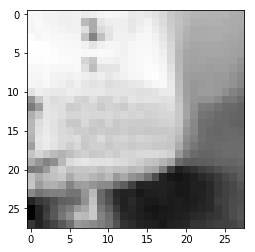

In [7]:
# test the neural network with our own images
item = 5283
matplotlib.pyplot.imshow(test_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')
correct_label = test_dataset[item][0]
print(correct_label)
inputs = test_dataset[item][1:]
outputs = n.query(inputs)
print (outputs)
label = numpy.argmax(outputs)
print("network says ", label)
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

In [8]:
# test the neural network
scorecard = []
for record in test_dataset:
    # print(record)
    correct_label = int(record[0])
    inputs = test_dataset[item][1:]
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.5384615384615384
